# Abschlussprojekt - Data Analytics

Analyse der vorliegenden Daten der P-2-P-Plattform kiva.org 

## Import der benötigten Bibliotheken

In [1]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

## Einlesen der Daten

In [2]:
df_gesamt = pd.read_csv('data_abschlussprojekt.csv',
                        sep='#', index_col=0, skipinitialspace=True)

df_gesamt

funded_amount  loan_amount             activity          sector  \
0               300.0        300.0  Fruits & Vegetables            Food   
1               575.0        575.0             Rickshaw  Transportation   
2               150.0        150.0       Transportation  Transportation   
3               200.0        200.0           Embroidery            Arts   
4               400.0        400.0           Milk Sales            Food   
...               ...          ...                  ...             ...   
671200            0.0         25.0            Livestock     Agriculture   
671201           25.0         25.0            Livestock     Agriculture   
671202            0.0         25.0                Games   Entertainment   
671203            0.0         25.0            Livestock     Agriculture   
671204            0.0         25.0            Livestock     Agriculture   

                                                      use country_code  \
0                 To buy seasonal, fresh fruits to sell.            PK   
1       to repair and maintain the auto rickshaw used ...           PK   
2       To repair their old cycle-van and buy another ...           IN   
3       to purchase an embroidery machine and a variet...           PK   
4                                to purchase one buffalo.           PK   
...                                                   ...          ...   
671200  [True, u'para compara: cemento, arenya y ladri...           PY   
671201  [True, u'to start a turducken farm.'] - this l...           KE   
671202                                                NaN           KE   
671203  [True, u'to start a turducken farm.'] - this l...           KE   
671204  [True, u'to start a turducken farm.'] - this l...           KE   

         country        region currency  term_in_months  lender_count  \
0       Pakistan        Lahore      PKR            12.0            12   
1       Pakistan        Lahore      PKR            11.0            14   
2          India     Maynaguri      INR            43.0             6   
3       Pakistan        Lahore      PKR            11.0             8   
4       Pakistan  Abdul Hakeem      PKR            14.0            16   
...          ...           ...      ...             ...           ...   
671200  Paraguay    Concepción      USD            13.0             0   
671201     Kenya           NaN      KES            13.0             1   
671202     Kenya           NaN      KES            13.0             0   
671203     Kenya           NaN      KES            13.0             0   
671204     Kenya           NaN      KES            13.0             0   

       borrower_genders repayment_interval  
0                female          irregular  
1        female, female          irregular  
2                female             bullet  
3                female          irregular  
4                female            monthly  
...                 ...                ...  
671200           female            monthly  
671201           female            monthly  
671202              NaN            monthly  
671203           female            monthly  
671204           female            monthly  

[671205 rows x 13 columns]

# Kennenlernen des Datensatzes

## Überblick mit .info

In [3]:
df_gesamt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 671204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       671205 non-null  float64
 1   loan_amount         671205 non-null  float64
 2   activity            671205 non-null  object 
 3   sector              671205 non-null  object 
 4   use                 666972 non-null  object 
 5   country_code        671197 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  borrower_genders    666984 non-null  object 
 12  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 71.7+ MB


Der Non-Null Count sollte, wenn es keine fehlenden Werte gibt, immer bei 671205 liegen. Allerdings sind die Werte bei den Spalten use,  country_code, region und borrower_genders geringer. Daher kann man davon ausgehen, dass hier fehlende Werte vorliegen.

### Erster Überblick fehlende Werte

In [4]:
df_gesamt.isnull().sum().sort_values(ascending=False)

region                56800
use                    4233
borrower_genders       4221
country_code              8
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country                   0
currency                  0
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

## Deskriptive Statistik der Spalten mit numerischen Werten

In [5]:
df_gesamt.describe()

funded_amount    loan_amount  term_in_months   lender_count
count  671205.000000  671205.000000   671205.000000  671205.000000
mean      785.995061     842.397107       13.739022      20.590922
std      1130.398941    1198.660073        8.598919      28.459551
min         0.000000      25.000000        1.000000       0.000000
25%       250.000000     275.000000        8.000000       7.000000
50%       450.000000     500.000000       13.000000      13.000000
75%       900.000000    1000.000000       14.000000      24.000000
max    100000.000000  100000.000000      158.000000    2986.000000

## Deskriptive Statistik der Spalten mit kategorischen Werten

In [6]:
df_gesamt.describe(include=['O'])

activity       sector  \
count    671205       671205   
unique      163           15   
top     Farming  Agriculture   
freq      72955       180302   

                                                      use country_code  \
count                                              666972       671197   
unique                                             423452           86   
top     to buy a water filter to provide safe drinking...           PH   
freq                                                 5217       160441   

            country  region currency borrower_genders repayment_interval  
count        671205  614405   671205           666984             671205  
unique           87   12695       67            11298                  4  
top     Philippines  Kaduna      PHP           female            monthly  
freq         160441   10000   160440           426502             342717

## Typen der Spaltenwerte

In [7]:
df_gesamt.dtypes

funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
term_in_months        float64
lender_count            int64
borrower_genders       object
repayment_interval     object
dtype: object

## Erster Blick in den Datensatz mit .head

In [8]:
df_gesamt.head()

funded_amount  loan_amount             activity          sector  \
0          300.0        300.0  Fruits & Vegetables            Food   
1          575.0        575.0             Rickshaw  Transportation   
2          150.0        150.0       Transportation  Transportation   
3          200.0        200.0           Embroidery            Arts   
4          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  term_in_months  lender_count borrower_genders  \
0        Lahore      PKR            12.0            12           female   
1        Lahore      PKR            11.0            14   female, female   
2     Maynaguri      INR            43.0             6           female   
3        Lahore      PKR            11.0             8           female   
4  Abdul Hakeem      PKR            14.0            16           female   

  repayment_interval  
0          irregular  
1          irregular  
2             bullet  
3          irregular  
4            monthly

## Die Spaltennamen

In [9]:
df_gesamt.columns

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'term_in_months',
       'lender_count', 'borrower_genders', 'repayment_interval'],
      dtype='object')

## Shape des Dataframes

In [10]:
df_gesamt.shape

(671205, 13)

## Unique Values der verschiedenen Spalten

### Unique funded amount

In [11]:
u_c_funded_amount = df_gesamt['funded_amount'].nunique()

u_c_funded_amount

610

### Unique loan amount

In [12]:
u_c_loan_amount = df_gesamt['loan_amount'].nunique()

u_c_loan_amount

479

### Unique activity

In [13]:
u_activity = df_gesamt['activity'].unique()

u_activity

array(['Fruits & Vegetables', 'Rickshaw', 'Transportation', 'Embroidery',
       'Milk Sales', 'Services', 'Dairy', 'Beauty Salon', 'Manufacturing',
       'Food Production/Sales', 'Wholesale', 'General Store',
       'Clothing Sales', 'Poultry', 'Tailoring', 'Sewing', 'Bakery',
       'Restaurant', 'Food Stall', 'Farming', 'Construction Supplies',
       'Personal Products Sales', 'Home Products Sales',
       'Natural Medicines', 'Fish Selling', 'Education provider',
       'Shoe Sales', 'Machinery Rental', 'Butcher Shop', 'Pigs',
       'Personal Expenses', 'Food Market', 'Cosmetics Sales',
       'Personal Housing Expenses', 'Retail', 'Energy', 'Grocery Store',
       'Construction', 'Agriculture', 'Motorcycle Transport',
       'Charcoal Sales', 'Food', 'Pharmacy', 'Fishing', 'Timber Sales',
       'Cattle', 'Electronics Repair', 'Electronics Sales', 'Vehicle',
       'Cafe', 'Blacksmith', 'Higher education costs', 'Used Clothing',
       'Fuel/Firewood', 'Upholstery', 'Catering',

In [14]:
u_c_activity = df_gesamt['activity'].nunique()

u_c_activity

163

### Unique sector

In [15]:
u_sector = df_gesamt['sector'].unique()

u_sector

array(['Food', 'Transportation', 'Arts', 'Services', 'Agriculture',
       'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction',
       'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'],
      dtype=object)

In [16]:
u_c_sector = df_gesamt['sector'].nunique()

u_c_sector

15

### Unique use

In [17]:
u_use = df_gesamt['use'].unique()

u_use

array(['To buy seasonal, fresh fruits to sell. ',
       'to repair and maintain the auto rickshaw used in their business.',
       'To repair their old cycle-van and buy another one to rent out as a source of income',
       ...,
       'Pretend the issue with loan got addressed by Kiva Coordinator.',
       'Kiva Coordinator replaced loan use. Should see this in viewdiff.',
       'Edited loan use in english.'], dtype=object)

In [18]:
u_c_use = df_gesamt['use'].nunique()

u_c_use

423452

### Unique country code

In [19]:
u_country_code = df_gesamt['country_code'].unique()

u_country_code

array(['PK', 'IN', 'KE', 'NI', 'SV', 'TZ', 'PH', 'PE', 'SN', 'KH', 'LR',
       'VN', 'IQ', 'HN', 'PS', 'MN', 'US', 'ML', 'CO', 'TJ', 'GT', 'EC',
       'BO', 'YE', 'GH', 'SL', 'HT', 'CL', 'JO', 'UG', 'BI', 'BF', 'TL',
       'ID', 'GE', 'UA', 'XK', 'AL', 'CD', 'CR', 'SO', 'ZW', 'CM', 'TR',
       'AZ', 'DO', 'BR', 'MX', 'KG', 'AM', 'PY', 'LB', 'WS', 'IL', 'RW',
       'ZM', 'NP', 'CG', 'MZ', 'ZA', 'TG', 'BJ', 'BZ', 'SR', 'TH', 'NG',
       'MR', 'VU', 'PA', 'VI', 'VC', 'LA', 'MW', 'MM', 'MD', 'SS', 'SB',
       'CN', 'EG', 'GU', 'AF', 'MG', nan, 'PR', 'LS', 'CI', 'BT'],
      dtype=object)

In [20]:
u_c_country_code = df_gesamt['country_code'].nunique()

u_c_country_code

86

### Unique country

In [21]:
u_country = df_gesamt['country'].unique()

u_country

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

In [22]:
u_c_country = df_gesamt['country'].nunique()

u_c_country

87

### Unique region

In [23]:
u_region = df_gesamt['region'].unique()

u_region

array(['Lahore', 'Maynaguri', 'Abdul Hakeem', ..., 'Gbenikoro Village',
       'Morimaraia', 'alejandria'], dtype=object)

In [24]:
u_c_region = df_gesamt['region'].nunique()

u_c_region

12695

### Unique currency

In [25]:
u_currency = df_gesamt['currency'].unique()

u_currency

array(['PKR', 'INR', 'KES', 'NIO', 'USD', 'TZS', 'PHP', 'PEN', 'XOF',
       'LRD', 'VND', 'HNL', 'MNT', 'COP', 'GTQ', 'TJS', 'BOB', 'YER',
       'KHR', 'GHS', 'SLL', 'HTG', 'CLP', 'JOD', 'UGX', 'BIF', 'IDR',
       'GEL', 'UAH', 'EUR', 'ALL', 'CRC', 'XAF', 'TRY', 'AZN', 'DOP',
       'BRL', 'MXN', 'KGS', 'AMD', 'PYG', 'LBP', 'WST', 'ILS', 'RWF',
       'ZMW', 'NPR', 'MZN', 'ZAR', 'BZD', 'SRD', 'NGN', 'VUV', 'XCD',
       'MWK', 'LAK', 'MMK', 'ZWD', 'MDL', 'SSP', 'SBD', 'CNY', 'EGP',
       'MGA', 'NAD', 'LSL', 'THB'], dtype=object)

In [26]:
u_c_currency = df_gesamt['currency'].nunique()

u_c_currency

67

### Unique term in months

In [27]:
u_term_in_months = df_gesamt['term_in_months'].unique()

u_term_in_months

array([ 12.,  11.,  43.,  14.,   4.,  13.,  10.,   8.,   5.,  20.,   7.,
         3.,  17.,  15.,   9.,  39.,  23.,  26.,   6.,  30.,  22.,  25.,
        27.,  16.,  52.,  18.,  36.,  19.,  28.,  62.,  32.,  24.,  21.,
        50.,  38.,   2.,  35.,  72., 137.,   1.,  49.,  33.,  42.,  29.,
        37.,  51., 113.,  79.,  31.,  44.,  74.,  34.,  48., 114.,  40.,
       124., 104.,  63.,  85.,  78.,  70.,  86.,  61.,  60.,  67.,  55.,
        53.,  41.,  68., 143.,  77., 130.,  45., 111., 134., 107., 142.,
       148.,  56., 122., 133., 141., 110.,  81., 106.,  54., 147., 112.,
        59., 145., 121., 109.,  80.,  47.,  97.,  75., 101., 128.,  98.,
        87.,  71.,  66.,  46., 125.,  76.,  73., 120., 144., 118., 131.,
        65., 108.,  58., 123.,  84.,  99.,  82.,  92.,  69.,  91.,  57.,
        90.,  93., 129.,  89.,  88.,  64., 126., 138., 158.,  83., 100.,
       105., 132.,  96., 127., 135.,  95., 154., 156.,  94., 115., 102.,
       116., 136., 103., 139., 146.])

In [28]:
u_c_term_in_months = df_gesamt['term_in_months'].nunique()

u_c_term_in_months

148

### Unique lender count

In [29]:
u_c_lender_count = df_gesamt['lender_count'].nunique()

u_c_lender_count

503

### Unique borrower genders

In [30]:
u_borrower_genders = df_gesamt['borrower_genders'].unique()

u_borrower_genders

array(['female', 'female, female', 'female, female, female', ...,
       'female, female, male, female, female, female, female, female, female, female, male, male, female, female, male, female, female, female, female, female, female, female',
       'male, female, female, female, female, female, female, female, male, male, female, male, female, male, male, male',
       'female, female, female, male, female, female, female, male, female, female, female, male, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, male'],
      dtype=object)

In [31]:
u_c_borrower_genders = df_gesamt['borrower_genders'].nunique()

u_c_borrower_genders

11298

### Unique repayment interval

In [32]:
u_repayment_interval = df_gesamt['repayment_interval'].unique()

u_repayment_interval

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

In [33]:
u_c_repayment_interval = df_gesamt['repayment_interval'].nunique()

u_c_repayment_interval

4

# Data Understanding und Business Understanding

CRISP DM: Business Understanding

Euer Geschäftsmodell ist das Betreiben einer Plattform (crowd-investing) bei der sich Personen die eine Geschäftsidee haben, aber nicht das benötigte Geld, anmelden und für ihr Projekt innerhalb einer vorgegebenen Zeit Geld sammeln können.

Auf der anderen Seite habt ihr Geldgeber, die gern ihr Geld in Projekte anlegen möchten und nach Investitionen suchen.

Als Vermittler bringt eure Plattform also Geldnehmer und Geldgeber zusammen.

Deine Datenbasis ist die Historie eurer Plattform.

Getroffene Annahmen zu dem Geschäftsmodell

Alle Projekte sind abgeschlossene Projekte, d.h. die Zeit, um für sein Projekt Geld zu sammeln ist abgelaufen. Euer Geschäftsmodell sieht es vor, dass die gesammelten Gelder ausgezahlt werden, auch wenn der Zielbetrag nicht erreicht wurde.

Ihr verdient euer Geld mit einer Provision für jedes Projekt was auf eurer Plattform landet.

Der Geldgeber erhält einen Zins für die Geldleihe.

CRISP DM: Data Understanding

- funded_amount ... mit Ablauf der "Crowding"zeit erhaltener Betrag/ ausgezahlter Betrag in USD
- loan_amount ... Zielbetrag (Betrag dem man für das Projekt erreichen wollte) in USD
- activity ... Unterkategory zu dem das Ziel des Crowdprojektes thematisch gehört
- sector ... Oberkategory in den das Crowdprojektes Thema fällt
- use ... Kurzbeschreibung wofür das Geld verwendet werden soll
- country_code ... Ländercode nach ISO Norm
- country ... Ländername nach ISO Norm
- region ... Region
- currency ... Währung in den der funded_amount dann ausgezahlt wurde
- term in months ... Dauer über die der Kredit ausgezahlt werden soll
- lender_count ...Darlehensgeber (also wieviele Personen Geld für das Projekt gegeben haben)
- borrower_genders ... Geschlecht und Anzahl der Darlehensnehmer, also diejenigen die das Crowdprojekt initiiert haben       
- repayment interval ... vertraglich vereinbarte Rückzahlungsmodalitäten/-rhythmus


# Überprüfung auf Duplikate

## Definition

Definition: Unter Duplikaten werden meist vollständige Zeilenduplikate verstanden. Das bedeutet, dass diese Zeilen in allen Spalten identische Werte enthalten. Alle Werte einer Zeile stimmen also mit allen Werten einer anderen Zeile überein.

## Identifikation von Duplikaten

In [34]:
df_gesamt[df_gesamt.duplicated()]

funded_amount  loan_amount                activity         sector  \
498             100.0        100.0             Home Energy   Personal Use   
606             100.0        100.0             Home Energy   Personal Use   
808             450.0        450.0  Higher education costs      Education   
1703            500.0        500.0  Higher education costs      Education   
2317            250.0        250.0                 Poultry    Agriculture   
...               ...          ...                     ...            ...   
671200            0.0         25.0               Livestock    Agriculture   
671201           25.0         25.0               Livestock    Agriculture   
671202            0.0         25.0                   Games  Entertainment   
671203            0.0         25.0               Livestock    Agriculture   
671204            0.0         25.0               Livestock    Agriculture   

                                                      use country_code  \
498                          to buy a solar-powered lamp.           SV   
606                          to buy a solar-powered lamp.           SV   
808          to pay for one semester's registration fees.           CO   
1703            To buy a laptop for educational purposes.           SO   
2317                                 to purchase poultry.           KE   
...                                                   ...          ...   
671200  [True, u'para compara: cemento, arenya y ladri...           PY   
671201  [True, u'to start a turducken farm.'] - this l...           KE   
671202                                                NaN           KE   
671203  [True, u'to start a turducken farm.'] - this l...           KE   
671204  [True, u'to start a turducken farm.'] - this l...           KE   

            country      region currency  term_in_months  lender_count  \
498     El Salvador         NaN      USD            14.0             4   
606     El Salvador         NaN      USD            14.0             4   
808        Colombia      Bogotà      COP             7.0            15   
1703        Somalia    Hargeisa      USD             8.0            19   
2317          Kenya    Ndaragwa      KES            16.0            10   
...             ...         ...      ...             ...           ...   
671200     Paraguay  Concepción      USD            13.0             0   
671201        Kenya         NaN      KES            13.0             1   
671202        Kenya         NaN      KES            13.0             0   
671203        Kenya         NaN      KES            13.0             0   
671204        Kenya         NaN      KES            13.0             0   

       borrower_genders repayment_interval  
498                male            monthly  
606                male            monthly  
808              female            monthly  
1703               male            monthly  
2317             female            monthly  
...                 ...                ...  
671200           female            monthly  
671201           female            monthly  
671202              NaN            monthly  
671203           female            monthly  
671204           female            monthly  

[24588 rows x 13 columns]

In [35]:
df_dup = df_gesamt.loc[df_gesamt.duplicated(keep=False), :]
df_dup

funded_amount  loan_amount     activity         sector  \
327             275.0        275.0      Farming    Agriculture   
392             100.0        100.0  Home Energy   Personal Use   
405             100.0        100.0  Home Energy   Personal Use   
498             100.0        100.0  Home Energy   Personal Use   
606             100.0        100.0  Home Energy   Personal Use   
...               ...          ...          ...            ...   
671200            0.0         25.0    Livestock    Agriculture   
671201           25.0         25.0    Livestock    Agriculture   
671202            0.0         25.0        Games  Entertainment   
671203            0.0         25.0    Livestock    Agriculture   
671204            0.0         25.0    Livestock    Agriculture   

                                                      use country_code  \
327           to buy fertilizers and other farm supplies.           PH   
392                                  to buy a solar lamp.           SV   
405                          to buy a solar-powered lamp.           SV   
498                          to buy a solar-powered lamp.           SV   
606                          to buy a solar-powered lamp.           SV   
...                                                   ...          ...   
671200  [True, u'para compara: cemento, arenya y ladri...           PY   
671201  [True, u'to start a turducken farm.'] - this l...           KE   
671202                                                NaN           KE   
671203  [True, u'to start a turducken farm.'] - this l...           KE   
671204  [True, u'to start a turducken farm.'] - this l...           KE   

            country                  region currency  term_in_months  \
327     Philippines  Brookes Point, Palawan      PHP             8.0   
392     El Salvador                     NaN      USD            14.0   
405     El Salvador                     NaN      USD            14.0   
498     El Salvador                     NaN      USD            14.0   
606     El Salvador                     NaN      USD            14.0   
...             ...                     ...      ...             ...   
671200     Paraguay              Concepción      USD            13.0   
671201        Kenya                     NaN      KES            13.0   
671202        Kenya                     NaN      KES            13.0   
671203        Kenya                     NaN      KES            13.0   
671204        Kenya                     NaN      KES            13.0   

        lender_count borrower_genders repayment_interval  
327                8           female          irregular  
392                4             male            monthly  
405                4             male            monthly  
498                4             male            monthly  
606                4             male            monthly  
...              ...              ...                ...  
671200             0           female            monthly  
671201             1           female            monthly  
671202             0              NaN            monthly  
671203             0           female            monthly  
671204             0           female            monthly  

[34930 rows x 13 columns]

## Umgang mit Duplikaten
Duplikate werden nicht entfernt, da es sein kann, dass diesselben Projekte mehrfach gestartet wurden und daher mehrfach im Datensatz auftauchen. Ggf. können die Duplikate im weiteren Verlauf auch noch genauer untersucht werden.

# Überprüfung auf fehlende Werte

## Identifikation fehlender Werte

### Identifikation systemseitig

In [36]:
df_gesamt.isnull().sum().sort_values(ascending=False)

region                56800
use                    4233
borrower_genders       4221
country_code              8
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country                   0
currency                  0
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [37]:
# Zeilen filtern, bei denen country_code NaN ist, und nur die Spalten "country" und "country_code" anzeigen
filtered_df = df_gesamt[df_gesamt['country_code'].isna()][[
    'country', 'country_code']]

print(filtered_df)

        country country_code
202537  Namibia          NaN
202823  Namibia          NaN
344929  Namibia          NaN
351177  Namibia          NaN
420953  Namibia          NaN
421218  Namibia          NaN
487207  Namibia          NaN
487653  Namibia          NaN


In [38]:
df_gesamt['country_code'].fillna('NA', inplace=True)

In [39]:
df_gesamt.isnull().sum().sort_values(ascending=False)

region                56800
use                    4233
borrower_genders       4221
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country_code              0
country                   0
currency                  0
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

In [40]:
# Eindeutige Länder (Spalte "country") anzeigen, bei denen region NaN ist
unique_countries_with_nan_region = df_gesamt[df_gesamt['region'].isna(
)]['country'].unique()

print(unique_countries_with_nan_region)

['Kenya' 'El Salvador' 'Senegal' 'Iraq' 'United States' 'Peru' 'Tanzania'
 'Guatemala' 'Colombia' 'Indonesia' 'Kosovo' 'Timor-Leste' 'Turkey'
 'Philippines' 'Palestine' 'Burundi' 'Tajikistan' 'Honduras' 'Jordan'
 'Mexico' 'Lebanon' 'Albania' 'Nicaragua' 'Bolivia' 'Israel' 'Rwanda'
 'Azerbaijan' 'Ecuador' 'Mongolia' 'Haiti' 'Cambodia' 'Sierra Leone'
 'Yemen' 'Zimbabwe' 'Paraguay' 'Uganda' 'Armenia' 'Dominican Republic'
 'Benin' 'Belize' 'Ghana' 'Mozambique' 'Zambia' 'Samoa' 'Brazil' 'Panama'
 'Pakistan' 'Burkina Faso' 'Suriname' 'Virgin Islands' 'Togo'
 'South Africa' 'Malawi' 'Nigeria' 'Liberia' 'Vietnam' 'Costa Rica' 'Guam'
 'Myanmar (Burma)' 'Mali' 'Madagascar'
 'The Democratic Republic of the Congo' 'Cameroon' 'Georgia' 'Puerto Rico'
 'South Sudan' 'Moldova' 'Chile' 'Kyrgyzstan' 'India' 'China' 'Bhutan']


Der Eintrag zur Region fehlt bei vielen verschiedenen Ländern. Die fehlenden Werte machen 8,5% des gesamten Datensatzes aus. Da die genauen Orte an denen die Projekte stattfinden im Datensatz nicht enthalten sind, können die fehlenden Werte auch nicht anhand dieser aufgefüllt werden. Da sich der Datensatz über Länder weltweit erstreckt, habe ich entschieden, dass die Betrachtung auf Länderebene ausreicht. Die Regionen werden aus diesem Grund und weil ein hoher Prozentsatz der Werte fehlt sowie die Regionen bei vielen verschiedenen Ländern fehlen, gelöscht.

In [41]:
# Spalte "region" aus dem DataFrame löschen
df_gesamt = df_gesamt.drop(columns=['region'])

df_gesamt

funded_amount  loan_amount             activity          sector  \
0               300.0        300.0  Fruits & Vegetables            Food   
1               575.0        575.0             Rickshaw  Transportation   
2               150.0        150.0       Transportation  Transportation   
3               200.0        200.0           Embroidery            Arts   
4               400.0        400.0           Milk Sales            Food   
...               ...          ...                  ...             ...   
671200            0.0         25.0            Livestock     Agriculture   
671201           25.0         25.0            Livestock     Agriculture   
671202            0.0         25.0                Games   Entertainment   
671203            0.0         25.0            Livestock     Agriculture   
671204            0.0         25.0            Livestock     Agriculture   

                                                      use country_code  \
0                 To buy seasonal, fresh fruits to sell.            PK   
1       to repair and maintain the auto rickshaw used ...           PK   
2       To repair their old cycle-van and buy another ...           IN   
3       to purchase an embroidery machine and a variet...           PK   
4                                to purchase one buffalo.           PK   
...                                                   ...          ...   
671200  [True, u'para compara: cemento, arenya y ladri...           PY   
671201  [True, u'to start a turducken farm.'] - this l...           KE   
671202                                                NaN           KE   
671203  [True, u'to start a turducken farm.'] - this l...           KE   
671204  [True, u'to start a turducken farm.'] - this l...           KE   

         country currency  term_in_months  lender_count borrower_genders  \
0       Pakistan      PKR            12.0            12           female   
1       Pakistan      PKR            11.0            14   female, female   
2          India      INR            43.0             6           female   
3       Pakistan      PKR            11.0             8           female   
4       Pakistan      PKR            14.0            16           female   
...          ...      ...             ...           ...              ...   
671200  Paraguay      USD            13.0             0           female   
671201     Kenya      KES            13.0             1           female   
671202     Kenya      KES            13.0             0              NaN   
671203     Kenya      KES            13.0             0           female   
671204     Kenya      KES            13.0             0           female   

       repayment_interval  
0               irregular  
1               irregular  
2                  bullet  
3               irregular  
4                 monthly  
...                   ...  
671200            monthly  
671201            monthly  
671202            monthly  
671203            monthly  
671204            monthly  

[671205 rows x 12 columns]

In [42]:
nan_use_rows = df_gesamt[df_gesamt['use'].isna()]
nan_use_rows

funded_amount  loan_amount               activity         sector  use  \
140            2975.0       2975.0  Food Production/Sales           Food  NaN   
145            1200.0       1200.0      Personal Expenses   Personal Use  NaN   
170            4250.0       4250.0               Catering           Food  NaN   
412            2350.0       2350.0           Beauty Salon       Services  NaN   
414             725.0        725.0            Agriculture    Agriculture  NaN   
...               ...          ...                    ...            ...  ...   
671151            0.0         25.0              Livestock    Agriculture  NaN   
671174            0.0         25.0                  Games  Entertainment  NaN   
671178            0.0         25.0              Livestock    Agriculture  NaN   
671185            0.0         25.0              Livestock    Agriculture  NaN   
671202            0.0         25.0                  Games  Entertainment  NaN   

       country_code      country currency  term_in_months  lender_count  \
140              TZ     Tanzania      TZS            10.0           110   
145              PE         Peru      PEN            20.0            44   
170              TZ     Tanzania      TZS            10.0           116   
412              TZ     Tanzania      TZS            10.0            75   
414              SV  El Salvador      USD            20.0            19   
...             ...          ...      ...             ...           ...   
671151           KE        Kenya      KES            13.0             0   
671174           KE        Kenya      KES            13.0             0   
671178           KE        Kenya      KES            13.0             0   
671185           KE        Kenya      KES            13.0             0   
671202           KE        Kenya      KES            13.0             0   

       borrower_genders repayment_interval  
140                 NaN            monthly  
145                 NaN            monthly  
170                 NaN            monthly  
412                 NaN            monthly  
414                 NaN            monthly  
...                 ...                ...  
671151              NaN            monthly  
671174              NaN            monthly  
671178              NaN            monthly  
671185              NaN            monthly  
671202              NaN            monthly  

[4233 rows x 12 columns]

In [43]:
nan_borrower_genders_rows = df_gesamt[df_gesamt['borrower_genders'].isna()]
nan_borrower_genders_rows

funded_amount  loan_amount               activity         sector  use  \
140            2975.0       2975.0  Food Production/Sales           Food  NaN   
145            1200.0       1200.0      Personal Expenses   Personal Use  NaN   
170            4250.0       4250.0               Catering           Food  NaN   
412            2350.0       2350.0           Beauty Salon       Services  NaN   
414             725.0        725.0            Agriculture    Agriculture  NaN   
...               ...          ...                    ...            ...  ...   
671151            0.0         25.0              Livestock    Agriculture  NaN   
671174            0.0         25.0                  Games  Entertainment  NaN   
671178            0.0         25.0              Livestock    Agriculture  NaN   
671185            0.0         25.0              Livestock    Agriculture  NaN   
671202            0.0         25.0                  Games  Entertainment  NaN   

       country_code      country currency  term_in_months  lender_count  \
140              TZ     Tanzania      TZS            10.0           110   
145              PE         Peru      PEN            20.0            44   
170              TZ     Tanzania      TZS            10.0           116   
412              TZ     Tanzania      TZS            10.0            75   
414              SV  El Salvador      USD            20.0            19   
...             ...          ...      ...             ...           ...   
671151           KE        Kenya      KES            13.0             0   
671174           KE        Kenya      KES            13.0             0   
671178           KE        Kenya      KES            13.0             0   
671185           KE        Kenya      KES            13.0             0   
671202           KE        Kenya      KES            13.0             0   

       borrower_genders repayment_interval  
140                 NaN            monthly  
145                 NaN            monthly  
170                 NaN            monthly  
412                 NaN            monthly  
414                 NaN            monthly  
...                 ...                ...  
671151              NaN            monthly  
671174              NaN            monthly  
671178              NaN            monthly  
671185              NaN            monthly  
671202              NaN            monthly  

[4221 rows x 12 columns]

In [44]:
nan_use_and_borrower_genders_rows = df_gesamt[df_gesamt['use'].isna(
) & df_gesamt['borrower_genders'].isna()]
nan_use_and_borrower_genders_rows

funded_amount  loan_amount               activity         sector  use  \
140            2975.0       2975.0  Food Production/Sales           Food  NaN   
145            1200.0       1200.0      Personal Expenses   Personal Use  NaN   
170            4250.0       4250.0               Catering           Food  NaN   
412            2350.0       2350.0           Beauty Salon       Services  NaN   
414             725.0        725.0            Agriculture    Agriculture  NaN   
...               ...          ...                    ...            ...  ...   
671151            0.0         25.0              Livestock    Agriculture  NaN   
671174            0.0         25.0                  Games  Entertainment  NaN   
671178            0.0         25.0              Livestock    Agriculture  NaN   
671185            0.0         25.0              Livestock    Agriculture  NaN   
671202            0.0         25.0                  Games  Entertainment  NaN   

       country_code      country currency  term_in_months  lender_count  \
140              TZ     Tanzania      TZS            10.0           110   
145              PE         Peru      PEN            20.0            44   
170              TZ     Tanzania      TZS            10.0           116   
412              TZ     Tanzania      TZS            10.0            75   
414              SV  El Salvador      USD            20.0            19   
...             ...          ...      ...             ...           ...   
671151           KE        Kenya      KES            13.0             0   
671174           KE        Kenya      KES            13.0             0   
671178           KE        Kenya      KES            13.0             0   
671185           KE        Kenya      KES            13.0             0   
671202           KE        Kenya      KES            13.0             0   

       borrower_genders repayment_interval  
140                 NaN            monthly  
145                 NaN            monthly  
170                 NaN            monthly  
412                 NaN            monthly  
414                 NaN            monthly  
...                 ...                ...  
671151              NaN            monthly  
671174              NaN            monthly  
671178              NaN            monthly  
671185              NaN            monthly  
671202              NaN            monthly  

[4221 rows x 12 columns]

Erkenntnis: Immer wenn 'borrower_genders' NaN ist, ist auch 'use' NaN. Es gibt also nur 12 Zeilen, in denen nur 'use' NaN ist, nicht aber 'borrower_genders'.

Da nur 0,63% der Zeilen bei 'borrower_genders' und 'use' keinen Wert haben und dies bis auf 12 Zeilen diesselben Zeilen betrifft, werde ich diese Zeilen löschen. Im weiteren Verlauf möchte ich das Geschlecht der Leiher und eventuell auch den 'use' untersuchen. Daher würden fehlende Werte stören.

In [45]:
df_gesamt.dropna(subset=['borrower_genders', 'use'], inplace=True)
df_gesamt.reset_index(drop=True, inplace=True)

df_gesamt

funded_amount  loan_amount             activity          sector  \
0               300.0        300.0  Fruits & Vegetables            Food   
1               575.0        575.0             Rickshaw  Transportation   
2               150.0        150.0       Transportation  Transportation   
3               200.0        200.0           Embroidery            Arts   
4               400.0        400.0           Milk Sales            Food   
...               ...          ...                  ...             ...   
666967            0.0         25.0            Livestock     Agriculture   
666968            0.0         25.0            Livestock     Agriculture   
666969           25.0         25.0            Livestock     Agriculture   
666970            0.0         25.0            Livestock     Agriculture   
666971            0.0         25.0            Livestock     Agriculture   

                                                      use country_code  \
0                 To buy seasonal, fresh fruits to sell.            PK   
1       to repair and maintain the auto rickshaw used ...           PK   
2       To repair their old cycle-van and buy another ...           IN   
3       to purchase an embroidery machine and a variet...           PK   
4                                to purchase one buffalo.           PK   
...                                                   ...          ...   
666967  [True, u'para compara: cemento, arenya y ladri...           PY   
666968  [True, u'para compara: cemento, arenya y ladri...           PY   
666969  [True, u'to start a turducken farm.'] - this l...           KE   
666970  [True, u'to start a turducken farm.'] - this l...           KE   
666971  [True, u'to start a turducken farm.'] - this l...           KE   

         country currency  term_in_months  lender_count borrower_genders  \
0       Pakistan      PKR            12.0            12           female   
1       Pakistan      PKR            11.0            14   female, female   
2          India      INR            43.0             6           female   
3       Pakistan      PKR            11.0             8           female   
4       Pakistan      PKR            14.0            16           female   
...          ...      ...             ...           ...              ...   
666967  Paraguay      USD            13.0             0           female   
666968  Paraguay      USD            13.0             0           female   
666969     Kenya      KES            13.0             1           female   
666970     Kenya      KES            13.0             0           female   
666971     Kenya      KES            13.0             0           female   

       repayment_interval  
0               irregular  
1               irregular  
2                  bullet  
3               irregular  
4                 monthly  
...                   ...  
666967            monthly  
666968            monthly  
666969            monthly  
666970            monthly  
666971            monthly  

[666972 rows x 12 columns]

### Identifikation Synonyme

In [46]:
missing_value_synonyms = ['?', 'N/A', 'unknown', 'missing', 'None', 'NIL', '-', 'NA_', 'NAN', 'Not available',
                          'Not provided', 'TBD', '', '_', 'NULL']

# Iteriere über alle Spalten im DataFrame
for column in df_gesamt.columns:
    for synonym in missing_value_synonyms:
        count = (df_gesamt[column] == synonym).sum()
        if count > 0:
            print(f"In Spalte '{column}': Anzahl von '{synonym}': {count}")

Keins der im Code genannten Synonyme wurde im Datensatz gefunden.

In [47]:
# Filtere Zeilen, in denen 'country' gleich 'Bolivia' ist
zeilen_bolivia = df_gesamt.loc[df_gesamt['country'] == 'Bolivia']

# Gib die ausgewählten Zeilen aus
zeilen_bolivia

funded_amount  loan_amount               activity        sector  \
294             600.0        600.0                 Retail        Retail   
330             875.0        875.0  Construction Supplies  Construction   
415            2550.0       2550.0                 Crafts          Arts   
494            4900.0       4900.0         Clothing Sales      Clothing   
568            5150.0       5150.0          General Store        Retail   
...               ...          ...                    ...           ...   
666936           50.0        875.0              Livestock   Agriculture   
666949            0.0        725.0              Livestock   Agriculture   
666953            0.0        875.0              Livestock   Agriculture   
666959            0.0        725.0              Livestock   Agriculture   
666960            0.0        875.0              Livestock   Agriculture   

                                                   use country_code  country  \
294                                       to buy toys.           BO  Bolivia   
330     to buy construction materials to finish a job.           BO  Bolivia   
415                                      to buy fabric           BO  Bolivia   
494                                    to buy clothes.           BO  Bolivia   
568                            to buy supplies to sell           BO  Bolivia   
...                                                ...          ...      ...   
666936                 Translated loan use to english.           BO  Bolivia   
666949                 Translated loan use to english.           BO  Bolivia   
666953                 Translated loan use to english.           BO  Bolivia   
666959                 Translated loan use to english.           BO  Bolivia   
666960                 Translated loan use to english.           BO  Bolivia   

       currency  term_in_months  lender_count  \
294         BOB            14.0            24   
330         BOB            20.0            14   
415         BOB             7.0            84   
494         BOB             9.0           131   
568         BOB             9.0           138   
...         ...             ...           ...   
666936      BOB            13.0             2   
666949      BOB            13.0             0   
666953      BOB            13.0             0   
666959      BOB            13.0             0   
666960      BOB            13.0             0   

                                         borrower_genders repayment_interval  
294                                                female            monthly  
330                                                  male            monthly  
415     female, female, female, female, female, female...            monthly  
494     female, female, female, female, female, female...            monthly  
568     female, female, female, female, female, female...            monthly  
...                                                   ...                ...  
666936                                     female, female            monthly  
666949                                             female            monthly  
666953                                     female, female            monthly  
666959                                             female            monthly  
666960                                     female, female            monthly  

[8732 rows x 12 columns]

In [48]:
# Filtere Zeilen, in denen 'use' gleich 'Translated loan use to english.' ist
zeilen_tlu = df_gesamt.loc[df_gesamt['use']
                           == 'Translated loan use to english.']

# Anzahl der Zeilen anzeigen
anzahl_zeilen_tlu = zeilen_tlu.shape[0]
print(
    f"Anzahl der Zeilen, in denen 'use' gleich 'Translated loan use to english.' ist: {anzahl_zeilen_tlu}")

Anzahl der Zeilen, in denen 'use' gleich 'Translated loan use to english.' ist: 27


Hier fällt auf das die Spalte 'use' 27 mal den Wert 'Translated loan use to english.' enthält. Dies kann später nicht ausgewertet werden. Daher werden diese 27 zeilen gelöscht.

In [49]:
# Zeilen löschen, in denen 'use' gleich 'Translated loan use to english.' ist
df_gesamt = df_gesamt.drop(zeilen_tlu.index)

# Index zurücksetzen
df_gesamt = df_gesamt.reset_index(drop=True)

In [50]:
df_gesamt

funded_amount  loan_amount             activity          sector  \
0               300.0        300.0  Fruits & Vegetables            Food   
1               575.0        575.0             Rickshaw  Transportation   
2               150.0        150.0       Transportation  Transportation   
3               200.0        200.0           Embroidery            Arts   
4               400.0        400.0           Milk Sales            Food   
...               ...          ...                  ...             ...   
666940            0.0         25.0            Livestock     Agriculture   
666941            0.0         25.0            Livestock     Agriculture   
666942           25.0         25.0            Livestock     Agriculture   
666943            0.0         25.0            Livestock     Agriculture   
666944            0.0         25.0            Livestock     Agriculture   

                                                      use country_code  \
0                 To buy seasonal, fresh fruits to sell.            PK   
1       to repair and maintain the auto rickshaw used ...           PK   
2       To repair their old cycle-van and buy another ...           IN   
3       to purchase an embroidery machine and a variet...           PK   
4                                to purchase one buffalo.           PK   
...                                                   ...          ...   
666940  [True, u'para compara: cemento, arenya y ladri...           PY   
666941  [True, u'para compara: cemento, arenya y ladri...           PY   
666942  [True, u'to start a turducken farm.'] - this l...           KE   
666943  [True, u'to start a turducken farm.'] - this l...           KE   
666944  [True, u'to start a turducken farm.'] - this l...           KE   

         country currency  term_in_months  lender_count borrower_genders  \
0       Pakistan      PKR            12.0            12           female   
1       Pakistan      PKR            11.0            14   female, female   
2          India      INR            43.0             6           female   
3       Pakistan      PKR            11.0             8           female   
4       Pakistan      PKR            14.0            16           female   
...          ...      ...             ...           ...              ...   
666940  Paraguay      USD            13.0             0           female   
666941  Paraguay      USD            13.0             0           female   
666942     Kenya      KES            13.0             1           female   
666943     Kenya      KES            13.0             0           female   
666944     Kenya      KES            13.0             0           female   

       repayment_interval  
0               irregular  
1               irregular  
2                  bullet  
3               irregular  
4                 monthly  
...                   ...  
666940            monthly  
666941            monthly  
666942            monthly  
666943            monthly  
666944            monthly  

[666945 rows x 12 columns]

## Umgang mit fehlenden Werten

### Löschen, Beibehalten, Auffüllen? (-> sachlich begründen)

Es wurden in mehreren Spalten fehlende Werte gefunden:
- country-code: 8x fehlende Werte, jeweils beim Land Namibia, daher mit dem ISO-Kürzel für Namibia 'NA' aufgefüllt.
- region: 56800x fehlende Werte, Regionen vieler verschiedener Länder fehlten. Die Betrachtung soll nur auf Länderebene durchgeführt werden, daher wurde die Spalte 'region' gelöscht.
- use: 4233x fehlende Werte
- borrower_genders: 4221x fehlende Werte , in allen Zeilen, in denen borrower_genders fehlte, fehlte auch 'use'.
Da 'use' und 'borrower_genders' wahrscheinlich später betrachtet werden sollen und der Anteil der Zeilen nur 0,63% beträgt, wurden die Zeilen gelöscht.

Zudem wurde in der Spalte 'use' ein Synonym für fehlende Werte gefunden, dort stand 27x 'Translated loan use to english.', wahrscheinlich aus dem spanischen übersetzt. Dies kann bei der Betrachtung des Verwendungszweckes nicht ausgewertet werden und da es nur wenige Zeilen sind, werden diese gelöscht.

# Ausreißer vs Extremwerte

## Identifikation von Ausreißern bzw. Extremwerten

### Boxplot: fundet_amount

<Axes: xlabel='funded_amount'>

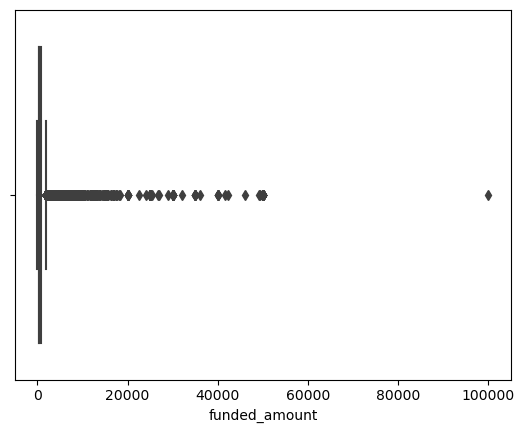

In [51]:
# boxplot erstellen, um Ausreißer in der Spalte 'fundet_amount' zu identifizieren

sns.boxplot(x='funded_amount', data=df_gesamt)

Sehr viele Datenpunkte befinden sich zwischen 0 und 20.000, es gibt noch einige bis ca. 50.000 und dann einen einzelnen Punkt bei 100.000. Diesen würde ich aber nicht als Ausreißer sondern asls Extremwert bezeichnen, da es plausibel ist, dass es ein so großes Projekt gab.

### Boxplot:loan_amount

<Axes: xlabel='loan_amount'>

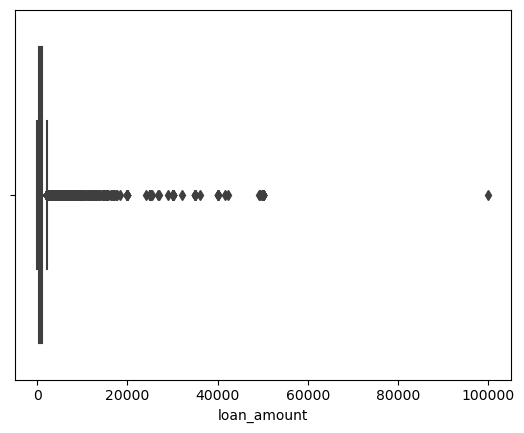

In [52]:
# boxplot erstellen, um Ausreißer in der Spalte 'loan_amount' zu identifizieren

sns.boxplot(x='loan_amount', data=df_gesamt)

Auch hier befinden sich sehr viele Datenpunkte zwischen 0 und 20.000, es gibt noch einige bis ca. 50.000 und dann einen einzelnen Punkt bei 100.000. Diesen würde ich aber nicht als Ausreißer sondern als Extremwert bezeichnen, da es plausibel ist, dass es ein so großes Projekt gab.

### Boxplot: lender_count

<Axes: xlabel='lender_count'>

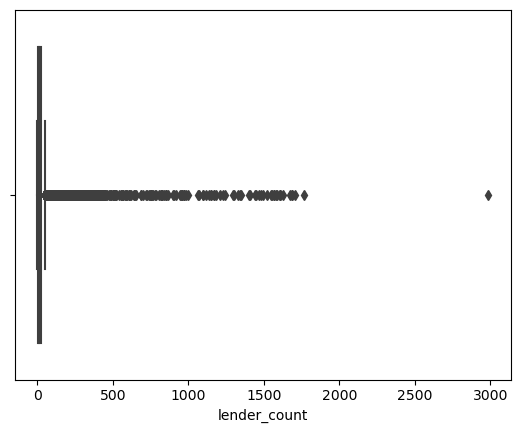

In [53]:
# boxplot erstellen, um Ausreißer in der Spalte 'lender_count' zu identifizieren

sns.boxplot(x='lender_count', data=df_gesamt)

Hier befinden sich sehr viele Datenpunkte zwischen 0 und ca. 1750, es gibt jedoch auch hier einen einzelnen Punkt bei 3000, weit abgeschlagen von den anderen. Jedoch haben wir bei den beiden Boxplots darüber gesehen, dass es ein großes Projekt mit einer Kreditsumme von 100.000 USD gab, dazu passt auch eine große Kreditgeberzahl von ca. 3000.

## Umgang drin/raus? -> Begründung Geschäftsmodell

Dieser eine Punkt, der sowohl beim geförderten Betrag als auch beim (gewünschten) Kreditbetrag einen Wert von 100.000 hat und bei der Kreditgeberzahl ca. bei 3000 liegt, ist sehr interessant und wird daher noch etwas näher betrachtet.

In [54]:
loan_amount_value = 100000

# Finde die Zeile, in der 'loan_amount' den Wert 100000 hat
desired_row = df_gesamt[df_gesamt['loan_amount'] == loan_amount_value]

# Zeige die gefundene Zeile an
desired_row

funded_amount  loan_amount     activity       sector  \
69540       100000.0     100000.0  Agriculture  Agriculture   

                                                     use country_code country  \
69540  create more than 300 jobs for women and farmer...           HT   Haiti   

      currency  term_in_months  lender_count borrower_genders  \
69540      USD            75.0          2986           female   

      repayment_interval  
69540          irregular

Es handelt sich also um ein Projekt, bei dem mehr als 300 Jobs in Haiti geschaffen werden sollten. 2986 Kreditgeber waren an dem Projekt beteiligt. Es scheint also durchaus plausibel, dass auch so ein großes Projekt über die Plattform abgewickelt wurde. --> Der Datenpunkt bleibt selbstverständlich als Extremwert enthalten und wird nicht entfernt.

## Nachtrag: fehlender Boxplot zu term_in_months

<Axes: xlabel='term_in_months'>

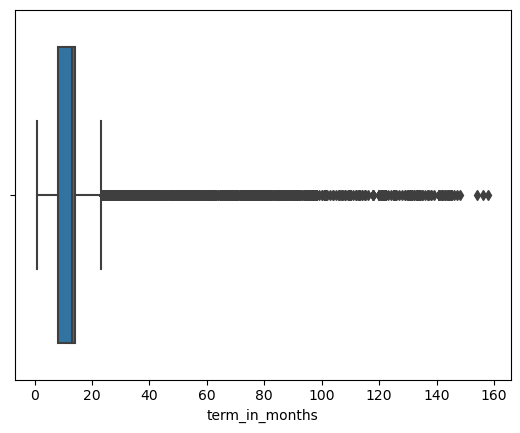

In [55]:
# boxplot erstellen, um Ausreißer in der Spalte 'term_in_months' zu identifizieren

sns.boxplot(x='term_in_months', data=df_gesamt)

Relativ gleichmäßige Verteilung, kein besonders auffälliger Wert.

# Kennzahlen definieren

## Einige Kennzahlen

1. Erfolgreiche Projekte, Kreditfinanzierung('funded_amount') vs. angeforderter Kreditbetrag ('loan_amount'):
   Summe der zu 100% erfolgreichen Projekte.
   Häufigkeit der Prozentsätze teilweise erfolgreicher Projekte.

2. Durchschnittliche Kreditfinanzierung ('funded_amount'):
   Durchschnittlicher Betrag, der für jeden Kredit finanziert wurde.
   Median des finanzierten Betrags.

3. Durchschnittlicher angeforderter Kreditbetrag ('loan_amount'):
   Durchschnittlicher Betrag, den Kreditnehmer angefordert haben.
   Median des angeforderten Betrags.

4. Verteilung der Kredite nach Aktivität ('activity') und Sektor ('sector'):
   Anzahl der Kredite pro Aktivität und Sektor.
   Prozentsatz der Kredite pro Aktivität und Sektor.

5. Häufigste Verwendungszwecke ('use') der Kredite:
   Die am häufigsten genannten Verwendungszwecke für Kredite.
   Häufigkeitsverteilung der Verwendungszwecke.

6. Kredite nach Ländern ('country') und Währungen ('currency'):
   Anzahl der Kredite pro Land und Währung.
   Gesamtwert der Kredite pro Land und Währung.

7. Durchschnittliche Laufzeit der Kredite in Monaten ('term_in_months'):
   Durchschnittliche Laufzeit der Kredite.
   Maximale und minimale Laufzeit der Kredite.

8. Durchschnittliche Anzahl der Geldgeber pro Kredit ('lender_count'):
   Durchschnittliche Anzahl der Geldgeber pro Kredit.
   Maximale und minimale Anzahl der Geldgeber pro Kredit.

9. Geschlecht der Kreditnehmer ('borrower_genders'):
   Verteilung der Kreditnehmer nach Geschlecht.
   Durchschnittlicher finanzierte Betrag nach Geschlecht.

10. Art der Rückzahlung ('repayment_interval'):
   Verteilung der Kredite nach Rückzahlungsintervall (z.B., monatlich, unregelmäßig).
        

## Einbezug externer Daten von Gapminder (worldbank)		

Based on free material from GAPMINDER.ORG, CC-BY LICENSE: GDP per capita (Price and inflation adjusted, in PPP$2017): gdp_pcap.csv

In [56]:
df_gdp_pcap = pd.read_csv('gdp_pcap.csv', sep=',')

df_gdp_pcap

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0     Afghanistan   583   583   583   583   583   583   583   583   583  ...   
1          Angola   452   454   456   458   460   462   464   466   468  ...   
2         Albania   569   571   572   574   576   577   579   581   582  ...   
3         Andorra  1660  1660  1670  1670  1670  1680  1680  1680  1690  ...   
4             UAE  1390  1390  1390  1400  1410  1410  1420  1420  1430  ...   
..            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
190         Samoa  1940  1940  1940  1940  1940  1940  1940  1950  1950  ...   
191         Yemen  1220  1230  1230  1230  1240  1240  1240  1250  1250  ...   
192  South Africa  2120  2100  2070  2050  2030  1920  1920  2080  1820  ...   
193        Zambia   646   648   650   651   653   654   656   658   659  ...   
194      Zimbabwe  1170  1170  1170  1170  1170  1170  1180  1180  1180  ...   

      2091   2092   2093   2094   2095   2096   2097   2098   2099   2100  
0     3570   3700   3720   3830   3930   4030   4130   3900   4070   4030  
1    20.6k  21.1k  21.7k  21.9k  22.3k  22.5k    23k  23.5k    24k  24.6k  
2    37.6k  38.5k  39.4k  39.9k  40.9k  41.9k  41.4k  42.4k  43.7k  45.7k  
3    59.2k    60k  60.3k    61k  61.7k  62.7k  61.9k  62.5k  62.9k  62.1k  
4    86.2k  85.4k  84.1k  84.3k  84.6k  83.9k  84.2k    84k  84.1k  84.3k  
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
190  12.6k  12.9k  13.3k  13.6k  13.9k  14.3k  14.7k  14.7k  15.6k    16k  
191   4680   4620   4680   4880   5060   5260   5370   5490   5610   5730  
192  36.5k  37.3k  38.1k    39k  39.6k  40.2k  40.9k  41.6k  42.1k  42.7k  
193  10.6k  10.9k  10.8k  11.1k  11.4k  11.7k    12k  12.3k  12.5k  12.8k  
194   5970   6190   6360   6570   6600   6750   6890   7080   7200   7380  

[195 rows x 302 columns]

In [57]:
änderungen = {"Congo, Rep.": "Congo", "Cote d'Ivoire": "Cote D'Ivoire", "andere_alt": "Guam", "andere_alt": "Kosovo", "Kyrgyz Republic": "Kyrgyzstan", "Lao": "Lao People's Democratic Republic",
              "Myanmar": "Myanmar (Burma)", "andere_alt": "Puerto Rico", "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines", "Congo, Dem. Rep.": "The Democratic Republic of the Congo", "USA": "United States", "andere_alt": "Virgin Islands"}

# Verwende die replace-Methode, um die Ländernamen im DataFrame zu ändern
df_gdp_pcap['country'] = df_gdp_pcap['country'].replace(änderungen)

df_gdp_pcap

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0     Afghanistan   583   583   583   583   583   583   583   583   583  ...   
1          Angola   452   454   456   458   460   462   464   466   468  ...   
2         Albania   569   571   572   574   576   577   579   581   582  ...   
3         Andorra  1660  1660  1670  1670  1670  1680  1680  1680  1690  ...   
4             UAE  1390  1390  1390  1400  1410  1410  1420  1420  1430  ...   
..            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
190         Samoa  1940  1940  1940  1940  1940  1940  1940  1950  1950  ...   
191         Yemen  1220  1230  1230  1230  1240  1240  1240  1250  1250  ...   
192  South Africa  2120  2100  2070  2050  2030  1920  1920  2080  1820  ...   
193        Zambia   646   648   650   651   653   654   656   658   659  ...   
194      Zimbabwe  1170  1170  1170  1170  1170  1170  1180  1180  1180  ...   

      2091   2092   2093   2094   2095   2096   2097   2098   2099   2100  
0     3570   3700   3720   3830   3930   4030   4130   3900   4070   4030  
1    20.6k  21.1k  21.7k  21.9k  22.3k  22.5k    23k  23.5k    24k  24.6k  
2    37.6k  38.5k  39.4k  39.9k  40.9k  41.9k  41.4k  42.4k  43.7k  45.7k  
3    59.2k    60k  60.3k    61k  61.7k  62.7k  61.9k  62.5k  62.9k  62.1k  
4    86.2k  85.4k  84.1k  84.3k  84.6k  83.9k  84.2k    84k  84.1k  84.3k  
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
190  12.6k  12.9k  13.3k  13.6k  13.9k  14.3k  14.7k  14.7k  15.6k    16k  
191   4680   4620   4680   4880   5060   5260   5370   5490   5610   5730  
192  36.5k  37.3k  38.1k    39k  39.6k  40.2k  40.9k  41.6k  42.1k  42.7k  
193  10.6k  10.9k  10.8k  11.1k  11.4k  11.7k    12k  12.3k  12.5k  12.8k  
194   5970   6190   6360   6570   6600   6750   6890   7080   7200   7380  

[195 rows x 302 columns]

In [58]:
# Annahme: Die Spaltennamen sind bereits Jahreszahlen in String-Format.

# Die Spalten von 2010 bis 2022 inklusive 'country' auswählen
df_gdp_pcap_10_22 = df_gdp_pcap[['country'] +
                                list(df_gdp_pcap.loc[:, '2010':'2022'])]

# Nun enthält 'df_gdp_pcap_10_22 ' die 'country'-Spalte und die Spalten von 2010 bis 2022.
df_gdp_pcap_10_22

country   2010   2011   2012   2013   2014   2015   2016   2017  \
0     Afghanistan   2030   1960   2120   2170   2140   2110   2100   2100   
1          Angola   7690   7660   8010   8100   8180   7970   7490   7220   
2         Albania  10.8k  11.1k  11.2k  11.4k  11.6k  11.9k  12.3k  12.8k   
3         Andorra  60.5k  60.9k  57.9k  55.7k  56.6k  56.5k  57.5k  56.4k   
4             UAE  54.7k  57.8k  59.9k  62.4k  64.3k  68.1k  71.2k  71.2k   
..            ...    ...    ...    ...    ...    ...    ...    ...    ...   
190         Samoa   5810   5980   5710   5660   5650   5810   6210   6240   
191         Yemen   4440   3770   3760   3840   3740   2620   2320   2150   
192  South Africa  13.5k  13.7k  13.9k    14k    14k  13.9k  13.8k    14k   
193        Zambia   3080   3150   3280   3330   3380   3370   3380   3400   
194      Zimbabwe   1800   2030   2310   2330   2320   2310   2290   2330   

      2018   2019   2020   2021   2022  
0     2060   2080   1970   1520   1430  
1     6880   6600   6030   5910   5900  
2    13.3k  13.7k  13.3k  14.5k  15.1k  
3    56.2k  56.3k  49.7k  53.1k  55.6k  
4    71.6k  71.8k  67.7k  69.7k  70.8k  
..     ...    ...    ...    ...    ...  
190   6140   6350   6060   5530   5220  
191   2120   2100   1880   1820   1780  
192    14k  13.9k  12.8k  13.3k  13.4k  
193   3430   3370   3180   3240   3230  
194   2400   2200   1990   2120   2130  

[195 rows x 14 columns]

In [59]:
# Annahme: 'df_gdp_pcap_10_22' enthält die ausgewählten Daten mit Ländern und den Jahren 2010 bis 2022.
# 'df_gesamt' enthält die Gesamtdaten mit den Ländern.

# Die Länder aus 'df_gdp_pcap_10_22' filtern, die auch in 'df_gesamt' vorhanden sind
filtered_df = df_gdp_pcap_10_22[df_gdp_pcap_10_22['country'].isin(
    df_gesamt['country'])]

In [60]:
# Den Index neu setzen
filtered_df = filtered_df.reset_index(drop=True)

# Nun hat 'filtered_df' einen neuen Index, der bei 0 beginnt.
filtered_df

country   2010   2011   2012   2013   2014   2015   2016   2017  \
0    Afghanistan   2030   1960   2120   2170   2140   2110   2100   2100   
1        Albania  10.8k  11.1k  11.2k  11.4k  11.6k  11.9k  12.3k  12.8k   
2        Armenia   9070   9550  10.3k  10.7k  11.1k  11.5k  11.6k  12.5k   
3     Azerbaijan  14.1k  13.9k    14k  14.7k  14.9k  14.9k  14.2k  14.1k   
4        Burundi    804    808    814    825    831    782    764    751   
..           ...    ...    ...    ...    ...    ...    ...    ...    ...   
78         Samoa   5810   5980   5710   5660   5650   5810   6210   6240   
79         Yemen   4440   3770   3760   3840   3740   2620   2320   2150   
80  South Africa  13.5k  13.7k  13.9k    14k    14k  13.9k  13.8k    14k   
81        Zambia   3080   3150   3280   3330   3380   3370   3380   3400   
82      Zimbabwe   1800   2030   2310   2330   2320   2310   2290   2330   

     2018   2019   2020   2021   2022  
0    2060   2080   1970   1520   1430  
1   13.3k  13.7k  13.3k  14.5k  15.1k  
2   13.2k  14.3k  13.4k  14.2k  15.2k  
3   14.2k  14.4k  13.7k  14.4k  14.8k  
4     740    730    711    705    707  
..    ...    ...    ...    ...    ...  
78   6140   6350   6060   5530   5220  
79   2120   2100   1880   1820   1780  
80    14k  13.9k  12.8k  13.3k  13.4k  
81   3430   3370   3180   3240   3230  
82   2400   2200   1990   2120   2130  

[83 rows x 14 columns]

In [61]:
u_c_country

87

In [62]:
# Liste aller Länder aus 'df_gesamt' erstellen und alphabetisch sortieren
all_countries_list_gesamt = sorted(df_gesamt['country'].unique())

# Liste aller Länder aus 'df_gdp_pcap_10_22' erstellen und alphabetisch sortieren
all_countries_list_gdp_pcap = sorted(df_gdp_pcap['country'].unique())

In [63]:
# Erstelle eine leere Liste, um die Länder zu speichern, die nur in all_countries_list_gesamt vorkommen
nur_in_gesamt = []

# Iteriere über die Länder in all_countries_list_gesamt
for land in all_countries_list_gesamt:
    # Überprüfe, ob das Land nicht in all_countries_list_gdp_pcap vorkommt
    if land not in all_countries_list_gdp_pcap:
        # Füge das Land der Liste nur_in_gesamt hinzu
        nur_in_gesamt.append(land)

# nur_in_gesamt enthält jetzt die Länder, die nur in all_countries_list_gesamt vorkommen
print(nur_in_gesamt)

['Guam', 'Kosovo', 'Puerto Rico', 'Virgin Islands']


Guam ist ein Territorium der USA,
Kosovo ist ein De-facto-Staat, nur von einem Teil der Mitgliedsstaaten der UN als unabhägiger Staat anerkannt,
Puerto Rico ist ein Außengebiet der USA,
Virgin Islands gehören teils zu den USA und teils zu Großbritannien.

Alle vier tauchen als eigene Länder im Kiva Datensatz auf, in den Daten von Gapminder tauchen sie jedoch nicht auf.

## Pairplot, Korrelationsmatrizen, erste univariate Analyse	

### Korrelationsmatrix für die numerischen Variablen funded_amount , loan_amount, term_in_months, lender_count

In [64]:
# Erstelle einen DataFrame, der nur die ausgewählten Spalten enthält
selected_columns = df_gesamt[['funded_amount',
                              'loan_amount', 'term_in_months', 'lender_count']]

# Verwende die .corr()-Methode, um die Korrelationsmatrix zu erstellen
correlation_matrix = selected_columns.corr()

# Die Korrelationsmatrix anzeigen
correlation_matrix

funded_amount  loan_amount  term_in_months  lender_count
funded_amount        1.000000     0.951995        0.148572      0.848172
loan_amount          0.951995     1.000000        0.184212      0.803510
term_in_months       0.148572     0.184212        1.000000      0.226967
lender_count         0.848172     0.803510        0.226967      1.000000

## Speicherplatzoptimierung	downcasten, category datatype, wenn sinnvoll float2int	

### Untersuchen ob bei term_in_months die Nachkommastelle jemals nicht 0 ist

In [65]:
# Überprüfen, ob die Nachkommastelle jemals ungleich 0 ist
has_non_zero_decimal = (df_gesamt['term_in_months'] % 1 != 0).any()

if has_non_zero_decimal:
    print("In der Spalte 'term_in_months' gibt es mindestens eine Zahl mit einer nicht-null Nachkommastelle.")
else:
    print("In der Spalte 'term_in_months' sind alle Zahlen ganze Zahlen oder haben eine Nachkommastelle von 0.")

In der Spalte 'term_in_months' sind alle Zahlen ganze Zahlen oder haben eine Nachkommastelle von 0.


### float2int: term_in_months

In [66]:
df_gesamt['term_in_months'] = df_gesamt['term_in_months'].astype(int)

### Untersuchen ob bei funded_amount die Nachkommastelle jemals nicht 0 ist

In [67]:
# Überprüfen, ob die Nachkommastelle jemals ungleich 0 ist
has_non_zero_decimal = (df_gesamt['funded_amount'] % 1 != 0).any()

if has_non_zero_decimal:
    print("In der Spalte 'term_in_months' gibt es mindestens eine Zahl mit einer nicht-null Nachkommastelle.")
else:
    print("In der Spalte 'term_in_months' sind alle Zahlen ganze Zahlen oder haben eine Nachkommastelle von 0.")

In der Spalte 'term_in_months' sind alle Zahlen ganze Zahlen oder haben eine Nachkommastelle von 0.


### float2int: funded_amount

In [68]:
df_gesamt['funded_amount'] = df_gesamt['funded_amount'].astype(int)

### Untersuchen ob bei loan_amount die Nachkommastelle jemals nicht 0 ist

In [69]:
# Überprüfen, ob die Nachkommastelle jemals ungleich 0 ist
has_non_zero_decimal = (df_gesamt['loan_amount'] % 1 != 0).any()

if has_non_zero_decimal:
    print("In der Spalte 'term_in_months' gibt es mindestens eine Zahl mit einer nicht-null Nachkommastelle.")
else:
    print("In der Spalte 'term_in_months' sind alle Zahlen ganze Zahlen oder haben eine Nachkommastelle von 0.")

In der Spalte 'term_in_months' sind alle Zahlen ganze Zahlen oder haben eine Nachkommastelle von 0.


### float2int: loan_amount

In [70]:
df_gesamt['loan_amount'] = df_gesamt['loan_amount'].astype(int)

In [71]:
df_gesamt.dtypes

funded_amount          int32
loan_amount            int32
activity              object
sector                object
use                   object
country_code          object
country               object
currency              object
term_in_months         int32
lender_count           int64
borrower_genders      object
repayment_interval    object
dtype: object

# Analyse der Kennzahlen und Visualisierung

## BEACHTEN

Die Analyse erfolgt nicht auf dem vollständigen Datensatz, da die Spalte Region und alle Zeilen entfernt wurden, bei denen 'use' und 'borrower_genders' keine Werte enthielten. Auch wurden aus 'use' alle Zeilen entfernt, die als Inhalt 'Translated loan use to english.' hatten. Von den ursprünglichen 671205 Zeilen/Datensätze enthält der Dataframe, der analysiert wird noch 666945 Zeilen. Das heißt die Analyse erfolgt auf Basis von 99,37 % der ursprünglichen Daten.

## Erfolgreiche Projekte, Kreditfinanzierung ('funded_amount') vs. angeforderter Kreditbetrag ('loan_amount')

Summe der total erfolgreichen Projekte. Häufigkeit der Prozentsätze teilweise erfolgreicher Projekte.

### Total erfolgreiche Projekte

In [72]:
total_erfolgreiche_projekte = df_gesamt[(
    df_gesamt['loan_amount'] == df_gesamt['funded_amount']) & (df_gesamt['loan_amount'] > 0)]

In [73]:
total_erfolgreiche_projekte.head(5)

funded_amount  loan_amount             activity          sector  \
0            300          300  Fruits & Vegetables            Food   
1            575          575             Rickshaw  Transportation   
2            150          150       Transportation  Transportation   
3            200          200           Embroidery            Arts   
4            400          400           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

  currency  term_in_months  lender_count borrower_genders repayment_interval  
0      PKR              12            12           female          irregular  
1      PKR              11            14   female, female          irregular  
2      INR              43             6           female             bullet  
3      PKR              11             8           female          irregular  
4      PKR              14            16           female            monthly

In [74]:
# Anzahl der total erfolgreichen Projekte
anzahl_total_erfolgreiche_projekte = total_erfolgreiche_projekte.shape[0]
form_anzahl_total_erfolgreiche_projekte = '{:,.0f}'.format(
    anzahl_total_erfolgreiche_projekte).replace(',', '.')
print("\nAnzahl der total erfolgreichen Projekte:",
      form_anzahl_total_erfolgreiche_projekte)

# Gesamtanzahl der Projekte
gesamtanzahl_projekte = df_gesamt.shape[0]

# Anteil der total erfolgreichen Projekte an der Gesamtanzahl
anteil_total_erfolgreiche_projekte = (
    anzahl_total_erfolgreiche_projekte / gesamtanzahl_projekte) * 100

# Runden auf zwei Nachkommastellen
anteil_total_erfolgreiche_projekte = round(
    anteil_total_erfolgreiche_projekte, 2)
print("\nAnteil der total erfolgreichen Projekte an der Gesamtanzahl der Projekte:",
      anteil_total_erfolgreiche_projekte, "%")


Anzahl der total erfolgreichen Projekte: 619.330

Anteil der total erfolgreichen Projekte an der Gesamtanzahl der Projekte: 92.86 %


### Teilweise erfolgreiche Projekte

In [75]:
tw_erfolgreiche_projekte = df_gesamt[(
    df_gesamt['loan_amount'] != df_gesamt['funded_amount']) & (df_gesamt['funded_amount'] > 0)]

In [76]:
tw_erfolgreiche_projekte.head(5)

funded_amount  loan_amount                   activity    sector  \
87            4275         5000  Personal Housing Expenses   Housing   
112           1925         2400         Electronics Repair  Services   
183           2625         3000              Grocery Store      Food   
306           2750         3000              Grocery Store      Food   
310           1300         3000                   Clothing  Clothing   

                                                   use country_code  \
87   to pave the ground and repair the ceiling, to ...           PS   
112                to pay the annual rent for his shop           IQ   
183  to pay the annual rent on his grocery store an...           IQ   
306  to install a new floor in his grocery store an...           IQ   
310                  to buy shoes and clothes to sell.           PS   

       country currency  term_in_months  lender_count borrower_genders  \
87   Palestine      USD              39            58             male   
112       Iraq      USD              15            41             male   
183       Iraq      USD              15            72             male   
306       Iraq      USD              15            44             male   
310  Palestine      USD              27            35           female   

    repayment_interval  
87             monthly  
112            monthly  
183            monthly  
306            monthly  
310            monthly

In [77]:
# Anzahl der teilweise erfolgreichen Projekte
anzahl_tw_erfolgreiche_projekte = tw_erfolgreiche_projekte.shape[0]
form_anzahl_tw_erfolgreiche_projekte = '{:,.0f}'.format(
    anzahl_tw_erfolgreiche_projekte).replace(',', '.')
print("\nAnzahl der teilweise erfolgreichen Projekte:",
      form_anzahl_tw_erfolgreiche_projekte)

# Gesamtanzahl der Projekte
gesamtanzahl_projekte = df_gesamt.shape[0]

# Anteil der teilweise erfolgreichen Projekte an der Gesamtanzahl
anteil_tw_erfolgreiche_projekte = (
    anzahl_tw_erfolgreiche_projekte / gesamtanzahl_projekte) * 100

# Runden auf zwei Nachkommastellen
anteil_tw_erfolgreiche_projekte = round(anteil_tw_erfolgreiche_projekte, 2)
print("\nAnteil der teilweise erfolgreichen Projekte an der Gesamtanzahl der Projekte:",
      anteil_tw_erfolgreiche_projekte, "%")


Anzahl der teilweise erfolgreichen Projekte: 44.386

Anteil der teilweise erfolgreichen Projekte an der Gesamtanzahl der Projekte: 6.66 %


### Gescheiterte Projekte

In [78]:
gescheiterte_projekte = df_gesamt[(
    df_gesamt['loan_amount'] != df_gesamt['funded_amount']) & (df_gesamt['funded_amount'] == 0)]

In [79]:
gescheiterte_projekte.head(5)

funded_amount  loan_amount               activity    sector  \
4760               0         5000  Food Production/Sales      Food   
6710               0        10000        Cosmetics Sales    Retail   
10620              0         5000               Services  Services   
11910              0         5000  Food Production/Sales      Food   
13400              0         1500                 Crafts      Arts   

                                                     use country_code  \
4760             grow and create new jobs in my company.           US   
6710   start a new stream of income by offering retai...           US   
10620  purchase new equipment and market to more pote...           US   
11910  purchase much needed packaging that is sustain...           US   
13400  increase my inventory of handmade candles, dri...           US   

             country currency  term_in_months  lender_count borrower_genders  \
4760   United States      USD              24             0           female   
6710   United States      USD              36             0             male   
10620  United States      USD              24             0             male   
11910  United States      USD              24             0             male   
13400  United States      USD              12             0             male   

      repayment_interval  
4760              bullet  
6710              bullet  
10620             bullet  
11910             bullet  
13400             bullet

In [80]:
# Anzahl der gescheiterten Projekte
anzahl_gescheiterte_projekte = gescheiterte_projekte.shape[0]
form_anzahl_gescheiterte_projekte = '{:,.0f}'.format(
    anzahl_gescheiterte_projekte).replace(',', '.')
print("\nAnzahl der gescheiterten Projekte:",
      form_anzahl_gescheiterte_projekte)

# Gesamtanzahl der Projekte
gesamtanzahl_projekte = df_gesamt.shape[0]

# Anteil der gescheiterten Projekte an der Gesamtanzahl
anteil_gescheiterte_projekte = (
    anzahl_gescheiterte_projekte / gesamtanzahl_projekte) * 100

# Runden auf zwei Nachkommastellen
anteil_gescheiterte_projekte = round(anteil_gescheiterte_projekte, 2)
print("\nAnteil der gescheiterten Projekte an der Gesamtanzahl der Projekte:",
      anteil_gescheiterte_projekte, "%")


Anzahl der gescheiterten Projekte: 3.229

Anteil der gescheiterten Projekte an der Gesamtanzahl der Projekte: 0.48 %


### BEWERTEN: Piechart: Erfolg der Projekte

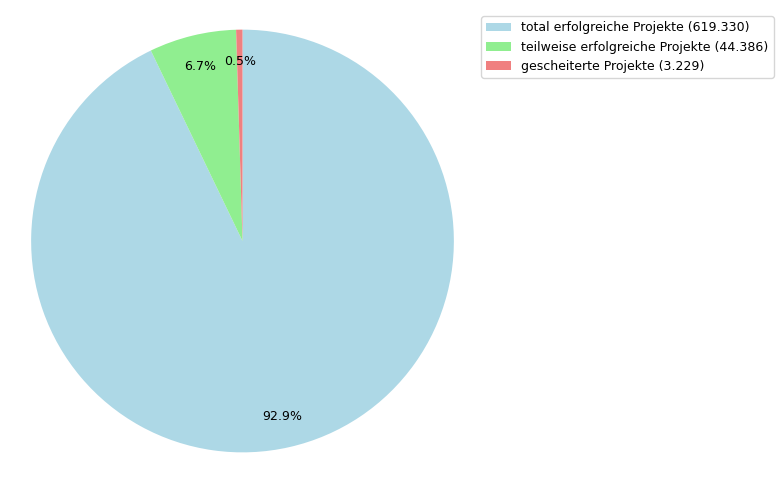

In [81]:
# Daten für den Pie-Chart
labels = [f'total erfolgreiche Projekte ({form_anzahl_total_erfolgreiche_projekte})',
          f'teilweise erfolgreiche Projekte ({form_anzahl_tw_erfolgreiche_projekte})',
          f'gescheiterte Projekte ({form_anzahl_gescheiterte_projekte})']

sizes = [anzahl_total_erfolgreiche_projekte,
         anzahl_tw_erfolgreiche_projekte, anzahl_gescheiterte_projekte]

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Erstelle den Pie-Chart im objektorientierten Stil mit Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False,
       pctdistance=0.85, textprops={'fontsize': 9})

# Hinzufügen von Text in den Kuchenstücken
ax.axis('equal')

# Legende erstellen
legend_labels = labels
legend_colors = colors
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

# Anzeigen des Pie-Charts
plt.show()

Um zu erkennen, wie viele Projekte erfolgreich verliefen, habe ich Erfolgskategorien vergeben. 
Total erfolgreich bedeutet, die Projekte wurden komplett finanziert, was bei über 90 Prozent der Projekte der Fall war. Fast 7 Prozent der Projekte wurden nur zu einem teil finanziert, waren also teilweise erfolgreich und 0,5% der Projekte sind gescheitert, wurden also überhaupt nicht finanziert.

### Prozentsätze der teilweise erfolgreichen Projekte

In [82]:
tw_erfolgreiche_projekte_copy = tw_erfolgreiche_projekte.copy()
tw_erfolgreiche_projekte_copy['percent'] = (
    (tw_erfolgreiche_projekte['funded_amount'] / tw_erfolgreiche_projekte['loan_amount']) * 100).round(1)

tw_erfolgreiche_projekte_copy

funded_amount  loan_amount                   activity       sector  \
87               4275         5000  Personal Housing Expenses      Housing   
112              1925         2400         Electronics Repair     Services   
183              2625         3000              Grocery Store         Food   
306              2750         3000              Grocery Store         Food   
310              1300         3000                   Clothing     Clothing   
...               ...          ...                        ...          ...   
666904            100          775  Personal Housing Expenses      Housing   
666907             75          125                  Livestock  Agriculture   
666908             75          250                  Livestock  Agriculture   
666921             75          125                  Livestock  Agriculture   
666922             75          125                  Livestock  Agriculture   

                                                      use country_code  \
87      to pave the ground and repair the ceiling, to ...           PS   
112                   to pay the annual rent for his shop           IQ   
183     to pay the annual rent on his grocery store an...           IQ   
306     to install a new floor in his grocery store an...           IQ   
310                     to buy shoes and clothes to sell.           PS   
...                                                   ...          ...   
666904  to install 5 new windows and save heat in winter.           UA   
666907     Pretend the flagged issue was addressed by KC.           MX   
666908                      Reviewed loan use in english.           GH   
666921     Pretend the flagged issue was addressed by KC.           MX   
666922     Pretend the flagged issue was addressed by KC.           MX   

          country currency  term_in_months  lender_count borrower_genders  \
87      Palestine      USD              39            58             male   
112          Iraq      USD              15            41             male   
183          Iraq      USD              15            72             male   
306          Iraq      USD              15            44             male   
310     Palestine      USD              27            35           female   
...           ...      ...             ...           ...              ...   
666904    Ukraine      UAH              14             4           female   
666907     Mexico      MXN              13             3   female, female   
666908      Ghana      GHS              13             3           female   
666921     Mexico      MXN              13             3   female, female   
666922     Mexico      MXN              13             3   female, female   

       repayment_interval  percent  
87                monthly     85.5  
112               monthly     80.2  
183               monthly     87.5  
306               monthly     91.7  
310               monthly     43.3  
...                   ...      ...  
666904            monthly     12.9  
666907            monthly     60.0  
666908            monthly     30.0  
666921            monthly     60.0  
666922            monthly     60.0  

[44386 rows x 13 columns]

### Einteilung in Gruppen nach Prozentsätzen

In [83]:
bins = [0, 25, 50, 75, 100]
labels = ['0 - 24.9', '25 - 49.9', '50 - 74.9', '75 - 99.9']

In [84]:
tw_erfolgreiche_projekte_copy['group'] = pd.cut(
    tw_erfolgreiche_projekte_copy['percent'], bins=bins, labels=labels)

In [85]:
tw_erfolgreiche_projekte_copy

funded_amount  loan_amount                   activity       sector  \
87               4275         5000  Personal Housing Expenses      Housing   
112              1925         2400         Electronics Repair     Services   
183              2625         3000              Grocery Store         Food   
306              2750         3000              Grocery Store         Food   
310              1300         3000                   Clothing     Clothing   
...               ...          ...                        ...          ...   
666904            100          775  Personal Housing Expenses      Housing   
666907             75          125                  Livestock  Agriculture   
666908             75          250                  Livestock  Agriculture   
666921             75          125                  Livestock  Agriculture   
666922             75          125                  Livestock  Agriculture   

                                                      use country_code  \
87      to pave the ground and repair the ceiling, to ...           PS   
112                   to pay the annual rent for his shop           IQ   
183     to pay the annual rent on his grocery store an...           IQ   
306     to install a new floor in his grocery store an...           IQ   
310                     to buy shoes and clothes to sell.           PS   
...                                                   ...          ...   
666904  to install 5 new windows and save heat in winter.           UA   
666907     Pretend the flagged issue was addressed by KC.           MX   
666908                      Reviewed loan use in english.           GH   
666921     Pretend the flagged issue was addressed by KC.           MX   
666922     Pretend the flagged issue was addressed by KC.           MX   

          country currency  term_in_months  lender_count borrower_genders  \
87      Palestine      USD              39            58             male   
112          Iraq      USD              15            41             male   
183          Iraq      USD              15            72             male   
306          Iraq      USD              15            44             male   
310     Palestine      USD              27            35           female   
...           ...      ...             ...           ...              ...   
666904    Ukraine      UAH              14             4           female   
666907     Mexico      MXN              13             3   female, female   
666908      Ghana      GHS              13             3           female   
666921     Mexico      MXN              13             3   female, female   
666922     Mexico      MXN              13             3   female, female   

       repayment_interval  percent      group  
87                monthly     85.5  75 - 99.9  
112               monthly     80.2  75 - 99.9  
183               monthly     87.5  75 - 99.9  
306               monthly     91.7  75 - 99.9  
310               monthly     43.3  25 - 49.9  
...                   ...      ...        ...  
666904            monthly     12.9   0 - 24.9  
666907            monthly     60.0  50 - 74.9  
666908            monthly     30.0  25 - 49.9  
666921            monthly     60.0  50 - 74.9  
666922            monthly     60.0  50 - 74.9  

[44386 rows x 14 columns]

### Verteilung der Prozentsatzgruppen

In [86]:
verteilung_gruppen = tw_erfolgreiche_projekte_copy['group'].value_counts()

verteilung_gruppen

50 - 74.9    14140
25 - 49.9    13408
0 - 24.9      9463
75 - 99.9     7373
Name: group, dtype: int64

### Balkendiagramm: Verteilung der Prozentsatzgruppen

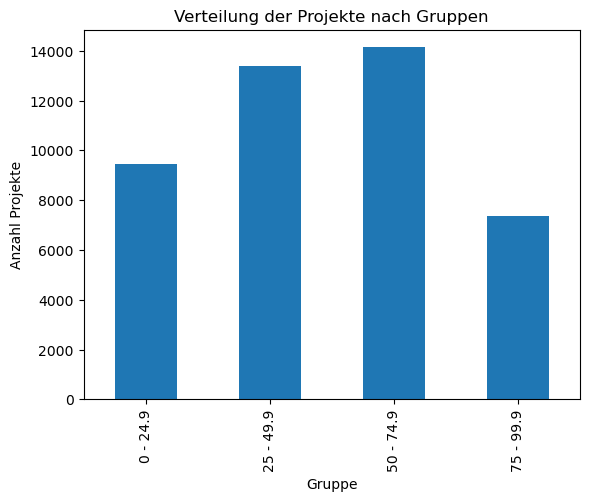

In [87]:
# Zähle die Projekte in jeder Gruppe
verteilung_gruppen = tw_erfolgreiche_projekte_copy['group'].value_counts()

# Sortiere die Gruppen nach deinen Kriterien
verteilung_gruppen = verteilung_gruppen.reindex(labels)

# Erstelle ein Balkendiagramm
verteilung_gruppen.plot(kind='bar')

# Beschriftung hinzufügen
plt.xlabel('Gruppe')
plt.ylabel('Anzahl Projekte')
plt.title('Verteilung der Projekte nach Gruppen')

# Das Diagramm anzeigen
plt.show()

## Durchschnittliche Kreditfinanzierung ('funded_amount')

Durchschnittlicher Betrag, der für jeden Kredit finanziert wurde. Median des finanzierten Betrags.

In [88]:
# Durchschnittliche Kreditfinanzierung
durchschnittliche_finanzierung = df_gesamt['funded_amount'].mean()

# Median des finanzierten Betrags
median_finanzierung = df_gesamt['funded_amount'].median()

print(
    f'Durchschnittliche Kreditfinanzierung: {durchschnittliche_finanzierung}')
print(f'Median des finanzierten Betrags: {median_finanzierung}')

Durchschnittliche Kreditfinanzierung: 785.1633193141863
Median des finanzierten Betrags: 450.0


## Durchschnittlicher angeforderter Kreditbetrag  ('loan_amount')

Durchschnittlicher Betrag, den Kreditnehmer angefordert haben. Median des angeforderten Betrags.

In [89]:
# Durchschnittlicher angeforderter Kreditbetrag
durchschnittlicher_kreditbetrag = df_gesamt['loan_amount'].mean()

# Median des angeforderten Kreditbetrags
median_kreditbetrag = df_gesamt['loan_amount'].median()

print(
    f'Durchschnittlicher angeforderter Kreditbetrag: {durchschnittlicher_kreditbetrag}')
print(f'Median des angeforderten Kreditbetrags: {median_kreditbetrag}')

Durchschnittlicher angeforderter Kreditbetrag: 840.2463096657145
Median des angeforderten Kreditbetrags: 500.0


## Verteilung der Kredite nach Aktivität ('activity') und Sektor ('sector')

Anzahl der Kredite pro Aktivität und Sektor. Prozentsatz der Kredite pro Aktivität und Sektor.

In [90]:
# Zähle die Anzahl der Kredite pro Aktivität
kredite_pro_aktivität = df_gesamt['activity'].value_counts()

# Zähle die Anzahl der Kredite pro Sektor
kredite_pro_sektor = df_gesamt['sector'].value_counts()

### Anzahl Kredite pro Aktivität

In [91]:
kredite_pro_aktivität

Farming                      72621
General Store                64517
Personal Housing Expenses    32295
Food Production/Sales        27904
Agriculture                  26689
                             ...  
Film                            12
Personal Care Products           7
Event Planning                   5
Celebrations                     5
Adult Care                       2
Name: activity, Length: 163, dtype: int64

### Anzahl Kredite pro Sektor

In [92]:
kredite_pro_sektor

Agriculture       179209
Food              135744
Retail            123753
Services           44693
Personal Use       36245
Housing            33571
Clothing           32477
Education          30837
Transportation     15453
Arts               11994
Health              9171
Construction        6194
Manufacturing       6158
Entertainment        820
Wholesale            626
Name: sector, dtype: int64

In [93]:
# Berechne den Prozentsatz der Kredite pro Aktivität
prozentsatz_pro_aktivität = (kredite_pro_aktivität / len(df_gesamt)) * 100

# Berechne den Prozentsatz der Kredite pro Sektor
prozentsatz_pro_sektor = (kredite_pro_sektor / len(df_gesamt)) * 100

### Prozentsatz Kredite pro Aktivität

In [94]:
prozentsatz_pro_aktivität

Farming                      10.888604
General Store                 9.673511
Personal Housing Expenses     4.842228
Food Production/Sales         4.183853
Agriculture                   4.001679
                               ...    
Film                          0.001799
Personal Care Products        0.001050
Event Planning                0.000750
Celebrations                  0.000750
Adult Care                    0.000300
Name: activity, Length: 163, dtype: float64

### Prozentsatz Kredite pro Sektor

In [95]:
prozentsatz_pro_sektor

Agriculture       26.870132
Food              20.353103
Retail            18.555203
Services           6.701152
Personal Use       5.434481
Housing            5.033548
Clothing           4.869517
Education          4.623620
Transportation     2.316983
Arts               1.798349
Health             1.375076
Construction       0.928712
Manufacturing      0.923315
Entertainment      0.122949
Wholesale          0.093861
Name: sector, dtype: float64

### Alle Sektoren und die jeweils zugehörigen Aktivitäten

In [96]:
# Gruppiere den DataFrame nach Sektor und liste die eindeutigen Aktivitäten auf
sektor_aktivitäten_liste = df_gesamt.groupby(
    'sector')['activity'].unique().reset_index()

# Ausgabe der Liste mit Sektoren und zugehörigen Aktivitäten
for index, row in sektor_aktivitäten_liste.iterrows():
    sektor = row['sector']
    aktivitäten = row['activity']
    print(f'Sektor: {sektor}')
    print(f'Aktivitäten: {aktivitäten}')
    print()

Sektor: Agriculture
Aktivitäten: ['Dairy' 'Poultry' 'Farming' 'Pigs' 'Agriculture' 'Cattle' 'Animal Sales'
 'Livestock' 'Farm Supplies' 'Veterinary Sales' 'Land Rental' 'Flowers'
 'Aquaculture' 'Beekeeping']

Sektor: Arts
Aktivitäten: ['Embroidery' 'Arts' 'Crafts' 'Knitting' 'Weaving' 'Textiles' 'Film'
 'Musical Instruments' 'Patchwork']

Sektor: Clothing
Aktivitäten: ['Clothing Sales' 'Used Clothing' 'Clothing' 'Used Shoes']

Sektor: Construction
Aktivitäten: ['Construction Supplies' 'Construction' 'Timber Sales' 'Carpentry'
 'Bricks' 'Cement' 'Quarrying' 'Well digging']

Sektor: Education
Aktivitäten: ['Education provider' 'Higher education costs'
 'Primary/secondary school costs' 'Computer']

Sektor: Entertainment
Aktivitäten: ['Entertainment' 'Games' 'Musical Performance']

Sektor: Food
Aktivitäten: ['Fruits & Vegetables' 'Milk Sales' 'Food Production/Sales' 'Bakery'
 'Restaurant' 'Food Stall' 'Fish Selling' 'Butcher Shop' 'Food Market'
 'Grocery Store' 'Food' 'Fishing' 'Cafe' 'Cer

### Anzahl der Aktivitäten pro Sektor

In [97]:
sector_counts = df_gesamt.groupby('sector')['activity'].nunique()

sector_counts

sector
Agriculture       14
Arts               9
Clothing           4
Construction       8
Education          4
Entertainment      3
Food              20
Health             6
Housing            2
Manufacturing      6
Personal Use       8
Retail            34
Services          39
Transportation     4
Wholesale          2
Name: activity, dtype: int64

### Balkendiagramm: Anzahl der Aktivitäten pro Sektor

In [98]:
# Gruppiere nach Sektor und zähle die eindeutigen Aktivitäten
activity_counts = df_gesamt.groupby(
    'sector')['activity'].nunique().reset_index()

# Erstelle das Balkendiagramm mit Plotly Express
fig = px.bar(activity_counts, x='sector', y='activity',
             title='Anzahl der verschiedenen Aktivitäten pro Sektor')
# Sortiere die x-Achse nach der Anzahl der Aktivitäten
fig.update_xaxes(categoryorder='total descending')
fig.show()

### BEWERTEN: Treemap: Sektoren und die zugehörigen Aktivitäten

In [99]:
#Gesamtanzahl der Daten berechnen
total_records = df_gesamt.shape[0]

# Gruppieren der Daten nach den Spalten 'sector' und 'activity' und Zählen der Anzahl der Kredite.
sector_activity_data = df_gesamt.groupby(
    ['sector', 'activity']).size().reset_index(name='loan_count')

# Berechnen des Prozentsatzes der Kredite pro Aktivität und Sektor.
sector_activity_data['loan_percentage'] = (
    sector_activity_data['loan_count'] / total_records) * 100

# Erstellen der Treemap mit Farben basierend auf dem Prozentsatz.
fig = px.treemap(sector_activity_data,
                 path=['sector', 'activity'],
                 values='loan_count',
                 color='loan_percentage',
                 color_continuous_scale='Plasma',
                 title='Treemap der Kredite nach Sektor und Aktivität'
                )
fig.update_traces(textinfo='label+value+percent parent')
fig.show()

Die gezeigte Treemap visualisiert Daten über Kredite, die nach den Kategorien "Sektor" und "Aktivität" gruppiert sind. Hier Beschreibung:

Hierarchische Struktur: Die Treemap ist in Form eines hierarchischen Baums aufgebaut. Die oberste Ebene repräsentiert verschiedene Sektoren, und innerhalb jedes Sektors sind verschiedene Aktivitäten angeordnet.

Flächenrepräsentation: Jedes Rechteck in der Treemap stellt eine Kategorie dar, entweder einen Sektor oder eine Aktivität. Die Größe der Rechtecke entspricht der *Anzahl der Kredite*, die dieser Kategorie zugeordnet sind. Größere Rechtecke repräsentieren mehr Kredite.

Farbige Darstellung: Die Farben der Rechtecke sind auf Basis des *Prozentsatzes der Kredite* in dieser Kategorie im Vergleich zur Gesamtanzahl der Kredite eingefärbt. Je intensiver die Farbe, desto größer ist der Prozentsatz. Dies ermöglicht eine schnelle visuelle Identifikation der Kategorien mit den meisten und den wenigsten Krediten.

Textinformationen: Die Treemap enthält auch Textinformationen in den Rechtecken. Sie zeigen den Namen der Kategorie, die Anzahl der Kredite in dieser Kategorie und den Prozentsatz dieser Kategorie im Verhältnis zur Gesamtzahl der übergeordneten Kategorie.

Interaktive Funktionen: Die Treemap ist interaktiv und ermöglicht es dem Benutzer, durch die Hierarchie zu navigieren. Wenn auf ein Rechteck geklickt wird, kann in eine tiefere Ebene der Hierarchie eingetaucht werden, um spezifischere Informationen anzuzeigen. Die Textinformationen werden entsprechend aktualisiert.

Farbskala: Die Farbskala (hier 'Plasma') erleichtert die Interpretation der Daten, da sie eine visuelle Unterscheidung zwischen den Kategorien ermöglicht.

Insgesamt ermöglicht diese Treemap eine intuitive Darstellung von Kreditdaten nach Sektoren und Aktivitäten. Benutzer können leicht erkennen, welche Sektoren oder Aktivitäten die meisten Kredite erhalten haben und wie sich dies im Verhältnis zum Gesamtvolumen der Kredite verhält. Dies erleichtert die Identifizierung von Mustern und Trends in den Daten.


Leider erschließen sich mir die Farben für die Sektoren und die dem zugrunde liegenden Prozentsätze noch nicht so ganz. Habe lange versucht es zu verstehen oder nachzuvollziehen, bin aber nicht drauf gekommen.

## Häufigste Verwendungszwecke ('use') der Kredite

Die am häufigsten genannten Verwendungszwecke für Kredite. Häufigkeitsverteilung der Verwendungszwecke.

### Die 15 häufigsten Wörter im Verwendungszweck

In [100]:
# Extrahiere die 'use'-Spalte
use_column = df_gesamt['use']

# Kombiniere alle Texte in der 'use'-Spalte zu einem einzigen Text
all_text = ' '.join(use_column)

# Entferne Satzzeichen
translator = str.maketrans('', '', string.punctuation)
text_without_punctuation = all_text.translate(translator)

# Tokenisiere den Text in Wörter
words = word_tokenize(text_without_punctuation)

# Entferne englische Stoppwörter
english_stopwords = set(stopwords.words('english'))
filtered_words = [word.lower()
                  for word in words if word.lower() not in english_stopwords]

# Verwende Counter, um die Häufigkeit der Wörter zu zählen
word_counts = Counter(filtered_words)

# Die 15 häufigsten Wörter anzeigen:
most_common_words = word_counts.most_common(15)

most_common_words

[('buy', 392252),
 ('purchase', 158733),
 ('sell', 104146),
 ('business', 65531),
 ('pay', 63601),
 ('water', 49670),
 ('supplies', 40872),
 ('items', 38943),
 ('additional', 36522),
 ('products', 35473),
 ('fertilizer', 34907),
 ('like', 33879),
 ('stock', 33580),
 ('materials', 32791),
 ('seeds', 30873)]

### Balkendiagramm: Die Häufigkeitsverteilung der Verwendungszwecke

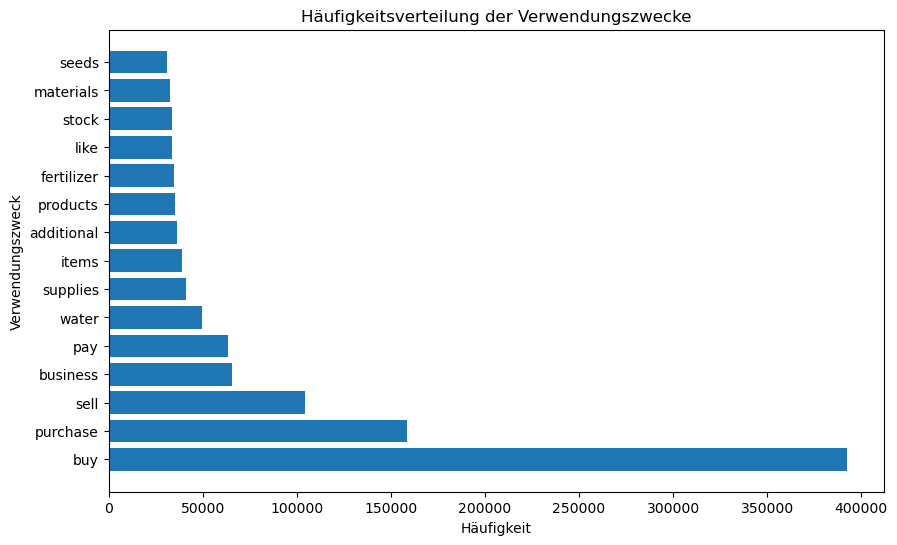

In [101]:
# Extrahiere die 'use'-Spalte
use_column = df_gesamt['use']

# Kombiniere alle Texte in der 'use'-Spalte zu einem einzigen Text
all_text = ' '.join(use_column)

# Entferne Satzzeichen und Stoppwörter

# Tokenisiere den Text in Wörter
words = word_tokenize(text_without_punctuation)

# Entferne englische Stoppwörter
english_stopwords = set(stopwords.words('english'))
filtered_words = [word.lower()
                  for word in words if word.lower() not in english_stopwords]

# Zähle die Häufigkeit der verbleibenden Wörter
word_counts = Counter(filtered_words)

# Konvertiere die Ergebnisse in einen DataFrame
word_counts_df = pd.DataFrame.from_dict(
    word_counts, orient='index', columns=['Frequency'])

# Sortiere den DataFrame nach der Häufigkeit absteigend
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

# Anzeigen der Top-N-Verwendungszwecke (zum Beispiel Top 15)
top_n = 15
top_n_word_counts = word_counts_df.head(top_n)

# Plot der Häufigkeitsverteilung
plt.figure(figsize=(10, 6))
plt.barh(top_n_word_counts.index, top_n_word_counts['Frequency'])
plt.xlabel('Häufigkeit')
plt.ylabel('Verwendungszweck')
plt.title('Häufigkeitsverteilung der Verwendungszwecke')
plt.show()

### Die 15 häufigsten zusammenhängenden Texte

In [102]:
# Extrahiere die 'use'-Spalte und wandele sie in Kleinbuchstaben um
use_column = df_gesamt['use'].str.lower()

# Ersetze Tabulatorzeichen durch Leerzeichen in den Texten
use_column = use_column.str.replace('\t', ' ')

# Entferne alle Zeichen außer Buchstaben und Leerzeichen
use_column = use_column.apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Ersetze 'their', 'her' und 'his' durch '*'
use_column = use_column.str.replace(r'\b(their|her|his)\b', '*', regex=True)

# Ersetze 'feeds' durch 'feed'
use_column = use_column.str.replace(r'\b(feeds)\b', 'feed', regex=True)

# Verwende Counter, um die Häufigkeit der Texte zu zählen
text_counts = Counter(use_column)

# Die 15 häufigsten Texte anzeigen:
most_common_texts = text_counts.most_common(15)

for text, count in most_common_texts:
    print(f"Text: {text}\nHäufigkeit: {count}\n")

Text: to buy a water filter to provide safe drinking water for * family
Häufigkeit: 13419

Text: to build a sanitary toilet for * family
Häufigkeit: 3310

Text: to buy feed and other supplies to raise * pigs
Häufigkeit: 3162

Text: to buy feed and vitamins for * pigs
Häufigkeit: 2778

Text: to buy fertilizers and other farm supplies
Häufigkeit: 2271

Text: to buy ingredients for * food production business
Häufigkeit: 2091

Text: to buy feed vitamins and other supplies to raise * livestock
Häufigkeit: 2072

Text: to purchase more groceries to sell
Häufigkeit: 1626

Text: to buy farm inputs
Häufigkeit: 1226

Text: to buy food and clothing eliminating pressure to sell maize for low prices at harvest
Häufigkeit: 1213

Text: to purchase improved farm inputs that will increase farm yield
Häufigkeit: 1066

Text: to purchase building materials and pay for construction labor
Häufigkeit: 1016

Text: to buy a water filter to provide safe drinking water for * family 
Häufigkeit: 986

Text: to buy 

### Balkendiagramm: Die Häufigkeitsverteilung der zusammenhängenden Texte

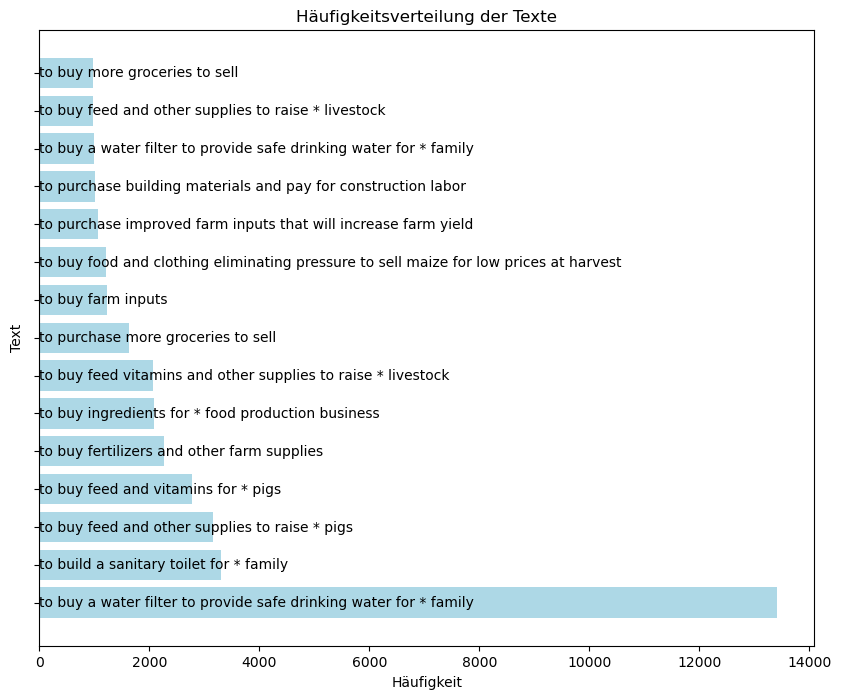

In [103]:
# Erstelle einen DataFrame
df = pd.DataFrame(most_common_texts, columns=['Text', 'Häufigkeit'])

# Sortiere den DataFrame nach Häufigkeit absteigend
df = df.sort_values(by='Häufigkeit', ascending=False)

# Erstelle ein Balkendiagramm mit vertauschten Achsen
plt.figure(figsize=(10, 8))
bars = plt.barh(df['Text'], df['Häufigkeit'], color='lightblue')
plt.xlabel('Häufigkeit')
plt.ylabel('Text')

# Texte auf den Balken schreiben
for bar, text in zip(bars, df['Text']):
    plt.text(0, bar.get_y() + bar.get_height() /
             2, text, va='center', fontsize=10)

plt.title('Häufigkeitsverteilung der Texte')
plt.yticks(np.arange(len(df)), [])  # Y-Achsenticks deaktivieren

plt.show()

Ich habe die Verwendungszwecke ('use') nach den am häufigsten vorkommenden zusammenhängen Texten durchsucht. Um eine bessere Auswertung zu erhalten, habe ich "his"/"her"/"their" durch ein Sternchen ersetzt. So werden die Texte die dies enthalten, ansonsten aber gleich sind zusammen ausgewertet. Ebenso habe ich "feeds" durch "feed" ersetzt, da die Wörter synonym genutzt werden können und daher Texte, die dies enthalten zusammen ausgewertet werden können.

Es fällt auf, dass die Kredite oft für Wasserfilter, Toiletten und alles mögliche rund um die Schweinezucht/Tierzucht benötigt werden. "his"/"her"/"their" könnte auf eine Mitgift hinweisen, es kann aber auch sein, dass der Text nicht vom Kreditnehmer selbst verfasst wurde

## Kredite nach Ländern ('country') und Währungen ('currency')

Anzahl der Kredite pro Land und Währung. Gesamtwert der Kredite pro Land und Währung.

### Anzahl und Gesamtwert der Kredite pro Land und Währung

In [104]:
# Anzahl der Kredite pro Land und Währung
anzahl_kredite = df_gesamt.groupby(
    ['country', 'currency']).size().reset_index(name='Anzahl der Kredite')

# Gesamtwert der Kredite pro Land und Währung
gesamtwert_kredite = df_gesamt.groupby(['country', 'currency'])[
    'funded_amount'].sum().reset_index(name='Gesamtwert der Kredite')

# Zusammenführen der Ergebnisse
ergebnis_l_w_df = pd.merge(anzahl_kredite, gesamtwert_kredite, on=[
                           'country', 'currency'])

ergebnis_l_w_df

country currency  Anzahl der Kredite  Gesamtwert der Kredite
0    Afghanistan      USD                   2                   14000
1        Albania      ALL                1916                 2419575
2        Albania      USD                   1                   50000
3        Armenia      AMD                5986                 6584800
4        Armenia      USD                2642                 4601425
..           ...      ...                 ...                     ...
132        Yemen      YER                2308                 1771950
133       Zambia      USD                   2                   60000
134       Zambia      ZMW                 748                 1059250
135     Zimbabwe      USD                3977                 3327650
136     Zimbabwe      ZWD                   1                      25

[137 rows x 4 columns]

### Kredite pro Land und Währung, sortiert nach Anzahl der Kredite

In [105]:
# Sortieren nach Anzahl der Kredite absteigend
ergebnis_l_w_df_nach_anzahl = ergebnis_l_w_df.sort_values(
    by='Anzahl der Kredite', ascending=False)

# Die Top 10 anzeigen
top_10_l_w_nach_anzahl = ergebnis_l_w_df_nach_anzahl.head(20)
top_10_l_w_nach_anzahl

country currency  Anzahl der Kredite  Gesamtwert der Kredite
97   Philippines      PHP              160360                54413075
52         Kenya      KES               74615                30732240
32   El Salvador      USD               39319                23059975
17      Cambodia      KHR               29485                13557475
87      Pakistan      PKR               26852                12419300
95          Peru      PEN               21337                28627475
24      Colombia      COP               21205                11897675
125       Uganda      UGX               20324                13747225
115   Tajikistan      TJS               17502                11232600
30       Ecuador      USD               13486                14568600
93      Paraguay      PYG               11836                29297600
44         India      INR               11178                 6340925
130      Vietnam      VND               10841                13660925
85       Nigeria      NGN               10129                 1869875
91     Palestine      USD                8140                12000275
104        Samoa      WST                7371                 5611900
11       Bolivia      BOB                7257                16296400
38     Guatemala      GTQ                7167                10667550
83     Nicaragua      NIO                7113                 6239725
60       Lebanon      USD                6708                 9394650

### Kredite pro Land und Währung, sortiert nach Gesamtwert der Kredite

In [106]:
# Sortieren nach Gesamtwert der Kredite absteigend
ergebnis_l_w_df_nach_gesamtwert = ergebnis_l_w_df.sort_values(
    by='Gesamtwert der Kredite', ascending=False)

# Die Top 10 anzeigen
top_10_l_w_nach_gesamtwert = ergebnis_l_w_df_nach_gesamtwert.head(20)
top_10_l_w_nach_gesamtwert

country currency  Anzahl der Kredite  \
97                            Philippines      PHP              160360   
52                                  Kenya      KES               74615   
93                               Paraguay      PYG               11836   
95                                   Peru      PEN               21337   
32                            El Salvador      USD               39319   
128                         United States      USD                5928   
11                                Bolivia      BOB                7257   
100                                Rwanda      RWF                6696   
30                                Ecuador      USD               13486   
125                                Uganda      UGX               20324   
130                               Vietnam      VND               10841   
17                               Cambodia      KHR               29485   
87                               Pakistan      PKR               26852   
91                              Palestine      USD                8140   
24                               Colombia      COP               21205   
115                            Tajikistan      TJS               17502   
121  The Democratic Republic of the Congo      USD                3070   
38                              Guatemala      GTQ                7167   
60                                Lebanon      USD                6708   
71                                 Mexico      MXN                5603   

     Gesamtwert der Kredite  
97                 54413075  
52                 30732240  
93                 29297600  
95                 28627475  
32                 23059975  
128                22676015  
11                 16296400  
100                15126450  
30                 14568600  
125                13747225  
130                13660925  
17                 13557475  
87                 12419300  
91                 12000275  
24                 11897675  
115                11232600  
121                11016925  
38                 10667550  
60                  9394650  
71                  8823950

### USD-Kredite pro Land

In [107]:
# Filtern nach Währung "USD"
ergebnis_usd_only = ergebnis_l_w_df[ergebnis_l_w_df['currency'] == 'USD']

# Anzeigen der Ergebnisse
ergebnis_usd_only

country currency  Anzahl der Kredite  Gesamtwert der Kredite
0       Afghanistan      USD                   2                   14000
2           Albania      USD                   1                   50000
4           Armenia      USD                2642                 4601425
6        Azerbaijan      USD                   1                    1200
8             Benin      USD                   2                   50300
..              ...      ...                 ...                     ...
126          Uganda      USD                  66                  291775
128   United States      USD                5928                22676015
131  Virgin Islands      USD                   2                       0
133          Zambia      USD                   2                   60000
135        Zimbabwe      USD                3977                 3327650

[64 rows x 4 columns]

### USD-Kredite pro Land, sortiert nach Anzahl der Kredite

In [108]:
# Sortieren nach Anzahl der Kredite absteigend
ergebnis_usd_only_nach_anzahl = ergebnis_usd_only.sort_values(
    by='Anzahl der Kredite', ascending=False)

# Die Top 10 anzeigen
top_10_usd_only_nach_anzahl = ergebnis_usd_only_nach_anzahl.head(20)
top_10_usd_only_nach_anzahl

country currency  Anzahl der Kredite  \
32                            El Salvador      USD               39319   
30                                Ecuador      USD               13486   
91                              Palestine      USD                8140   
60                                Lebanon      USD                6708   
128                         United States      USD                5928   
18                               Cambodia      USD                5324   
84                              Nicaragua      USD                4563   
135                              Zimbabwe      USD                3977   
121  The Democratic Republic of the Congo      USD                3070   
122                           Timor-Leste      USD                2676   
4                                 Armenia      USD                2642   
116                            Tajikistan      USD                2016   
12                                Bolivia      USD                1465   
48                                   Iraq      USD                 989   
34                                Georgia      USD                 838   
96                                   Peru      USD                 828   
53                                  Kenya      USD                 497   
56                             Kyrgyzstan      USD                 350   
75                               Mongolia      USD                 244   
41                                  Haiti      USD                 223   

     Gesamtwert der Kredite  
32                 23059975  
30                 14568600  
91                 12000275  
60                  9394650  
128                22676015  
18                  5227350  
84                  3553775  
135                 3327650  
121                11016925  
122                 2316900  
4                   4601425  
116                 2504325  
12                  1914125  
48                  2605500  
34                  1480600  
96                  1674625  
53                  1237725  
56                   419350  
75                   446700  
41                   641250

### USD-Kredite pro Land, sortiert nach Gesamtwert der Kredite

In [109]:
# Sortieren nach Gesamtwert der Kredite absteigend
ergebnis_usd_only_nach_gesamtwert = ergebnis_usd_only.sort_values(
    by='Gesamtwert der Kredite', ascending=False)

# Die Top 10 anzeigen
top_10_usd_only_nach_gesamtwert = ergebnis_usd_only_nach_gesamtwert.head(20)
top_10_usd_only_nach_gesamtwert

country currency  Anzahl der Kredite  \
32                            El Salvador      USD               39319   
128                         United States      USD                5928   
30                                Ecuador      USD               13486   
91                              Palestine      USD                8140   
121  The Democratic Republic of the Congo      USD                3070   
60                                Lebanon      USD                6708   
18                               Cambodia      USD                5324   
4                                 Armenia      USD                2642   
84                              Nicaragua      USD                4563   
135                              Zimbabwe      USD                3977   
48                                   Iraq      USD                 989   
116                            Tajikistan      USD                2016   
122                           Timor-Leste      USD                2676   
12                                Bolivia      USD                1465   
96                                   Peru      USD                 828   
34                                Georgia      USD                 838   
53                                  Kenya      USD                 497   
41                                  Haiti      USD                 223   
75                               Mongolia      USD                 244   
56                             Kyrgyzstan      USD                 350   

     Gesamtwert der Kredite  
32                 23059975  
128                22676015  
30                 14568600  
91                 12000275  
121                11016925  
60                  9394650  
18                  5227350  
4                   4601425  
84                  3553775  
135                 3327650  
48                  2605500  
116                 2504325  
122                 2316900  
12                  1914125  
96                  1674625  
34                  1480600  
53                  1237725  
41                   641250  
75                   446700  
56                   419350

### Anzahl und Gesamtwert der Kredite pro Land

In [110]:
# Anzahl der Kredite pro Land
anzahl_kredite = df_gesamt.groupby(
    ['country']).size().reset_index(name='Anzahl der Kredite')

# Gesamtwert der Kredite pro Land
gesamtwert_kredite = df_gesamt.groupby(
    ['country'])['funded_amount'].sum().reset_index(name='Gesamtwert der Kredite')

# Zusammenführen der Ergebnisse
ergebnis_l_df = pd.merge(anzahl_kredite, gesamtwert_kredite, on=['country'])

ergebnis_l_df

country  Anzahl der Kredite  Gesamtwert der Kredite
0      Afghanistan                   2                   14000
1          Albania                1917                 2469575
2          Armenia                8628                11186225
3       Azerbaijan                1905                 2653225
4           Belize                 123                  111975
..             ...                 ...                     ...
82         Vietnam               10841                13660925
83  Virgin Islands                   2                       0
84           Yemen                2308                 1771950
85          Zambia                 750                 1119250
86        Zimbabwe                3978                 3327675

[87 rows x 3 columns]

### Kredite pro Land, sortiert nach Anzahl der Kredite

In [111]:
# Sortieren nach Anzahl der Kredite absteigend
ergebnis_l_df_nach_anzahl = ergebnis_l_df.sort_values(
    by='Anzahl der Kredite', ascending=False)

# Die Top 20 anzeigen
top_20_l_nach_anzahl = ergebnis_l_df_nach_anzahl.head(20)
top_20_l_nach_anzahl

country  Anzahl der Kredite  Gesamtwert der Kredite
59  Philippines              160361                54438075
34        Kenya               75112                31969965
22  El Salvador               39319                23059975
11     Cambodia               34809                18784825
54     Pakistan               26853                12465425
58         Peru               22165                30302100
15     Colombia               21216                11968075
78       Uganda               20390                14039000
71   Tajikistan               19518                13736925
20      Ecuador               13486                14568600
57     Paraguay               11841                29297650
52    Nicaragua               11676                 9793500
29        India               11194                 6373500
82      Vietnam               10841                13660925
53      Nigeria               10130                 1904875
38      Lebanon                8776                11539125
7       Bolivia                8722                18210525
2       Armenia                8628                11186225
55    Palestine                8152                12017025
63        Samoa                7372                 5613400

### Kredite pro Land, sortiert nach Gesamtwert der Kredite

In [112]:
# Sortieren nach Gesamtwert der Kredite absteigend
ergebnis_l_df_nach_gesamtwert = ergebnis_l_df.sort_values(
    by='Gesamtwert der Kredite', ascending=False)

# Die Top 20 anzeigen
top_20_l_nach_gesamtwert = ergebnis_l_df_nach_gesamtwert.head(20)
top_20_l_nach_gesamtwert

country  Anzahl der Kredite  \
59                           Philippines              160361   
34                                 Kenya               75112   
58                                  Peru               22165   
57                              Paraguay               11841   
22                           El Salvador               39319   
80                         United States                5928   
11                              Cambodia               34809   
7                                Bolivia                8722   
61                                Rwanda                6720   
20                               Ecuador               13486   
78                                Uganda               20390   
71                            Tajikistan               19518   
82                               Vietnam               10841   
54                              Pakistan               26853   
55                             Palestine                8152   
15                              Colombia               21216   
38                               Lebanon                8776   
2                                Armenia                8628   
74  The Democratic Republic of the Congo                3070   
26                             Guatemala                7234   

    Gesamtwert der Kredite  
59                54438075  
34                31969965  
58                30302100  
57                29297650  
22                23059975  
80                22676015  
11                18784825  
7                 18210525  
61                15473975  
20                14568600  
78                14039000  
71                13736925  
82                13660925  
54                12465425  
55                12017025  
15                11968075  
38                11539125  
2                 11186225  
74                11016925  
26                10857175

### Farben für die Balkendiagramme

In [113]:
mein_farben_dict = {
    'Armenia': 'bisque',
    'Bolivia': 'blue',
    'Cambodia': 'cyan',
    'Colombia': 'darkblue',
    'Ecuador': 'darkgreen',
    'El Salvador': 'darkorange',
    'Guatemala': 'darkred',
    'India': 'deeppink',
    'Kenya': 'gold',
    'Lebanon': 'goldenrod',
    'Nicaragua': 'lightblue',
    'Nigeria': 'lightcoral',
    'Pakistan': 'lightgreen',
    'Palestine': 'gray',
    'Paraguay': 'lime',
    'Peru': 'limegreen',
    'Philippines': 'magenta',
    'Rwanda': 'orange',
    'Samoa': 'peru',
    'Tajikistan': 'pink',
    'The Democratic Republic of the Congo': 'purple',
    'Uganda': 'red',
    'United States': 'tomato',
    'Vietnam': 'yellow'
}

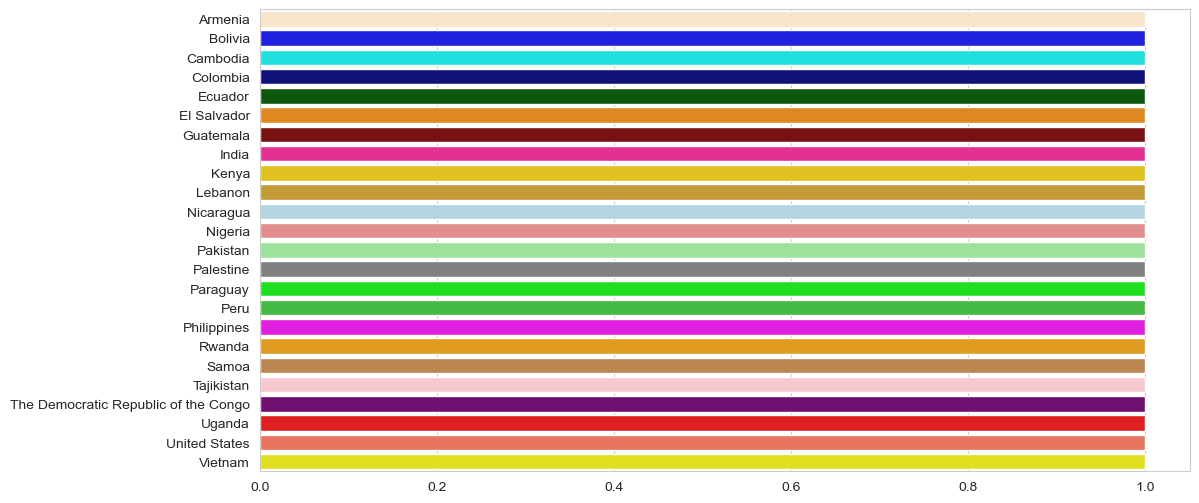

In [114]:
# Erstelle eine Liste der Länder in der gewünschten Reihenfolge
laender = list(mein_farben_dict.keys())

# Erstelle ein Diagramm mit horizontalen Balken in den Farben der Länder
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(x=[1] * len(laender), y=laender,
            palette=list(mein_farben_dict.values()))

# Achsen und Beschriftungen ausblenden
plt.axis('on')

# Diagramm anzeigen
plt.show()

In [115]:
top_20_l_nach_anzahl_copy = top_20_l_nach_anzahl.copy()

top_20_l_nach_anzahl_copy['Farben'] = top_20_l_nach_anzahl_copy['country'].map(
    mein_farben_dict)

### BEWERTEN: Balkendiagramm: Top 20 Länder nach Anzahl der Kredite (jedes Land mit eigener Farbe)

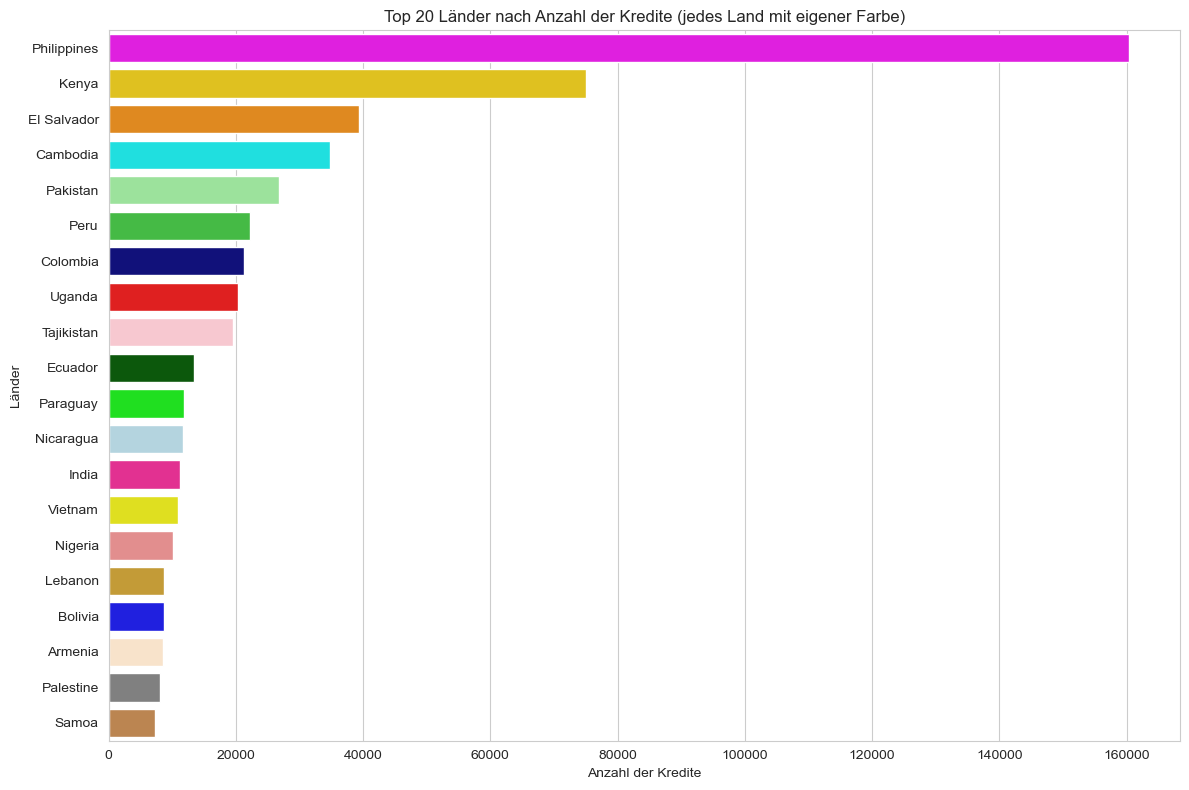

In [116]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.barplot(x='Anzahl der Kredite', y='country',
            data=top_20_l_nach_anzahl_copy, palette=top_20_l_nach_anzahl_copy['Farben'])

plt.title('Top 20 Länder nach Anzahl der Kredite (jedes Land mit eigener Farbe)')
plt.xlabel('Anzahl der Kredite')
plt.ylabel('Länder')

plt.tight_layout()
plt.show()

In [117]:
top_20_l_nach_gesamtwert_copy = top_20_l_nach_gesamtwert.copy()

top_20_l_nach_gesamtwert_copy['Farben'] = top_20_l_nach_gesamtwert_copy['country'].map(
    mein_farben_dict)

### BEWERTEN: Balkendiagramm: Top 20 Länder nach Gesamtwert der Kredite (jedes Land mit eigener Farbe)

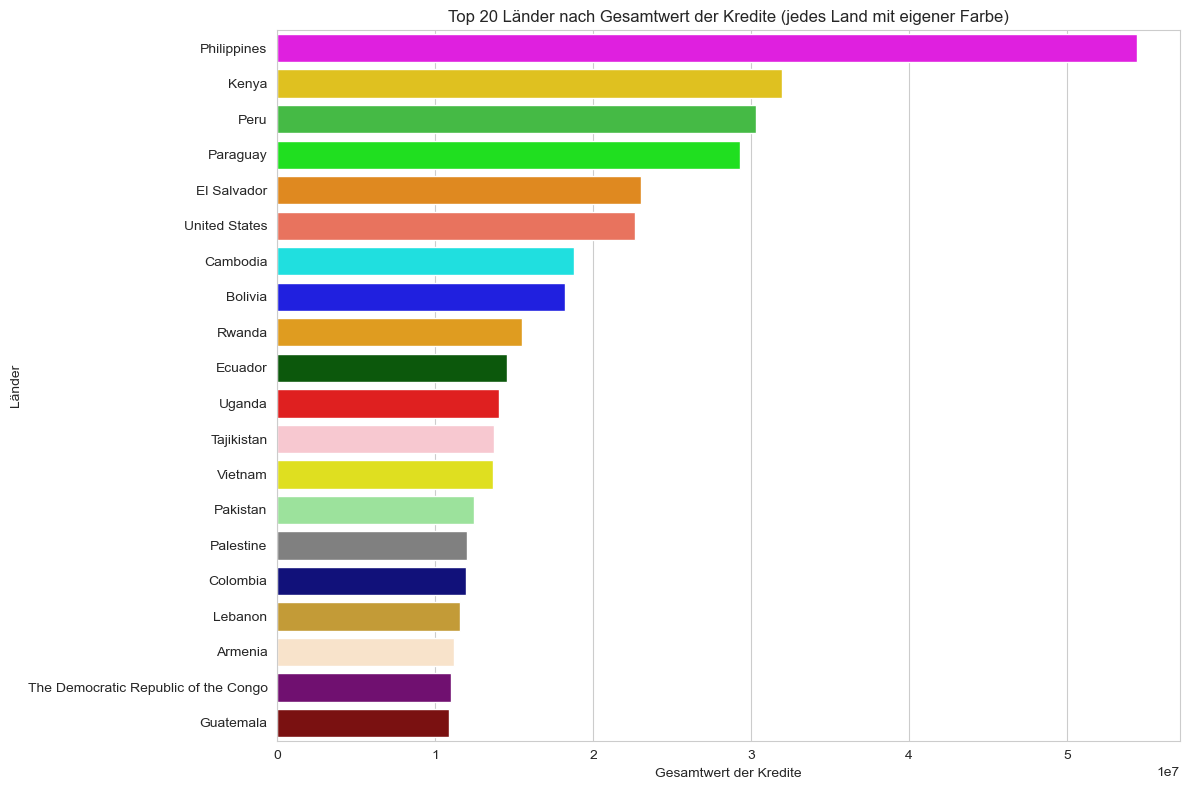

In [118]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

sns.barplot(x='Gesamtwert der Kredite', y='country',
            data=top_20_l_nach_gesamtwert_copy, palette=top_20_l_nach_gesamtwert_copy['Farben'])

plt.title('Top 20 Länder nach Gesamtwert der Kredite (jedes Land mit eigener Farbe)')
plt.xlabel('Gesamtwert der Kredite')
plt.ylabel('Länder')

plt.tight_layout()
plt.show()

Ich habe jedem Land eine eigene Farbe zugewiesen, damit man leicht Vergleiche zwischen den Top 20 Ländern nach Gesamtwert der Kredite und Anzahl der Kredite pro Land ziehen kann. Gesamtwert bezieht sich hier auf funded_amount.

### Anzahl und Gesamtwert der Kredite pro Währung

In [119]:
# Anzahl der Kredite pro Währung
anzahl_kredite = df_gesamt.groupby(
    ['currency']).size().reset_index(name='Anzahl der Kredite')

# Gesamtwert der Kredite pro Währung
gesamtwert_kredite = df_gesamt.groupby(
    ['currency'])['funded_amount'].sum().reset_index(name='Gesamtwert der Kredite')

# Zusammenführen der Ergebnisse
ergebnis_w_df = pd.merge(anzahl_kredite, gesamtwert_kredite, on=['currency'])

ergebnis_w_df

currency  Anzahl der Kredite  Gesamtwert der Kredite
0       ALL                1916                 2419575
1       AMD                5986                 6584800
2       AZN                1904                 2652025
3       BIF                 825                 2372400
4       BOB                7257                16296400
..      ...                 ...                     ...
62      XOF               18584                19985475
63      YER                2308                 1771950
64      ZAR                 377                  572250
65      ZMW                 748                 1059250
66      ZWD                   1                      25

[67 rows x 3 columns]

### Kredite pro Währung, sortiert nach Anzahl der Kredite

In [120]:
# Sortieren nach Anzahl der Kredite absteigend
ergebnis_w_df_nach_anzahl = ergebnis_w_df.sort_values(
    by='Anzahl der Kredite', ascending=False)

# Die Top 10 anzeigen
top_10_w_nach_anzahl = ergebnis_w_df_nach_anzahl.head(20)
top_10_w_nach_anzahl

currency  Anzahl der Kredite  Gesamtwert der Kredite
42      PHP              160360                54413075
56      USD              104423               129135010
23      KES               74615                30732240
25      KHR               29485                13557475
43      PKR               26852                12419300
41      PEN               21337                28627475
9       COP               21205                11897675
55      UGX               20324                13747225
62      XOF               18584                19985475
51      TJS               17502                11232600
44      PYG               11836                29297600
21      INR               11178                 6340925
57      VND               10841                13660925
38      NGN               10129                 1869875
59      WST                7371                 5611900
4       BOB                7257                16296400
16      GTQ                7167                10667550
39      NIO                7113                 6239725
45      RWF                6696                15126450
17      HNL                6393                 5571025

### Kredite pro Währung, sortiert nach Gesamtwert der Kredite

In [121]:
# Sortieren nach Gesamtwert der Kredite absteigend
ergebnis_w_df_nach_gesamtwert = ergebnis_w_df.sort_values(
    by='Gesamtwert der Kredite', ascending=False)

# Die Top 10 anzeigen
top_10_w_nach_gesamtwert = ergebnis_w_df_nach_gesamtwert.head(20)
top_10_w_nach_gesamtwert

currency  Anzahl der Kredite  Gesamtwert der Kredite
56      USD              104423               129135010
42      PHP              160360                54413075
23      KES               74615                30732240
44      PYG               11836                29297600
41      PEN               21337                28627475
62      XOF               18584                19985475
4       BOB                7257                16296400
45      RWF                6696                15126450
55      UGX               20324                13747225
57      VND               10841                13660925
25      KHR               29485                13557475
43      PKR               26852                12419300
9       COP               21205                11897675
51      TJS               17502                11232600
16      GTQ                7167                10667550
35      MXN                5603                 8823950
1       AMD                5986                 6584800
21      INR               11178                 6340925
24      KGS                5423                 6308850
39      NIO                7113                 6239725

## Durchschnittliche Laufzeit der Kredite in Monaten ('term_in_months')


Durchschnittliche Laufzeit der Kredite. Maximale und minimale Laufzeit der Kredite.

In [122]:
df_gesamt['term_in_months'].describe()[['mean', 'max', 'min']]

mean     13.730305
max     158.000000
min       1.000000
Name: term_in_months, dtype: float64

## Durchschnittliche Anzahl der Geldgeber pro Kredit ('lender_count')


Durchschnittliche Anzahl der Geldgeber pro Kredit. Maximale und minimale Anzahl der Geldgeber pro Kredit.

In [123]:
df_gesamt['lender_count'].describe()[['mean', 'max', 'min']]

mean      20.551845
max     2986.000000
min        0.000000
Name: lender_count, dtype: float64

## Geschlecht und Anzahl der Kreditnehmer ('borrower_genders')

Verteilung der Kreditnehmer nach Geschlecht. Durchschnittlicher finanzierte Betrag nach Geschlecht.

### Zählen der Anzahl der Kreditnehmer

In [124]:
# Verwende str.split(), um die Zeilen in Wörter aufzuteilen, und zähle die Anzahl der Wörter
df_gesamt['count_borrowers'] = df_gesamt['borrower_genders'].str.split().apply(len)

# Die resultierende Spalte 'count_borrowers' enthält die Anzahl der Wörter pro Zeile
df_gesamt['count_borrowers']

0         1
1         2
2         1
3         1
4         1
         ..
666940    1
666941    1
666942    1
666943    1
666944    1
Name: count_borrowers, Length: 666945, dtype: int64

### Häufigkeiten der verschiedenen Kreditnehmer-Anzahlen

In [125]:
# Verwende value_counts() auf der Spalte 'count_borrowers', um die Häufigkeit der verschiedenen Anzahlen zu zählen
anzahl_häufigkeit = df_gesamt['count_borrowers'].value_counts()

# Die resultierende Serie 'anzahl_häufigkeit' enthält die Häufigkeit der verschiedenen Anzahlen
anzahl_häufigkeit

1     561185
2      16206
3      16200
4      13547
5      13485
8       5430
10      5167
6       4982
7       4039
9       3643
11      2823
12      2426
15      2347
17      2049
13      1965
16      1674
14      1616
18      1303
20      1062
19       993
21       643
22       561
23       533
25       517
24       433
26       313
27       258
28       246
30       229
29       188
31       138
32       106
33       101
34        77
35        72
37        71
36        59
38        45
40        38
41        32
50        31
42        25
39        25
43        22
44        12
45        12
48         5
49         4
46         4
47         3
Name: count_borrowers, dtype: int64

In [126]:
# Funktion zur Ermittlung des Geschlechts für jede Zeile
def bestimme_geschlecht(row):
    gender_list = row['borrower_genders'].split(', ')
    count_male = gender_list.count('male')
    count_female = gender_list.count('female')

    if count_female == 1 and count_male == 0:
        return 'Female single'
    elif count_female > 1 and count_male == 0:
        return 'Female group'
    elif count_male == 1 and count_female == 0:
        return 'Male single'
    elif count_male > 1 and count_female == 0:
        return 'Male group'
    else:
        return 'Mixed group'


# Eine neue Spalte 'Gender group' erstellen, die das Geschlecht für jede Zeile angibt
df_gesamt['gender_group'] = df_gesamt.apply(bestimme_geschlecht, axis=1)

# Zählen der Anzahl der reinen Frauengruppen, reinen Männergruppen, einzelnen Frauen und gemischten Gruppen
anzahl_reine_frauengruppen = (
    df_gesamt['gender_group'] == 'Female group').sum()
anzahl_reine_männergruppen = (df_gesamt['gender_group'] == 'Male group').sum()
anzahl_einzelne_frauen = (df_gesamt['gender_group'] == 'Female single').sum()
anzahl_einzelne_männer = (df_gesamt['gender_group'] == 'Male single').sum()
anzahl_gemischte_gruppen = (df_gesamt['gender_group'] == 'Mixed group').sum()

print(f'Anzahl der reinen Frauengruppen: {anzahl_reine_frauengruppen}')
print(f'Anzahl der reinen Männergruppen: {anzahl_reine_männergruppen}')
print(f'Anzahl einzelner Frauen: {anzahl_einzelne_frauen}')
print(f'Anzahl einzelne Männer: {anzahl_einzelne_männer}')
print(f'Anzahl der gemischten Gruppen: {anzahl_gemischte_gruppen}')

Anzahl der reinen Frauengruppen: 61573
Anzahl der reinen Männergruppen: 3813
Anzahl einzelner Frauen: 426484
Anzahl einzelne Männer: 134701
Anzahl der gemischten Gruppen: 40374


In [127]:
# Indexwerte der ausgewählten Zeilen
selected_indices = [10, 17, 35, 50, 53, 59]

# Verwende iloc, um die ausgewählten Zeilen für die Spalten 'borrower_genders' und 'gender_group' anzuzeigen
selected_rows = df_gesamt[['borrower_genders',
                           'gender_group']].iloc[selected_indices]

# Gib die ausgewählten Zeilen aus
selected_rows

borrower_genders   gender_group
10                                             female  Female single
17                             female, female, female   Female group
35  female, female, female, female, female, female...   Female group
50                       male, male, male, male, male     Male group
53                                               male    Male single
59                       male, female, female, female    Mixed group

## Art der Rückzahlung ('repayment_interval')

Verteilung der Kredite nach Rückzahlungsintervall (z.B., monatlich, unregelmäßig).


In [128]:
verteilung_rueckzahlungsintervall = df_gesamt['repayment_interval'].value_counts(
)

verteilung_rueckzahlungsintervall

monthly      340144
irregular    256569
bullet        69630
weekly          602
Name: repayment_interval, dtype: int64

# EDA

Schritte der EDA:

1. **Datenimport:** Zunächst werden die Daten aus verschiedenen Quellen in das Analysewerkzeug importiert.

2. **Datenbereinigung:** In diesem Schritt werden fehlende Werte behandelt, Ausreißer identifiziert und korrigiert sowie Daten in das gewünschte Format gebracht.

3. **Deskriptive Statistik:** Hier werden grundlegende Statistiken wie Mittelwert, Median, Standardabweichung und Quartile berechnet, um eine grundlegende Vorstellung von den Daten zu bekommen.

4. **Datenvisualisierung:** Grafiken wie Histogramme, Streudiagramme, Balkendiagramme und Boxplots werden erstellt, um Muster und Trends in den Daten zu erkennen.

5. **Exploratives Modellieren:** Dies beinhaltet die Erstellung einfacher Modelle, um Hypothesen zu überprüfen und erste Einblicke in die Daten zu gewinnen.

6. **Identifikation von Mustern und Trends:** In diesem Schritt werden Muster und Trends in den Daten erkannt, die auf weitere Analysen hinweisen können.

7. **Hypothesenbildung:** Aufgrund der Beobachtungen in den vorherigen Schritten können Hypothesen aufgestellt werden, die in späteren Phasen des Datenanalyseprozesses getestet werden.

## Themen identifizieren

1. Erfolg der Projekte, nach Ländern, Kreditsummen, durchschnittskrefiten, kreditanzahl
2. Aktivitäten/Sektoren mit durchschnittlich höchsten und niedrigsten Krediten, plus Länder
3. Use nach Ländern + Kreditsumme/Anzahl/Länder
4. Länder: Vergleich Armutsländer und Kreditländer
-> gibt es Überschneidungen bei den ärmsten Ländern und den Ländern mit den höchsten Krediten (Gesamtsumme, Durchschnitt, Anzahl)
-> welche armen Länder sind noch nicht vertreten? -> Potenzial für Ausbau der Plattform und Möglichkeit zur Hilfe
5. Währung: Welche ist noch stark vertreten außer USD? Nach Anzahl Kredite, Kreditsumme
6. Kreditlaufzeit (term_in_months) Vergleich Länder und Kredithöhe, Durchscnitt oder Summe
7. Menge der Lender bezogen auf Kreditsumme, Durchschnittskredit, Länder
8. Geschlechter mit durchschnittlich höchstem und niedrigstem Kredit und Länder
9. Anzahl borrower mit durchschnittlich höchstem und niedrigstem Kredit und Länder
10. Rückzahlung (repayment_interval) nach Kredithöhe, Interval, Land, Geschlecht(?)

**Univariate Analyse**

In diesem Schritt konzentriere ich mich auf die Analyse jeder einzelnen ausgewählten Variable separat.
Dabei verwende ich univariate statistische Kennzahlen und Visualisierungen, um die Verteilung, zentrale Tendenz, Streuung und andere Charakteristiken jeder Variable zu verstehen.
Dies hilft, Muster, Ausreißer und wichtige Informationen über jede Variable zu identifizieren.

**Bivariate Analyse**

Nach der univariaten Analyse kann ich die Beziehungen zwischen Paaren von Variablen (bivariate Analyse) untersuchen.
Dabei verwende ich bivariate Visualisierungen wie Streudiagramme oder Korrelationsmatrizen, um herauszufinden, wie sich zwei Variablen gegenseitig beeinflussen könnten.
Dies kann helfen, Hypothesen über mögliche Zusammenhänge zwischen Variablen zu generieren.

**Multivariate Analyse**

In der multivariaten Analyse kann ich die Wechselwirkungen zwischen mehreren Variablen gleichzeitig untersuchen.
Hier kommen fortschrittlichere statistische Techniken wie Regressionsanalysen, Clusteranalysen oder Faktorenanalysen ins Spiel, um komplexere Beziehungen zwischen den Variablen zu erforschen.
Dies ermöglicht eine tiefere Einsicht in die Daten und kann dazu beitragen, komplexere Muster zu identifizieren.

## Erfolg der Projekte, nach Ländern, Kreditsummen, Durchschnittskrediten, Kreditanzahl

Business Frage:
Wie erfolgreich verliefen die Projekte? Ist es sinnvoll eine Einteilung in Kategorien vorzunehmen? Wie ist der Erfolg bei unterschiedlichen Ländern verteilt? Haben die Kreditsummen Einfluss auf den Erfolg des Projekts?

Wie definiere ich Erfolg?
Erflgreich ist ein projekt dann, wenn es finanziert wird. Wenn gar kein Geld zusammmen kam, bezeichne ich es als gescheitert, wenn ein Teil der Summe zusammen kam, nenne ich es teilweise erfolgreich und wenn es komplett finanziert wurde, nenne ich es total erfolgreich.

### Univariate Analyse: loan_amount und funded_amount

In [129]:
# Univariate Analyse für "loan_amount"
loan_amount_summary = df_gesamt['loan_amount'].describe()
print("Univariate Analyse für loan_amount:")
print(loan_amount_summary)

# Univariate Analyse für "funded_amount"
funded_amount_summary = df_gesamt['funded_amount'].describe()
print("\nUnivariate Analyse für funded_amount:")
print(funded_amount_summary)

Univariate Analyse für loan_amount:
count    666945.000000
mean        840.246310
std        1187.843681
min          25.000000
25%         275.000000
50%         500.000000
75%        1000.000000
max      100000.000000
Name: loan_amount, dtype: float64

Univariate Analyse für funded_amount:
count    666945.000000
mean        785.163319
std        1128.017820
min           0.000000
25%         250.000000
50%         450.000000
75%         900.000000
max      100000.000000
Name: funded_amount, dtype: float64


In [130]:
median_loan_amount = df_gesamt['loan_amount'].median()
median_funded_amount = df_gesamt['funded_amount'].median()

print("Median für loan_amount:", median_loan_amount)
print("Median für funded_amount:", median_funded_amount)

Median für loan_amount: 500.0
Median für funded_amount: 450.0


In [131]:
# Berechnung der Quartile für "loan_amount"
quartile_1_loan = df_gesamt['loan_amount'].quantile(0.25)
quartile_3_loan = df_gesamt['loan_amount'].quantile(0.75)

# Berechnung der Anzahl der Datenpunkte in den Quartilen für "loan_amount"
count_in_q1_loan = df_gesamt[df_gesamt['loan_amount']
                             <= quartile_1_loan].shape[0]
count_in_q3_loan = df_gesamt[df_gesamt['loan_amount']
                             >= quartile_3_loan].shape[0]

# Berechnung der Quartile für "funded_amount"
quartile_1_funded = df_gesamt['funded_amount'].quantile(0.25)
quartile_3_funded = df_gesamt['funded_amount'].quantile(0.75)

# Berechnung der Anzahl der Datenpunkte in den Quartilen für "funded_amount"
count_in_q1_funded = df_gesamt[df_gesamt['funded_amount']
                               <= quartile_1_funded].shape[0]
count_in_q3_funded = df_gesamt[df_gesamt['funded_amount']
                               >= quartile_3_funded].shape[0]

print("Anzahl der Datenpunkte im ersten Quartil (Q1) für loan_amount:", count_in_q1_loan)
print("Anzahl der Datenpunkte im dritten Quartil (Q3) für loan_amount:", count_in_q3_loan)
print("Anzahl der Datenpunkte im ersten Quartil (Q1) für funded_amount:",
      count_in_q1_funded)
print("Anzahl der Datenpunkte im dritten Quartil (Q3) für funded_amount:",
      count_in_q3_funded)

Anzahl der Datenpunkte im ersten Quartil (Q1) für loan_amount: 181513
Anzahl der Datenpunkte im dritten Quartil (Q3) für loan_amount: 167022
Anzahl der Datenpunkte im ersten Quartil (Q1) für funded_amount: 178163
Anzahl der Datenpunkte im dritten Quartil (Q3) für funded_amount: 169327


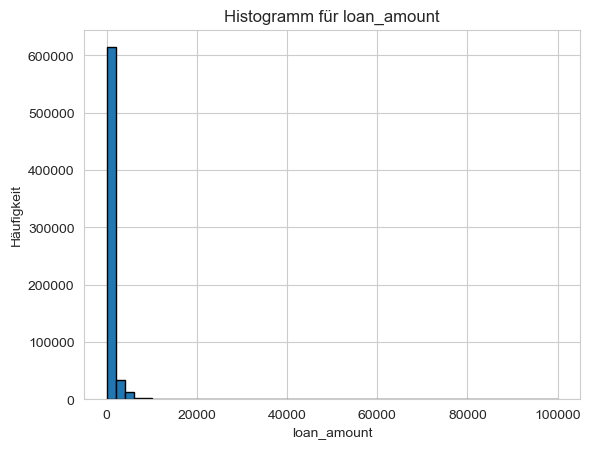

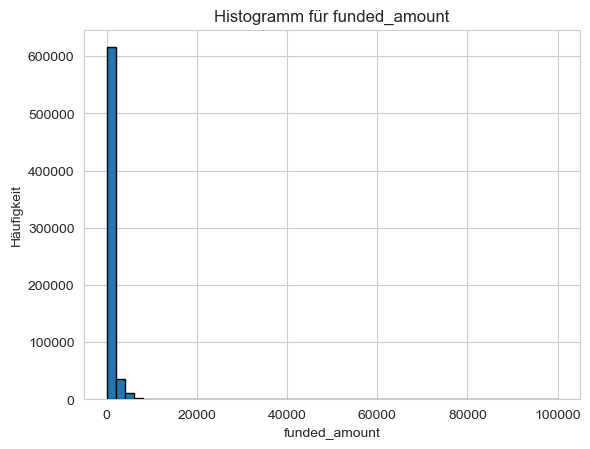

In [132]:
# Histogramm für "loan_amount"
plt.hist(df_gesamt['loan_amount'], bins=50, edgecolor='k')
plt.xlabel('loan_amount')
plt.ylabel('Häufigkeit')
plt.title('Histogramm für loan_amount')
plt.show()

# Histogramm für "funded_amount"
plt.hist(df_gesamt['funded_amount'], bins=50, edgecolor='k')
plt.xlabel('funded_amount')
plt.ylabel('Häufigkeit')
plt.title('Histogramm für funded_amount')
plt.show()

### Bivariate Analyse: loan_amount und funded_amount

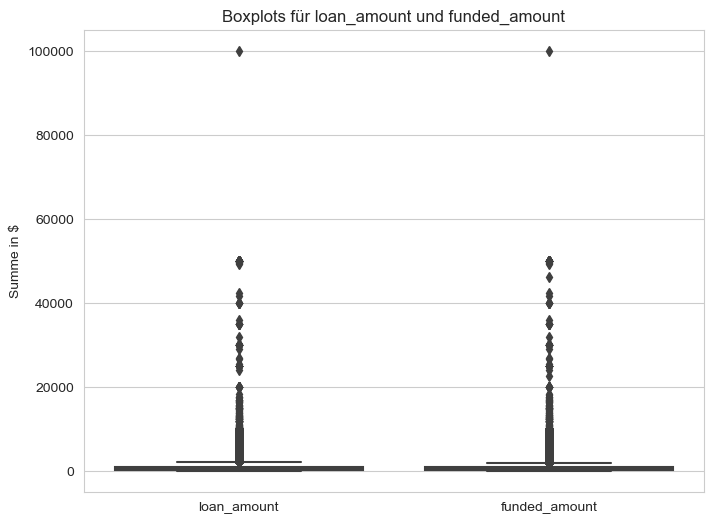

In [133]:
# Verwende Seaborn, um Boxplots in einem Diagramm darzustellen
plt.figure(figsize=(8, 6))  # Größe des Diagramms festlegen
sns.boxplot(data=df_gesamt[['loan_amount', 'funded_amount']])
plt.xlabel('')
plt.ylabel('Summe in $')
plt.title('Boxplots für loan_amount und funded_amount')
plt.show()

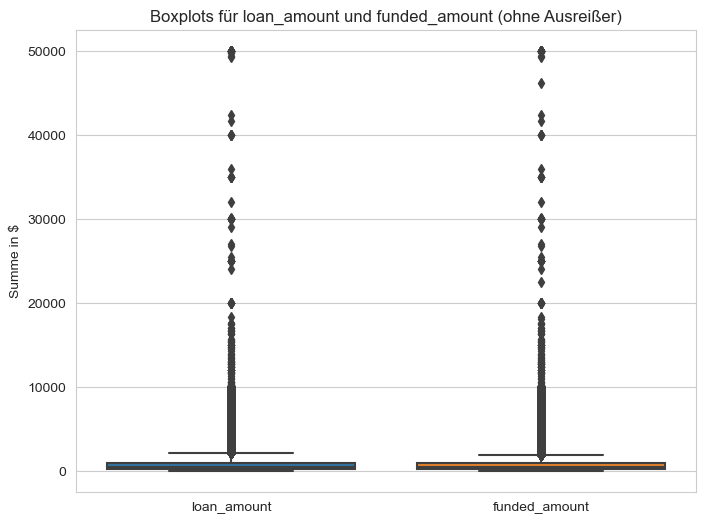

In [134]:
# Filtere die Daten, um Werte kleiner oder gleich 100.000 zu behalten
filtered_data = df_gesamt[(df_gesamt['loan_amount'] < 100000) & (
    df_gesamt['funded_amount'] < 100000)]

# Verwende Seaborn, um Boxplots in einem Diagramm darzustellen
plt.figure(figsize=(8, 6))  # Größe des Diagramms festlegen
sns.boxplot(data=filtered_data[['loan_amount', 'funded_amount']])
plt.xlabel('')
plt.ylabel('Summe in $')
plt.title('Boxplots für loan_amount und funded_amount (ohne Ausreißer)')
plt.show()

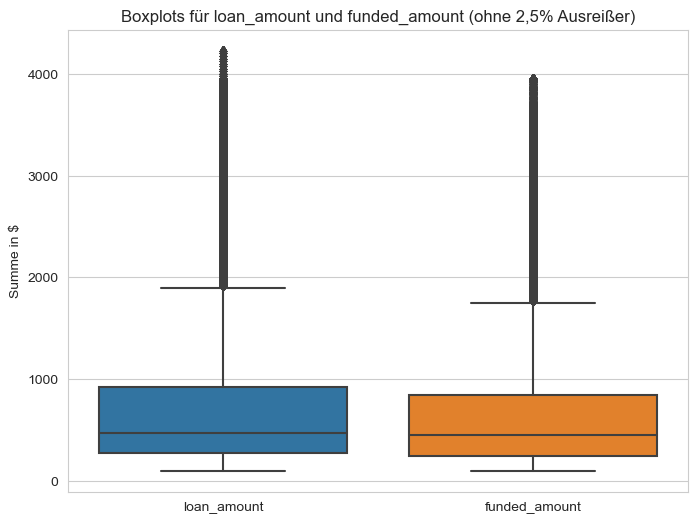

In [135]:
# Berechne die Schwellenwerte für die 2,5% - und 97,5% -Quantile
lower_quantile = df_gesamt[['loan_amount', 'funded_amount']].quantile(0.025)
upper_quantile = df_gesamt[['loan_amount', 'funded_amount']].quantile(0.975)

# Filtere die Daten, um nur die mittleren 95% zu behalten
filtered_data = df_gesamt[
    (df_gesamt['loan_amount'] >= lower_quantile['loan_amount']) &
    (df_gesamt['loan_amount'] <= upper_quantile['loan_amount']) &
    (df_gesamt['funded_amount'] >= lower_quantile['funded_amount']) &
    (df_gesamt['funded_amount'] <= upper_quantile['funded_amount'])
]

# Verwende Seaborn, um Boxplots in einem Diagramm darzustellen
plt.figure(figsize=(8, 6))  # Größe des Diagramms festlegen
sns.boxplot(data=filtered_data[['loan_amount', 'funded_amount']])
plt.xlabel('')
plt.ylabel('Summe in $')
plt.title('Boxplots für loan_amount und funded_amount (ohne 2,5% Ausreißer)')
plt.show()

Korrelationskoeffizient zwischen funded_amount und loan_amount: 0.9519948177975132


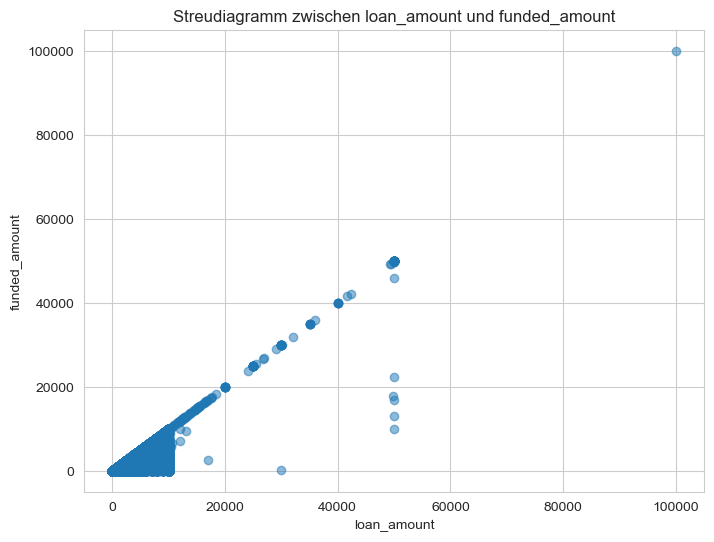

In [136]:
# Korrelationsanalyse zwischen "funded_amount" und "loan_amount"
correlation = df_gesamt['funded_amount'].corr(df_gesamt['loan_amount'])
print("Korrelationskoeffizient zwischen funded_amount und loan_amount:", correlation)

# Streudiagramm erstellen
plt.figure(figsize=(8, 6))
plt.scatter(df_gesamt['loan_amount'], df_gesamt['funded_amount'], alpha=0.5)
plt.xlabel('loan_amount')
plt.ylabel('funded_amount')
plt.title('Streudiagramm zwischen loan_amount und funded_amount')
plt.grid(True)
plt.show()

Die Punkte auf der Diagonalen, zeigen die Projekte an, die komplett finanziert (total erfolgreich) wurden.
Alle Punkte unterhalb dieser Diagonalen zeigen teilfinanzierte Projekte (teilweise erflgreich) und alle Werte auf der X-Achse(=0) zeigen gescheiterte Projekte.
Es ist erkennbar, dass bei höherem gewünschten Kredit die Finanzierung meist erfolgreich war. Die meisten gescheiterten Projekte befinden sich zwischen einem gewünschten Kredit von 0 und 10.000$.

Die Codes der Vorarbeit für den Piechart finden sich unter 10.1.1, 10.1.2 und 10.1.3

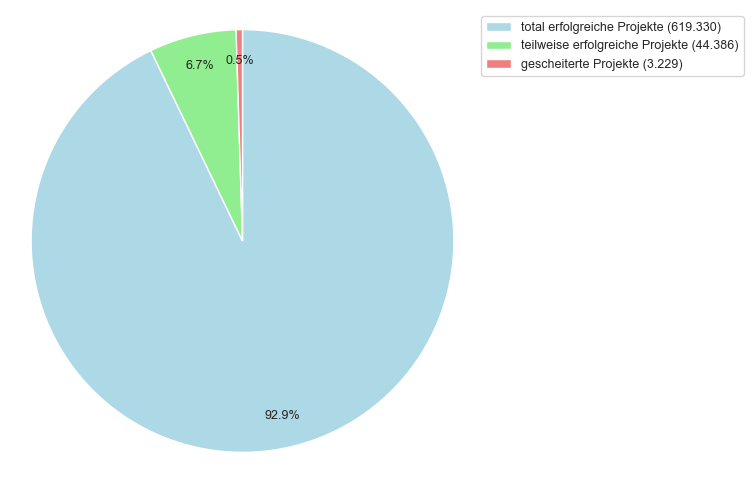

In [137]:
# Daten für den Pie-Chart
labels = [f'total erfolgreiche Projekte ({form_anzahl_total_erfolgreiche_projekte})',
          f'teilweise erfolgreiche Projekte ({form_anzahl_tw_erfolgreiche_projekte})',
          f'gescheiterte Projekte ({form_anzahl_gescheiterte_projekte})']

sizes = [anzahl_total_erfolgreiche_projekte,
         anzahl_tw_erfolgreiche_projekte, anzahl_gescheiterte_projekte]

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Erstelle den Pie-Chart im objektorientierten Stil mit Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(sizes, labels=None, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False,
       pctdistance=0.85, textprops={'fontsize': 9})

# Hinzufügen von Text in den Kuchenstücken
ax.axis('equal')

# Legende erstellen
legend_labels = labels
legend_colors = colors
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

# Anzeigen des Pie-Charts
plt.show()

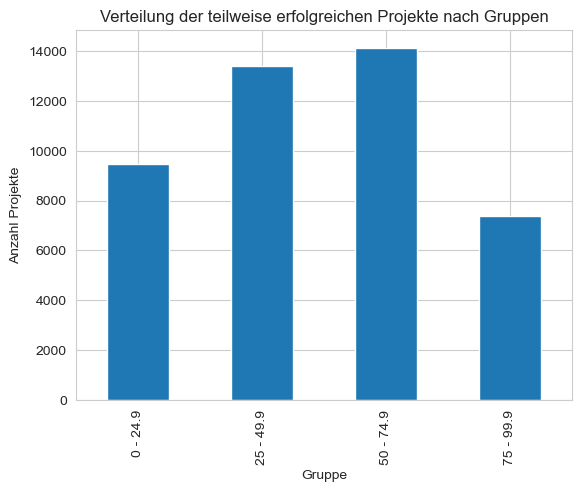

In [138]:
tw_erfolgreiche_projekte_copy = tw_erfolgreiche_projekte.copy()
tw_erfolgreiche_projekte_copy['percent'] = (
    (tw_erfolgreiche_projekte['funded_amount'] / tw_erfolgreiche_projekte['loan_amount']) * 100).round(1)

bins = [0, 25, 50, 75, 100]
labels = ['0 - 24.9', '25 - 49.9', '50 - 74.9', '75 - 99.9']

tw_erfolgreiche_projekte_copy['group'] = pd.cut(
    tw_erfolgreiche_projekte_copy['percent'], bins=bins, labels=labels)

verteilung_gruppen = tw_erfolgreiche_projekte_copy['group'].value_counts()

# Zähle die Projekte in jeder Gruppe
verteilung_gruppen = tw_erfolgreiche_projekte_copy['group'].value_counts()

# Sortiere die Gruppen nach deinen Kriterien
verteilung_gruppen = verteilung_gruppen.reindex(labels)

# Erstelle ein Balkendiagramm
verteilung_gruppen.plot(kind='bar')

# Beschriftung hinzufügen
plt.xlabel('Gruppe')
plt.ylabel('Anzahl Projekte')
plt.title('Verteilung der teilweise erfolgreichen Projekte nach Gruppen')

# Das Diagramm anzeigen
plt.show()

### Multivariate Analyse: Erfolgskategorien je Länder und Kreditanzahl

In [139]:
# Bedingungen für Erfolgsklassifikation
df_gesamt['Erfolg'] = 't'  # Standardmäßig als "total erfolgreich" markieren

# Bedingungen für teilweise erfolgreiche Projekte
tw_erfolgreiche_idx = (df_gesamt['loan_amount'] != df_gesamt['funded_amount']) & (
    df_gesamt['funded_amount'] > 0)
df_gesamt.loc[tw_erfolgreiche_idx, 'Erfolg'] = 'tw'

# Bedingungen für gescheiterte Projekte
gescheiterte_idx = (df_gesamt['loan_amount'] != df_gesamt['funded_amount']) & (
    df_gesamt['funded_amount'] == 0)
df_gesamt.loc[gescheiterte_idx, 'Erfolg'] = 'g'

In [140]:
# Zähle die Häufigkeit der Länder in der Kategorie "total erfolgreich" ("t")
haeufigkeit_t = df_gesamt[df_gesamt['Erfolg'] == 't']['country'].value_counts()

# Zähle die Häufigkeit der Länder in der Kategorie "teilweise erfolgreich" ("tw")
haeufigkeit_tw = df_gesamt[df_gesamt['Erfolg']
                           == 'tw']['country'].value_counts()

# Zähle die Häufigkeit der Länder in der Kategorie "gescheitert" ("g")
haeufigkeit_g = df_gesamt[df_gesamt['Erfolg'] == 'g']['country'].value_counts()

# Anzeigen der häufigsten Länder in jeder Kategorie
print("Am häufigsten in 'total erfolgreich' (t):")
print(haeufigkeit_t.head(15))

print("\nAm häufigsten in 'teilweise erfolgreich' (tw):")
print(haeufigkeit_tw.head(15))

print("\nAm häufigsten in 'gescheitert' (g):")
print(haeufigkeit_g.head(15))

Am häufigsten in 'total erfolgreich' (t):
Philippines    157533
Kenya           69846
Cambodia        33437
El Salvador     32260
Pakistan        24918
Peru            21579
Uganda          18094
Tajikistan      17475
Colombia        17261
Ecuador         12870
Paraguay        11518
India           10868
Nicaragua       10411
Vietnam          9878
Nigeria          9132
Name: country, dtype: int64

Am häufigsten in 'teilweise erfolgreich' (tw):
El Salvador      6863
Kenya            4748
Colombia         3801
Philippines      2718
Uganda           2186
Tajikistan       1961
Armenia          1800
Pakistan         1690
United States    1332
Nicaragua        1247
Cambodia         1193
Bolivia          1179
Palestine         988
Vietnam           902
Nigeria           872
Name: country, dtype: int64

Am häufigsten in 'gescheitert' (g):
United States    817
Kenya            518
Pakistan         245
El Salvador      196
Cambodia         179
Colombia         154
Nigeria          126
Uganda    

In [141]:
# Gruppiere den DataFrame nach 'country' und 'Erfolg' und zähle die Häufigkeit
gruppiert = df_gesamt.groupby(
    ['country', 'Erfolg']).size().unstack(fill_value=0)

# Ermittele die 15 häufigsten Länder in jeder Kategorie
haeufigste_t = gruppiert['t'].nlargest(15)
haeufigste_tw = gruppiert['tw'].nlargest(15)
haeufigste_g = gruppiert['g'].nlargest(15)

# Erstelle ein leeres DataFrame für die Ergebnisse
countries_t_tw_g = pd.DataFrame()

# Füge die Länder in die erste Spalte ein (alle Länder, die in einer der Kategorien vorkommen)
countries_t_tw_g['country'] = pd.concat(
    [haeufigste_t, haeufigste_tw, haeufigste_g]).index.unique()

# Setze den Index des Ergebnis DataFrames auf die 'country'-Spalte
countries_t_tw_g.set_index('country', inplace=True)

# Fülle die 't', 'tw' und 'g' Spalten mit den entsprechenden Werten
countries_t_tw_g['t'] = gruppiert.loc[countries_t_tw_g.index, 't']
countries_t_tw_g['tw'] = gruppiert.loc[countries_t_tw_g.index, 'tw']
countries_t_tw_g['g'] = gruppiert.loc[countries_t_tw_g.index, 'g']

# Fehlende Werte (NaN) mit 0 auffüllen
countries_t_tw_g.fillna(0, inplace=True)

# Zeige den Ergebnis DataFrame an
countries_t_tw_g

t    tw    g
country                         
Philippines    157533  2718  110
Kenya           69846  4748  518
Cambodia        33437  1193  179
El Salvador     32260  6863  196
Pakistan        24918  1690  245
Peru            21579   574   12
Uganda          18094  2186  110
Tajikistan      17475  1961   82
Colombia        17261  3801  154
Ecuador         12870   608    8
Paraguay        11518   318    5
India           10868   314   12
Nicaragua       10411  1247   18
Vietnam          9878   902   61
Nigeria          9132   872  126
Armenia          6806  1800   22
United States    3779  1332  817
Bolivia          7530  1179   13
Palestine        7164   988    0
Togo             5612    59   71
Sierra Leone     4937   297   62
Liberia          3512    36   52
Mozambique       3102   318   47

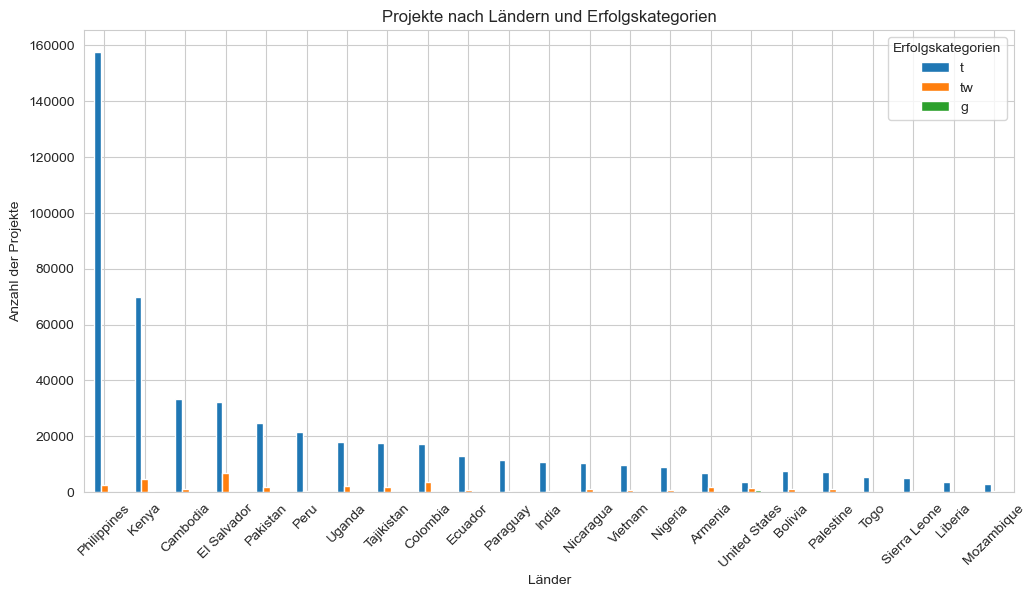

In [142]:
# Erstelle eine Figur und Achsenobjekte
fig, ax = plt.subplots(figsize=(12, 6))

# Zeichne das Balkendiagramm auf den Achsen
countries_t_tw_g.plot(kind='bar', ax=ax)

# Konfiguriere das Diagramm
ax.set_title('Projekte nach Ländern und Erfolgskategorien')
ax.set_xlabel('Länder')
ax.set_ylabel('Anzahl der Projekte')

# Festlegen der x-Achsenbeschriftungen und Positionen
x_pos = range(len(countries_t_tw_g.index))
ax.set_xticks(x_pos)
ax.set_xticklabels(countries_t_tw_g.index, rotation=45)

ax.legend(title='Erfolgskategorien')

# Zeige das Diagramm an
plt.show()

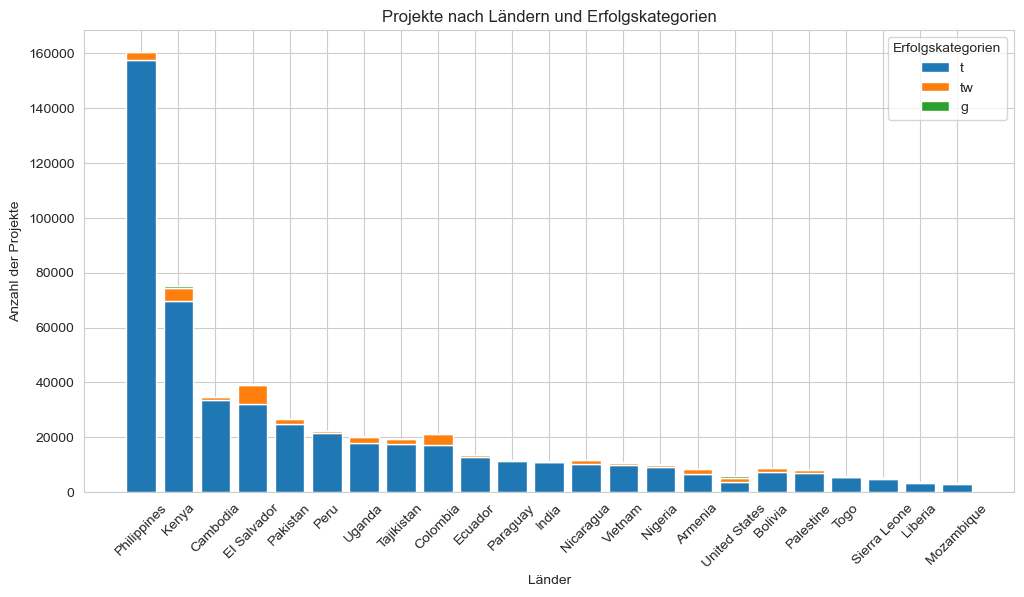

In [143]:
# Erstelle eine Figur und Achsenobjekte
fig, ax = plt.subplots(figsize=(12, 6))

# Zeichne das Balkendiagramm auf den Achsen
ax.bar(countries_t_tw_g.index, countries_t_tw_g['t'], label='t')
ax.bar(countries_t_tw_g.index,
       countries_t_tw_g['tw'], label='tw', bottom=countries_t_tw_g['t'])
ax.bar(countries_t_tw_g.index,
       countries_t_tw_g['g'], label='g', bottom=countries_t_tw_g['t'] + countries_t_tw_g['tw'])

# Konfiguriere das Diagramm
ax.set_title('Projekte nach Ländern und Erfolgskategorien')
ax.set_xlabel('Länder')
ax.set_ylabel('Anzahl der Projekte')

# Festlegen der x-Achsenbeschriftungen und Positionen
x_pos = range(len(countries_t_tw_g.index))
ax.set_xticks(x_pos)
ax.set_xticklabels(countries_t_tw_g.index, rotation=45)

ax.legend(title='Erfolgskategorien')

# Zeige das Diagramm an
plt.show()

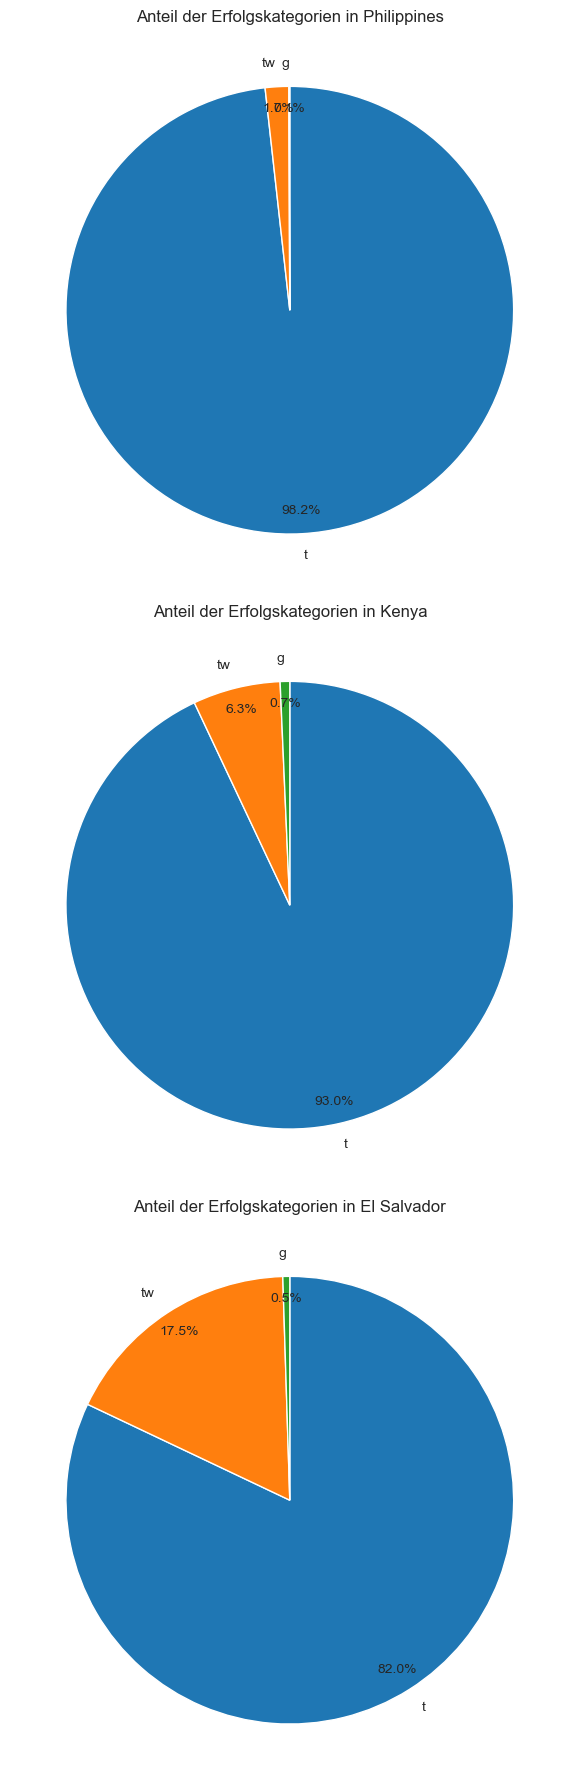

In [144]:
# Ermittele die 3 Länder mit den insgesamt meisten Krediten
top_3_laender = countries_t_tw_g[['t', 'tw', 'g']].sum(
    axis=1).nlargest(3).index

# Erstelle Subplots für die Pieplots (untereinander angeordnet)
fig, axs = plt.subplots(3, 1, figsize=(8, 18))

pctdistance = 0.9  # Wert, um die Labels weiter entfernt zu platzieren

# Iteriere über die Top 3 Länder und erstelle für jedes Land einen Pieplot
for i, land in enumerate(top_3_laender):
    land_row = countries_t_tw_g.loc[land]
    axs[i].pie(land_row, labels=land_row.index, autopct='%1.1f%%',
               startangle=90, counterclock=False, pctdistance=pctdistance)
    axs[i].set_title(f'Anteil der Erfolgskategorien in {land}')

# Passe den Layout-Abstand an
plt.tight_layout()

# Zeige die Pieplots an
plt.show()

### Multivariate Analyse: Erfolgskategorien je Kreditsumme/Durchschnittskredite

In [145]:
# Erstelle eine neue Spalte "Erfolgskategorie" basierend auf der Spalte "Erfolg"
df_gesamt['Erfolgskategorie'] = df_gesamt['Erfolg'].map(
    {'t': 'Total Erfolgreiche', 'tw': 'Teilweise Erfolgreiche', 'g': 'Gescheiterte'})

# Berechne die Gesamtkreditsumme für jede Erfolgskategorie
gesamtkreditsumme_nach_kategorie = df_gesamt.groupby('Erfolgskategorie')[
    'loan_amount'].sum()
gesamtkreditsumme_nach_kategorie = gesamtkreditsumme_nach_kategorie.sort_values(
    ascending=False)

# Berechne den Durchschnittskredit für jede Erfolgskategorie
durchschnittskredit_nach_kategorie = df_gesamt.groupby('Erfolgskategorie')[
    'loan_amount'].mean()
durchschnittskredit_nach_kategorie = durchschnittskredit_nach_kategorie.sort_values(
    ascending=True)

print("Gesamtkreditsumme nach Erfolgskategorie:")
print(gesamtkreditsumme_nach_kategorie)

print("\nDurchschnittskredit nach Erfolgskategorie:")
print(durchschnittskredit_nach_kategorie)

Gesamtkreditsumme nach Erfolgskategorie:
Erfolgskategorie
Total Erfolgreiche        493558400
Teilweise Erfolgreiche     62159725
Gescheiterte                4679950
Name: loan_amount, dtype: int32

Durchschnittskredit nach Erfolgskategorie:
Erfolgskategorie
Total Erfolgreiche         796.923127
Teilweise Erfolgreiche    1400.435385
Gescheiterte              1449.349644
Name: loan_amount, dtype: float64


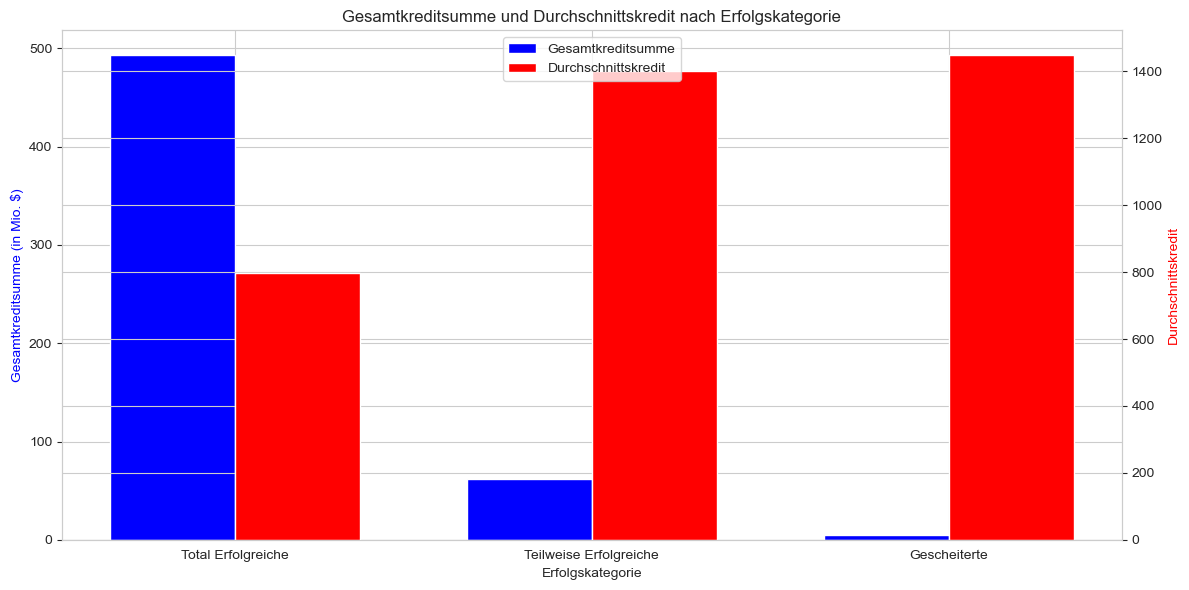

In [146]:
# Daten vorbereiten
erfolgskategorien = gesamtkreditsumme_nach_kategorie.index
gesamtkreditsumme = gesamtkreditsumme_nach_kategorie.values / 1e6  # In Millionen umrechnen
durchschnittskredit = durchschnittskredit_nach_kategorie.values

# Erstellen einer Figure-Instanz
fig, ax1 = plt.subplots(figsize=(12, 6))

# Balkenbreite
bar_width = 0.35
index = np.arange(len(erfolgskategorien))

# Erstellen des Balkendiagramms für die Gesamtkreditsumme auf der ersten y-Achse (Blau)
bar1 = ax1.bar(index, gesamtkreditsumme, bar_width,
               label='Gesamtkreditsumme', color='b')
ax1.set_xlabel('Erfolgskategorie')
ax1.set_ylabel('Gesamtkreditsumme (in Mio. $)', color='b')
ax1.set_xticks(index)
ax1.set_xticklabels(erfolgskategorien)

# Erstellen einer zweiten y-Achse (rechts)
ax2 = ax1.twinx()

# Erstellen des Balkendiagramms für den Durchschnittskredit auf der zweiten y-Achse (Rot)
bar2 = ax2.bar(index + bar_width, durchschnittskredit,
               bar_width, label='Durchschnittskredit', color='r')
ax2.set_ylabel('Durchschnittskredit', color='r')

# Verschieben der x-Positionen der Textlabels in die Mitte zwischen den Balken
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(erfolgskategorien)

# Kombinieren von Legenden von beiden y-Achsen
lines = [bar1, bar2]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper center')

plt.title('Gesamtkreditsumme und Durchschnittskredit nach Erfolgskategorie')
plt.tight_layout()
plt.show()

### Multivariate Analyse: Erfolgskategorien je Länder und Kreditsumme/Durchschnittskredite

**Top 5 Länder je Erfolgskategorie nach Kreditsumme (des Landes)**

In [147]:
# Gruppieren nach Erfolgskategorie und Land und die Summe der Kredite berechnen
grouped = df_gesamt.groupby(['Erfolgskategorie', 'country'])[
    'loan_amount'].sum().reset_index()

# Die Top 5 Länder in jeder Erfolgskategorie auswählen
top_5_countries_by_success_creditsum = grouped.groupby('Erfolgskategorie').apply(
    lambda x: x.nlargest(5, 'loan_amount')).reset_index(drop=True)

# Ergebnisse anzeigen
top_5_countries_by_success_creditsum

Erfolgskategorie        country  loan_amount
0             Gescheiterte  United States      3048225
1             Gescheiterte          Kenya       246300
2             Gescheiterte       Cambodia       153250
3             Gescheiterte    El Salvador       147400
4             Gescheiterte       Pakistan        95675
5   Teilweise Erfolgreiche  United States      7171625
6   Teilweise Erfolgreiche    El Salvador      6255350
7   Teilweise Erfolgreiche          Kenya      3753925
8   Teilweise Erfolgreiche       Colombia      3729850
9   Teilweise Erfolgreiche        Armenia      3144725
10      Total Erfolgreiche    Philippines     53547075
11      Total Erfolgreiche          Kenya     30182950
12      Total Erfolgreiche           Peru     29923350
13      Total Erfolgreiche       Paraguay     29016650
14      Total Erfolgreiche  United States     20538225

**Pivot Top 5 Länder je Erfolgskategorie nach Kreditsumme (des Landes)**

In [148]:
# Pivotieren der Daten, um die gewünschte Tabellenstruktur zu erhalten und leere Zellen mit NaN füllen
pivot_table1 = top_5_countries_by_success_creditsum.pivot(
    index='country', columns='Erfolgskategorie', values='loan_amount').reset_index().fillna('NaN')

# Umbenennen der Spalten
pivot_table1.columns = ['Country', 'Gescheiterte',
                        'Teilweise Erfolgreiche', 'Total Erfolgreiche']

# Ergebnisse anzeigen
pivot_table1

Country Gescheiterte Teilweise Erfolgreiche Total Erfolgreiche
0        Armenia          NaN              3144725.0                NaN
1       Cambodia     153250.0                    NaN                NaN
2       Colombia          NaN              3729850.0                NaN
3    El Salvador     147400.0              6255350.0                NaN
4          Kenya     246300.0              3753925.0         30182950.0
5       Pakistan      95675.0                    NaN                NaN
6       Paraguay          NaN                    NaN         29016650.0
7           Peru          NaN                    NaN         29923350.0
8    Philippines          NaN                    NaN         53547075.0
9  United States    3048225.0              7171625.0         20538225.0

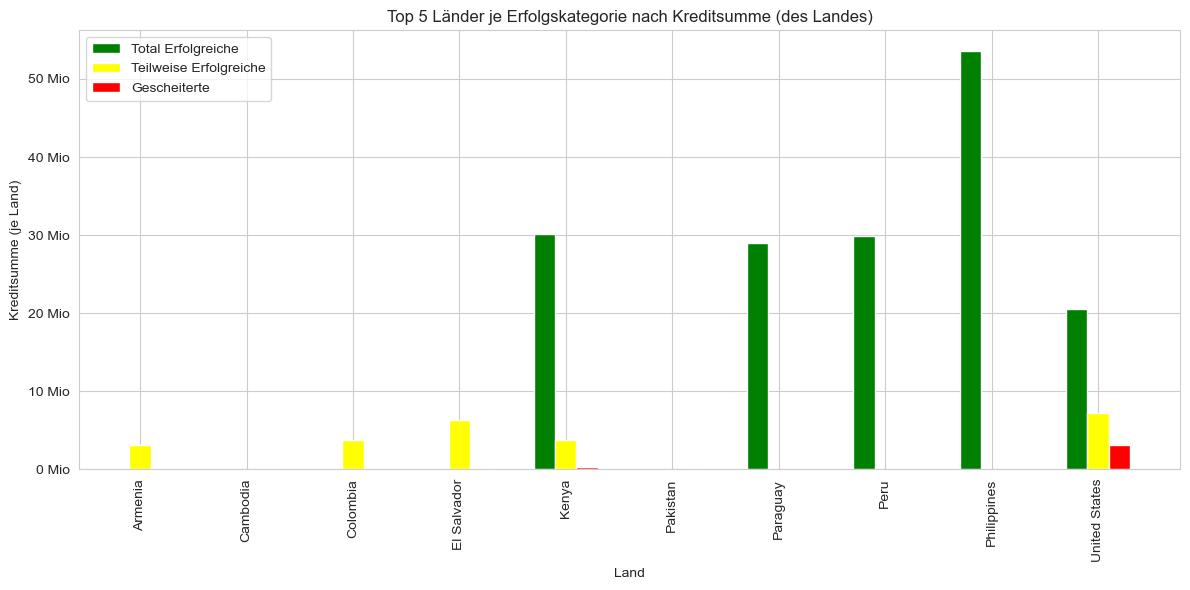

In [149]:
countries = pivot_table1['Country'].astype(str)
total_successful = pivot_table1['Total Erfolgreiche'].astype(float)
partial_successful = pivot_table1['Teilweise Erfolgreiche'].astype(float)
failed = pivot_table1['Gescheiterte'].astype(float)

# Funktion zur Formatierung der y-Achse im Millionenformat
def millions(x, pos):
    'Die Funktion formatiert die Werte in Millionen'
    return f'{x/1e6:.0f} Mio'


# Anzahl der Länder
num_countries = len(countries)

# Breite der Balken
bar_width = 0.2

# Positionen der Balken auf der x-Achse
index = np.arange(num_countries)

# Erstellen der Figure und Achsenobjekte
fig, ax = plt.subplots(figsize=(12, 6))

# Erstellen des gruppierten Balkendiagramms
ax.bar(index, total_successful, bar_width,
       label='Total Erfolgreiche', color='green')
ax.bar(index + bar_width, partial_successful, bar_width,
       label='Teilweise Erfolgreiche', color='yellow')
ax.bar(index + 2*bar_width, failed, bar_width,
       label='Gescheiterte', color='red')

# Beschriftung der x-Achse
ax.set_xlabel('Land')
ax.set_ylabel('Kreditsumme (je Land)')
ax.set_title('Top 5 Länder je Erfolgskategorie nach Kreditsumme (des Landes)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(countries, rotation=90)

# Legende hinzufügen und Position festlegen (links oben)
ax.legend(loc='upper left')

# Formatierung der y-Achse im Millionenformat
ax.yaxis.set_major_formatter(millions)

# Anzeigen des Diagramms
plt.tight_layout()
plt.show()

**Top 5 Länder je Erfolgskategorie nach Durchschnittskredit (des Landes)**

In [150]:
# Gruppieren nach Erfolgskategorie und Land und den Durchschnittskredit berechnen
grouped = df_gesamt.groupby(['Erfolgskategorie', 'country'])[
    'loan_amount'].mean().reset_index()

# Runden auf zwei Dezimalstellen
grouped['loan_amount'] = grouped['loan_amount'].round(2)

# Die Top 5 Länder in jeder Erfolgskategorie auswählen
top_5_countries_by_success_creditavg = grouped.groupby('Erfolgskategorie').apply(
    lambda x: x.nlargest(5, 'loan_amount')).reset_index(drop=True)

# Ergebnisse anzeigen
top_5_countries_by_success_creditavg

Erfolgskategorie                               country  loan_amount
0             Gescheiterte                        Virgin Islands      5000.00
1             Gescheiterte                                Rwanda      4516.25
2             Gescheiterte                         United States      3731.00
3             Gescheiterte                                  Mali      3475.00
4             Gescheiterte                           Puerto Rico      3300.00
5   Teilweise Erfolgreiche                           Puerto Rico      5490.00
6   Teilweise Erfolgreiche                    Dominican Republic      5386.96
7   Teilweise Erfolgreiche                         United States      5384.10
8   Teilweise Erfolgreiche                                  Guam      4300.00
9   Teilweise Erfolgreiche  The Democratic Republic of the Congo      4286.51
10      Total Erfolgreiche                         Cote D'Ivoire     50000.00
11      Total Erfolgreiche                            Mauritania     15000.00
12      Total Erfolgreiche                                Bhutan     10000.00
13      Total Erfolgreiche                                 Chile      8080.56
14      Total Erfolgreiche                           Afghanistan      7000.00

**Pivot Top 5 Länder je Erfolgskategorie nach Durchschnittskredit (des Landes)**

In [151]:
# Pivotieren der Daten, um die gewünschte Tabellenstruktur zu erhalten und leere Zellen mit NaN füllen
pivot_table2 = top_5_countries_by_success_creditavg.pivot(
    index='country', columns='Erfolgskategorie', values='loan_amount').reset_index().fillna('NaN')

# Umbenennen der Spalten
pivot_table2.columns = ['Country','Gescheiterte',
                        'Teilweise Erfolgreiche', 'Total Erfolgreiche']

# Ergebnisse anzeigen
pivot_table2

Country Gescheiterte Teilweise Erfolgreiche  \
0                            Afghanistan          NaN                    NaN   
1                                 Bhutan          NaN                    NaN   
2                                  Chile          NaN                    NaN   
3                          Cote D'Ivoire          NaN                    NaN   
4                     Dominican Republic          NaN                5386.96   
5                                   Guam          NaN                 4300.0   
6                                   Mali       3475.0                    NaN   
7                             Mauritania          NaN                    NaN   
8                            Puerto Rico       3300.0                 5490.0   
9                                 Rwanda      4516.25                    NaN   
10  The Democratic Republic of the Congo          NaN                4286.51   
11                         United States       3731.0                 5384.1   
12                        Virgin Islands       5000.0                    NaN   

   Total Erfolgreiche  
0              7000.0  
1             10000.0  
2             8080.56  
3             50000.0  
4                 NaN  
5                 NaN  
6                 NaN  
7             15000.0  
8                 NaN  
9                 NaN  
10                NaN  
11                NaN  
12                NaN

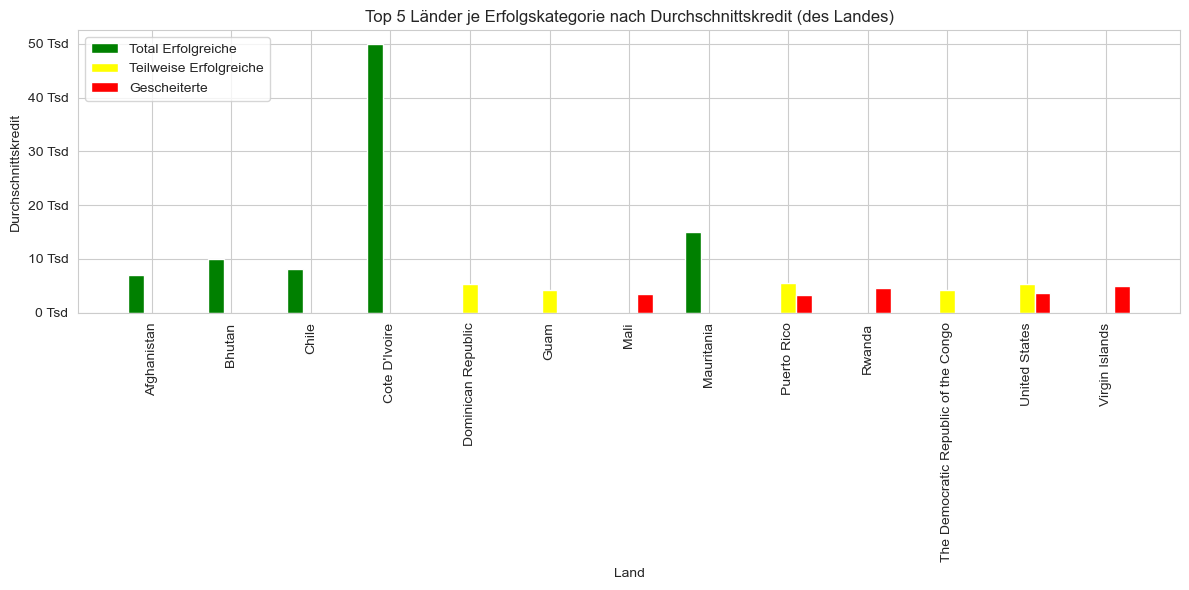

In [152]:
countries = pivot_table2['Country'].astype(str)
total_successful = pivot_table2['Total Erfolgreiche'].astype(float)
partial_successful = pivot_table2['Teilweise Erfolgreiche'].astype(float)
failed = pivot_table2['Gescheiterte'].astype(float)

# Funktion zur Formatierung der y-Achse im Tausenderformat
def thousands(x, pos):
    'Die Funktion formatiert die Werte in Tausend'
    return f'{x/1e3:.0f} Tsd'


# Anzahl der Länder
num_countries = len(countries)

# Breite der Balken
bar_width = 0.2

# Positionen der Balken auf der x-Achse
index = np.arange(num_countries)

# Erstellen der Figure und Achsenobjekte
fig, ax = plt.subplots(figsize=(12, 6))

# Erstellen des gruppierten Balkendiagramms
ax.bar(index, total_successful, bar_width,
       label='Total Erfolgreiche', color='green')
ax.bar(index + bar_width, partial_successful, bar_width,
       label='Teilweise Erfolgreiche', color='yellow')
ax.bar(index + 2*bar_width, failed, bar_width,
       label='Gescheiterte', color='red')

# Beschriftung der x-Achse
ax.set_xlabel('Land')
ax.set_ylabel('Durchschnittskredit')
ax.set_title(
    'Top 5 Länder je Erfolgskategorie nach Durchschnittskredit (des Landes)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(countries, rotation=90)

# Legende hinzufügen und Position festlegen (links oben)
ax.legend(loc='upper left')

# Formatierung der y-Achse im Tausenderformat
ax.yaxis.set_major_formatter(thousands)

# Anzeigen des Diagramms
plt.tight_layout()
plt.show()

### Multivariate Analyse: Wechselwirkungen zwischen Länder, Erfolgskategorien und Kreditsummen

C:\Users\alfa\AppData\Local\Temp\ipykernel_3564\1372405129.py:11: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



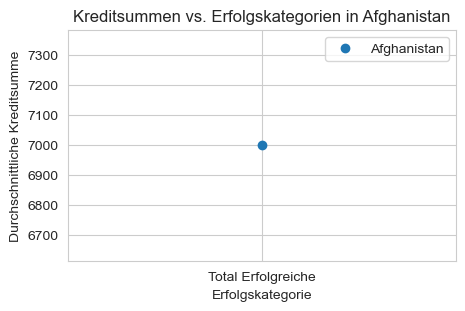

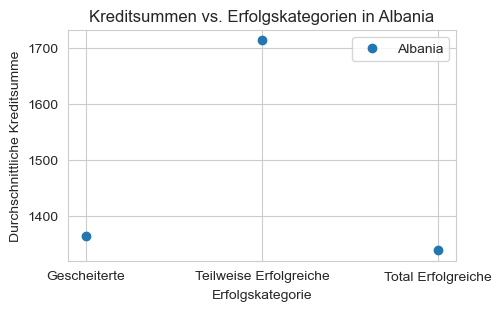

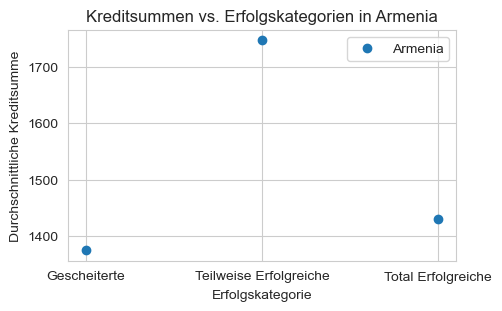

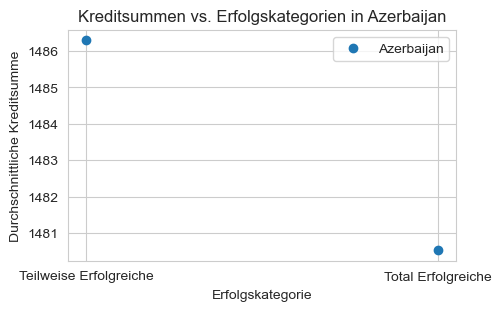

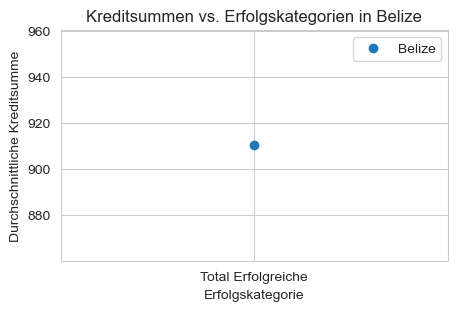

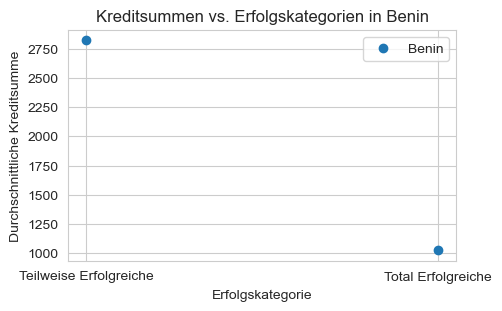

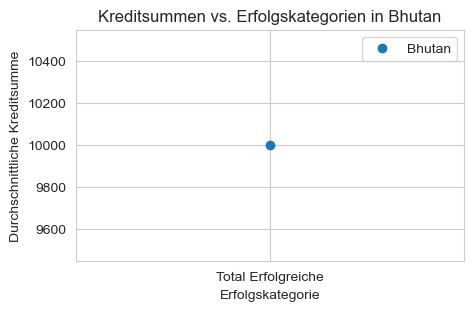

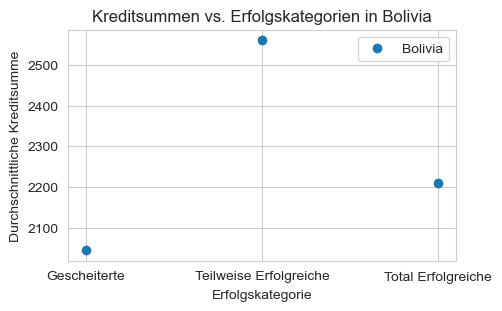

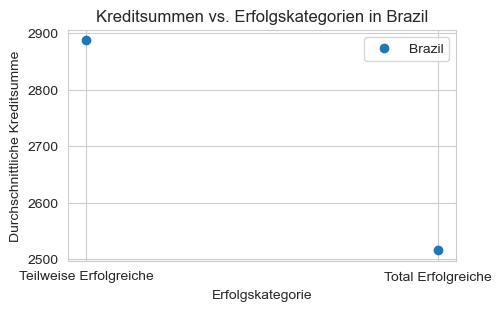

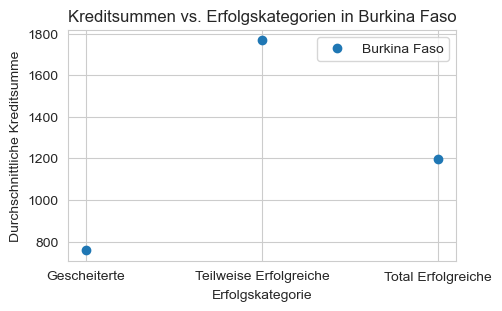

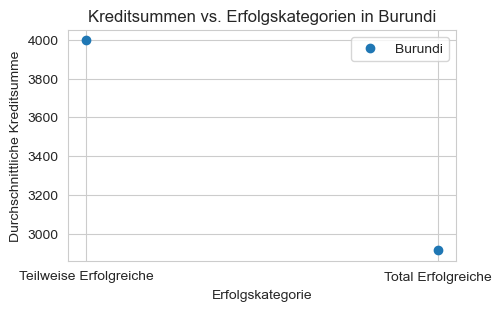

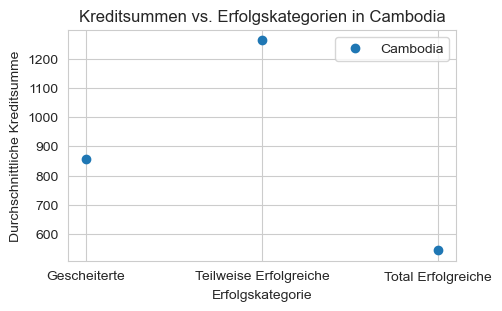

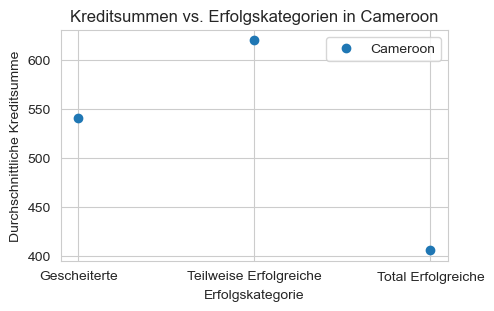

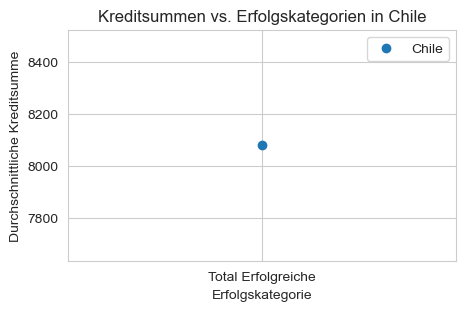

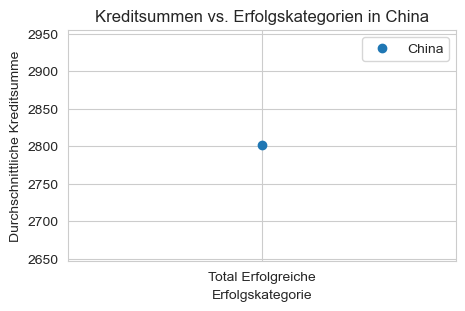

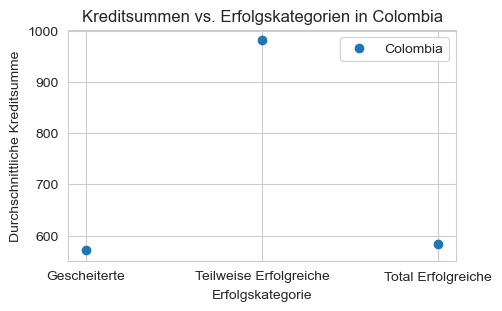

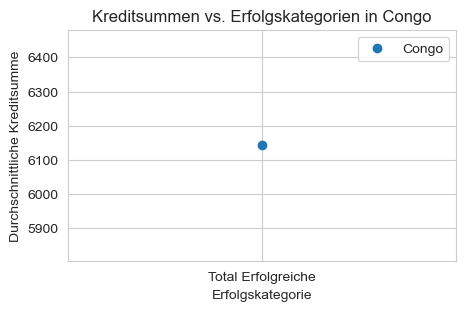

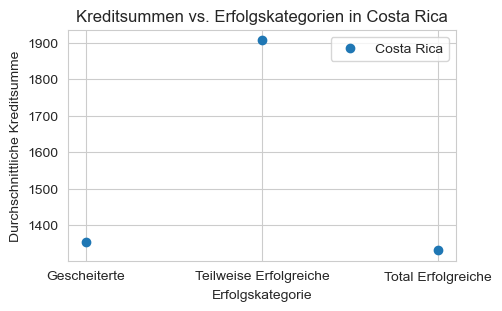

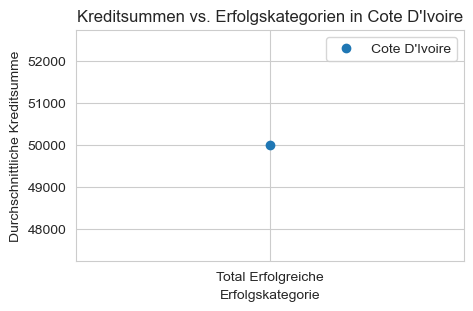

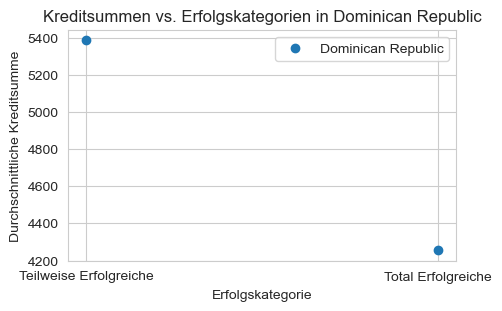

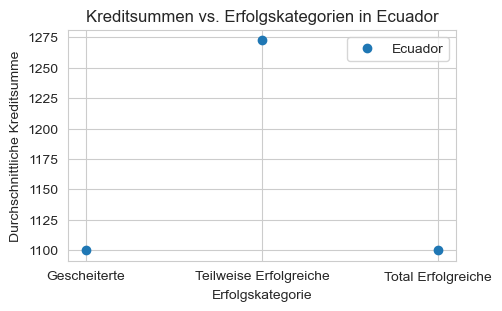

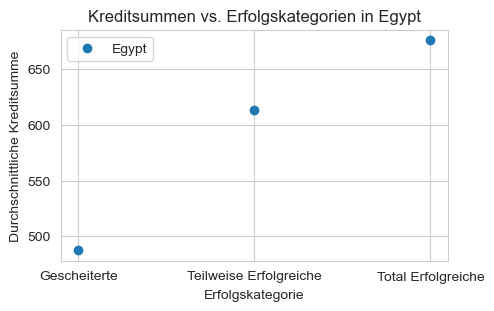

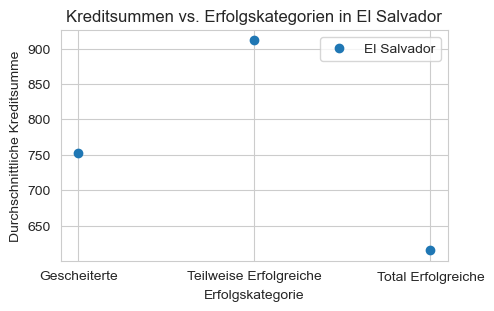

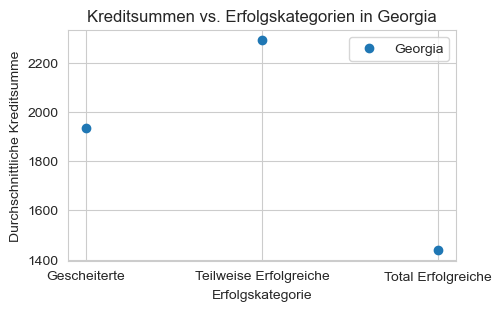

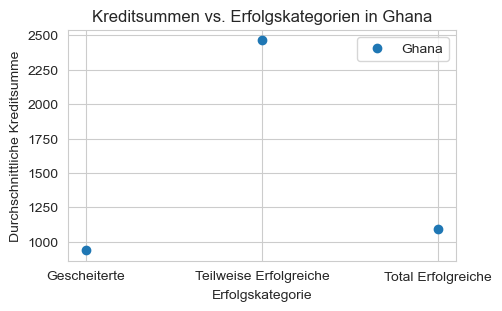

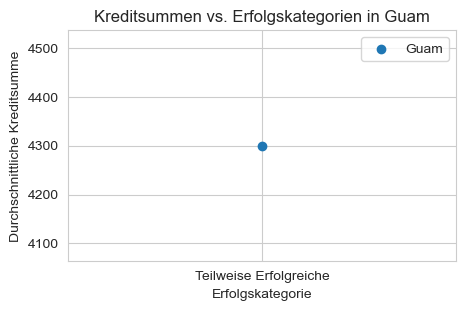

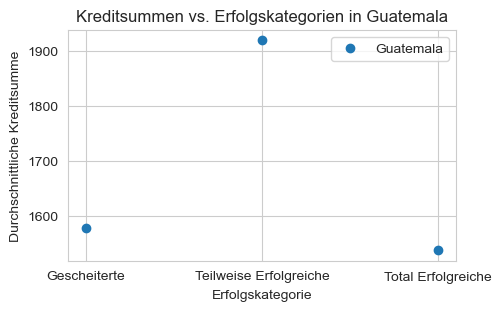

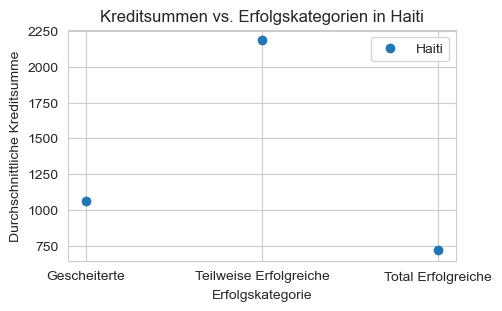

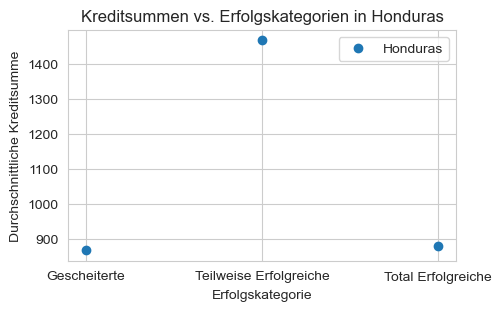

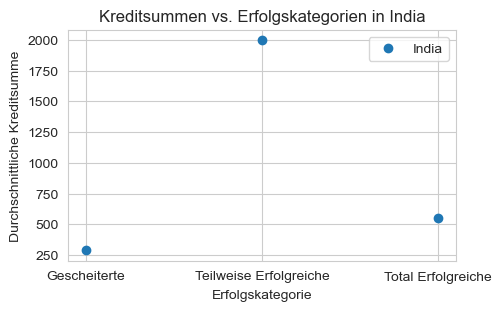

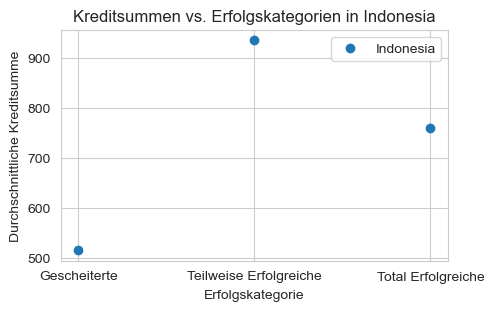

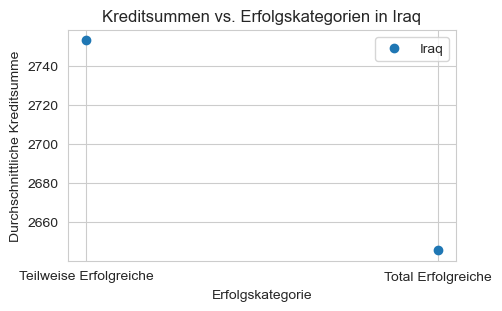

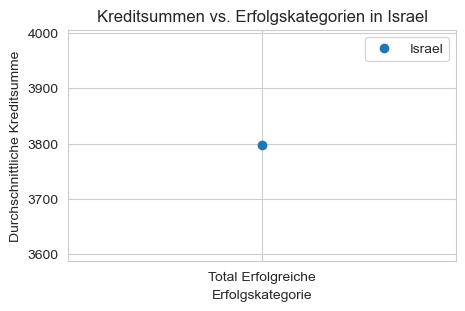

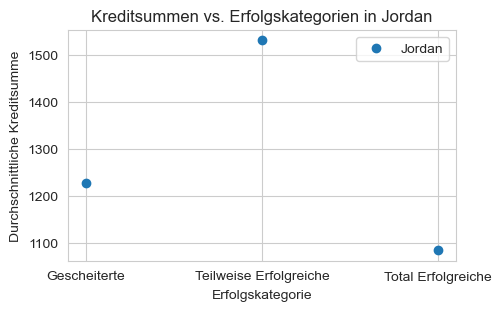

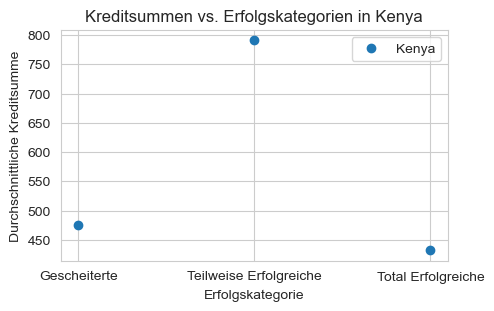

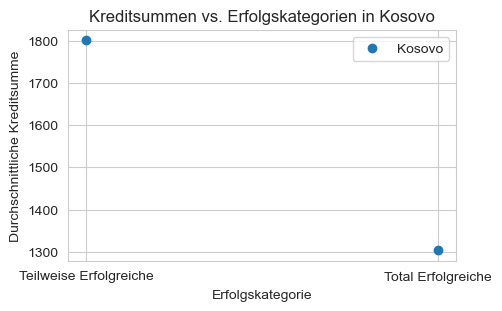

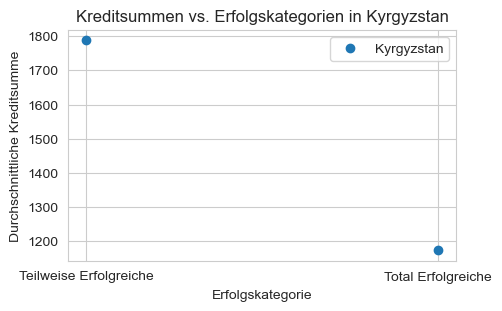

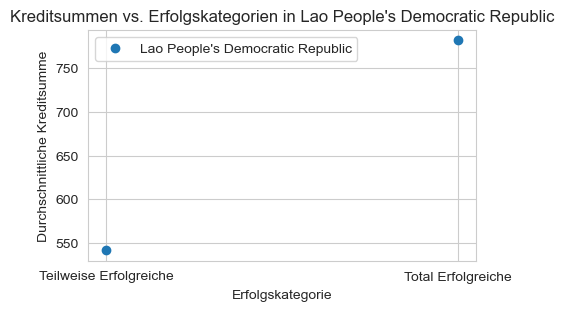

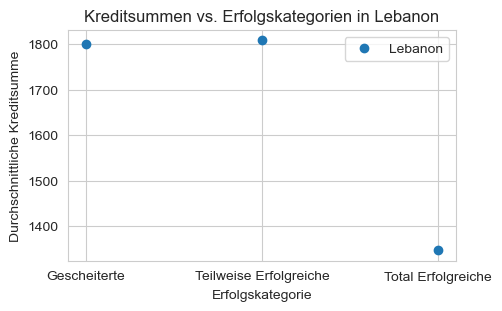

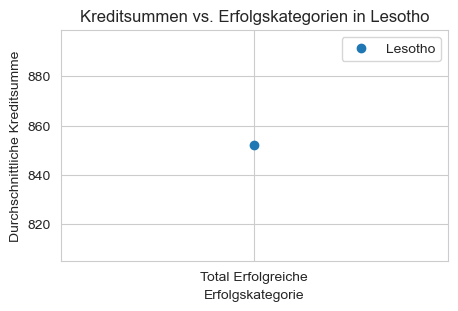

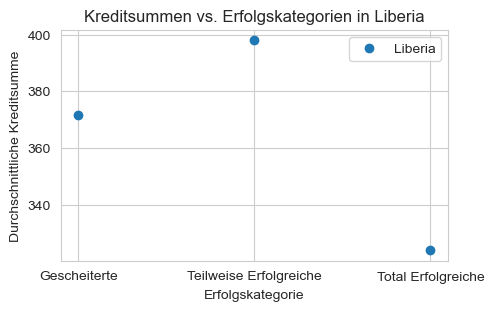

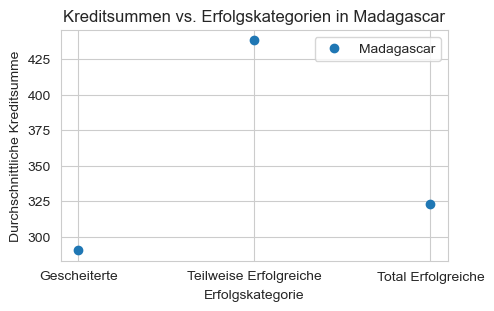

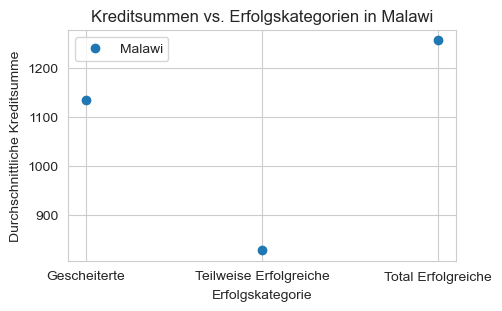

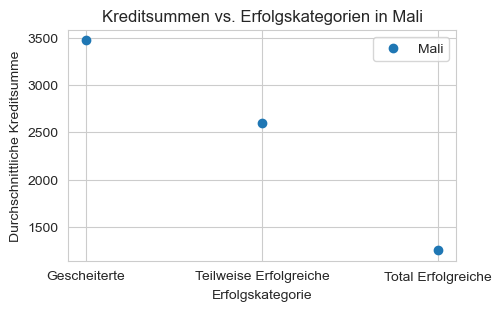

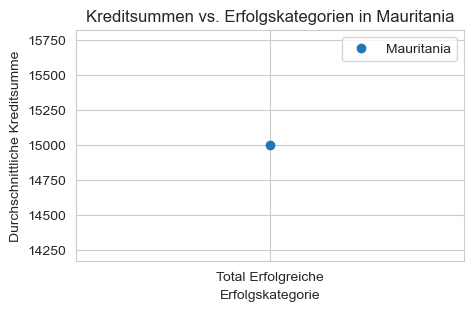

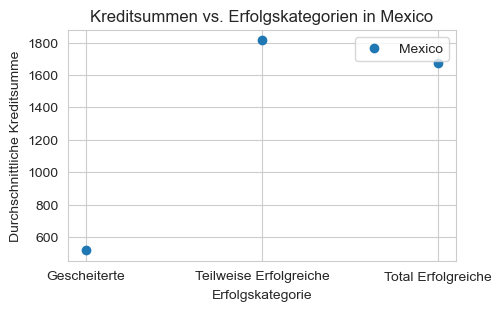

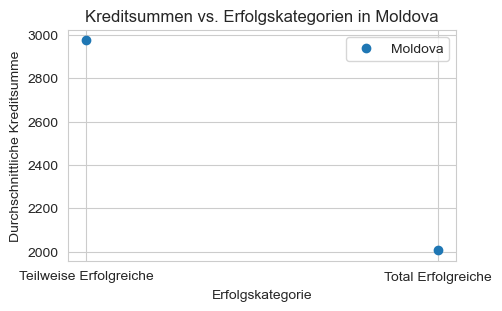

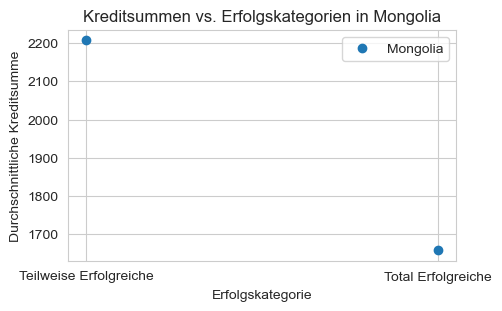

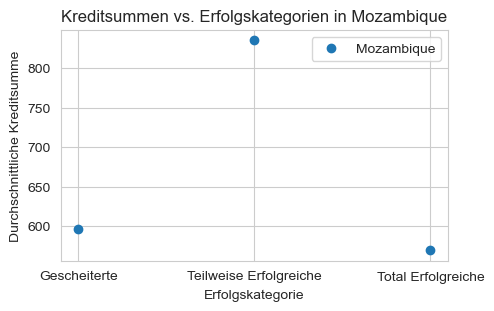

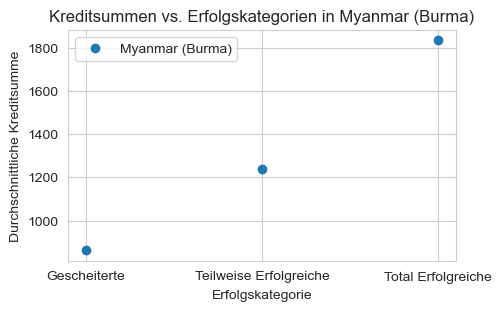

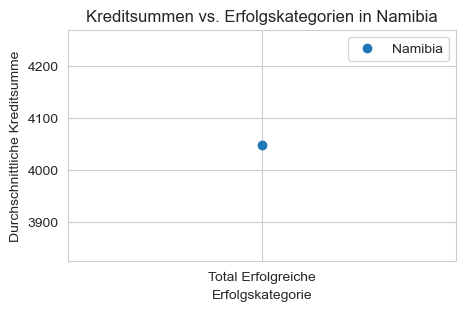

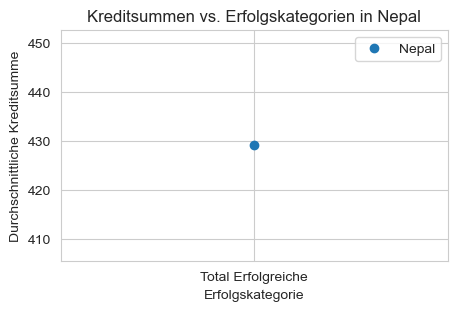

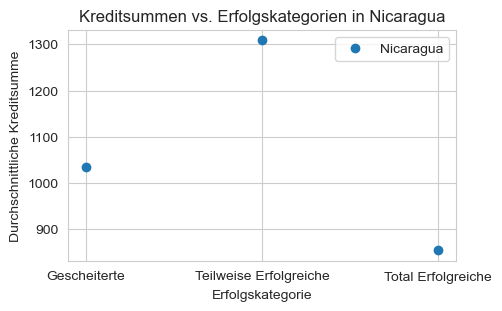

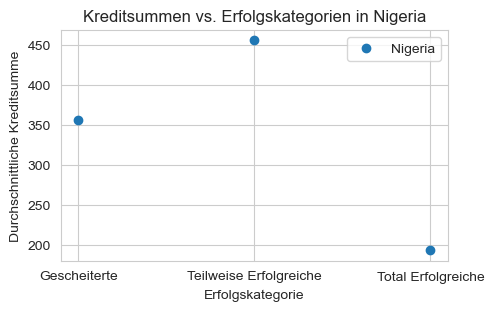

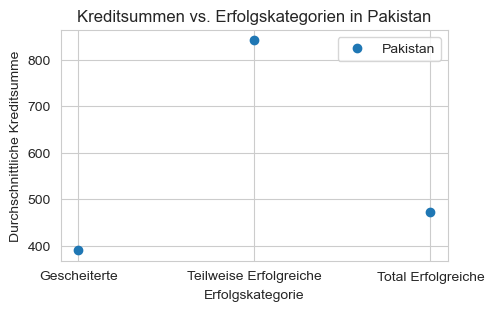

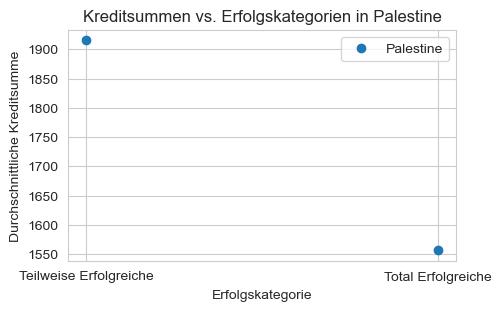

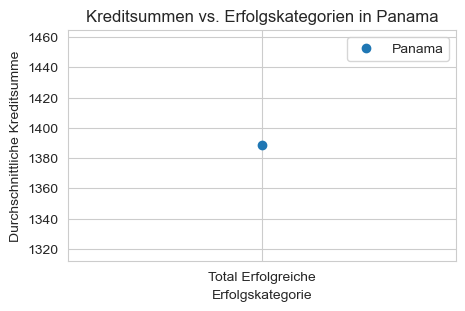

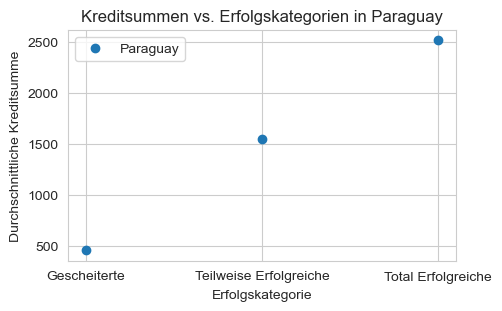

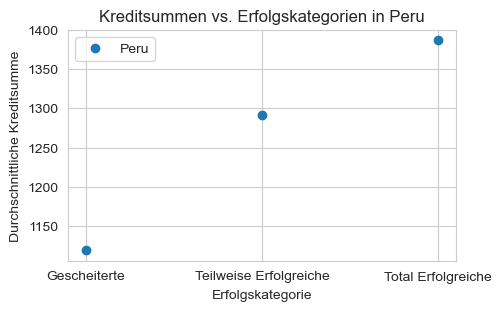

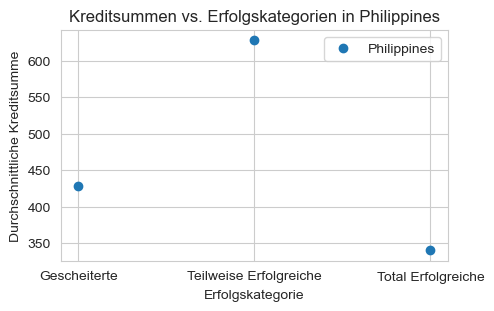

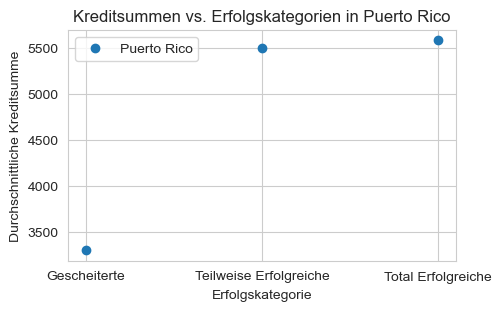

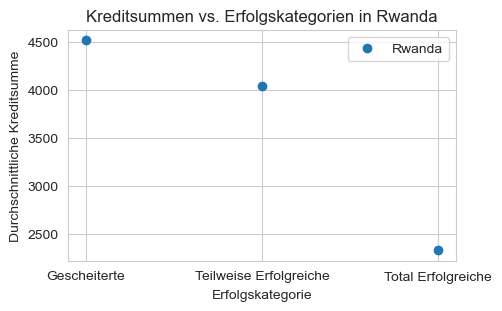

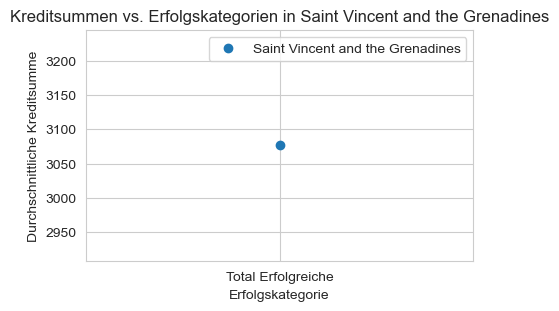

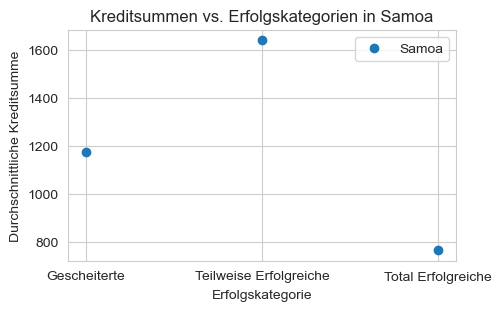

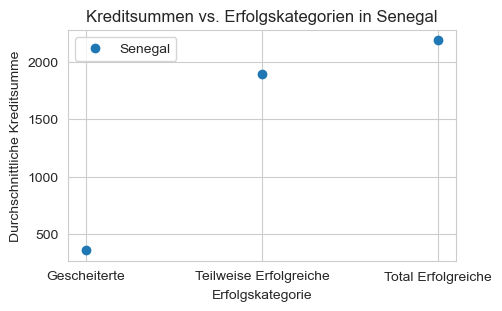

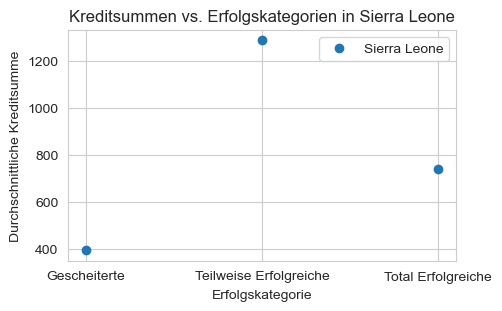

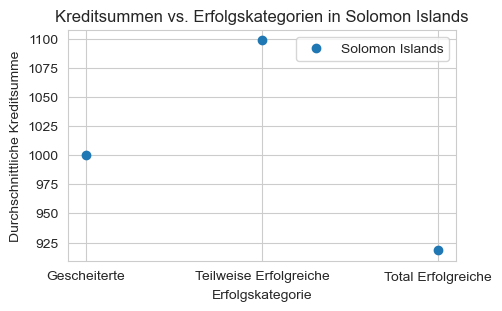

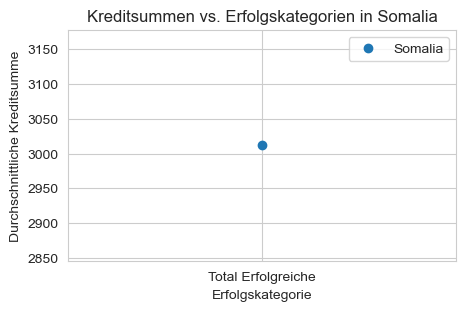

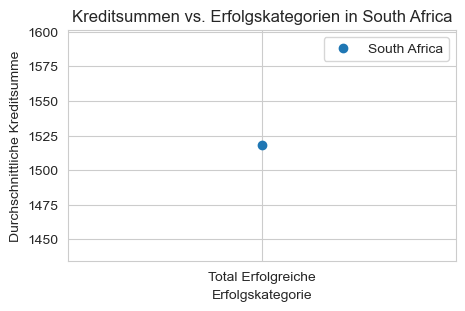

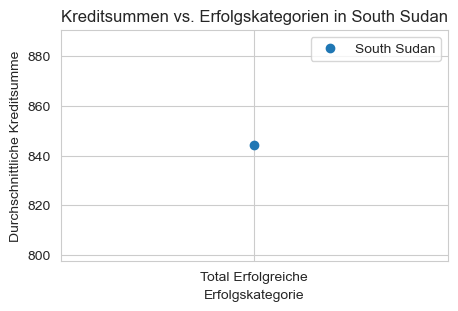

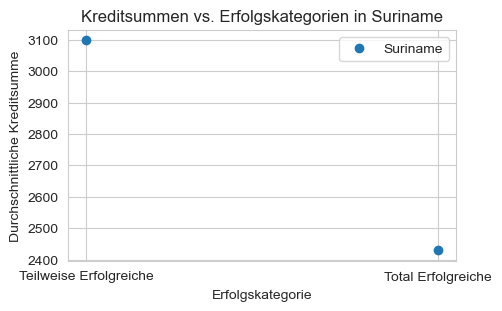

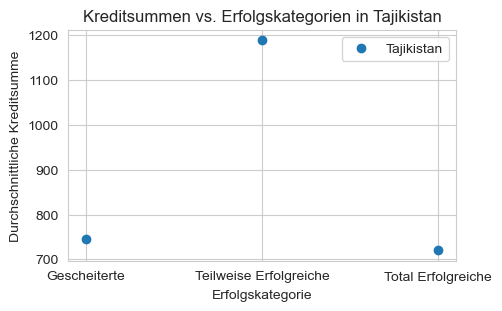

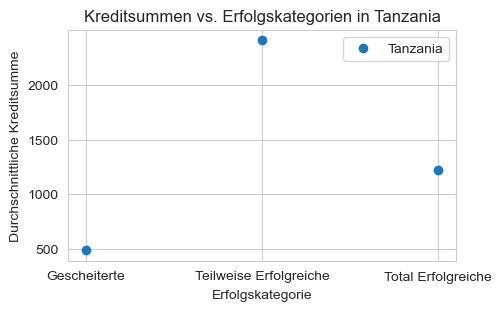

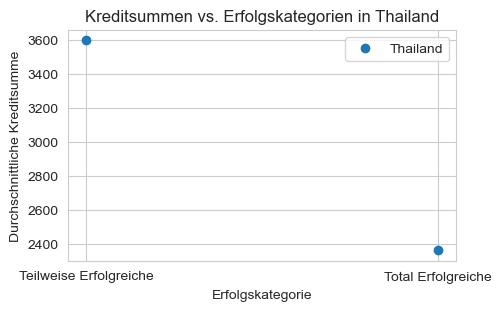

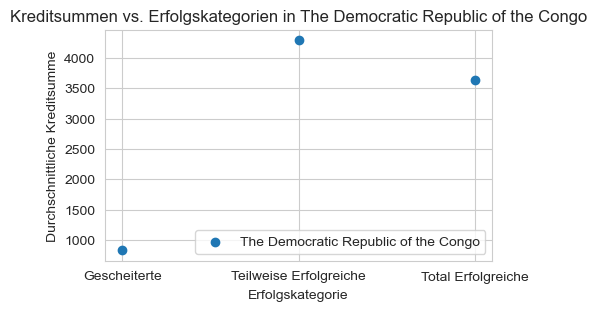

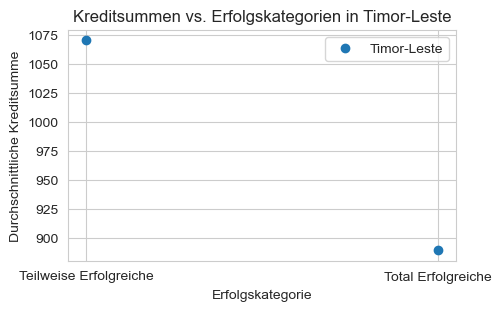

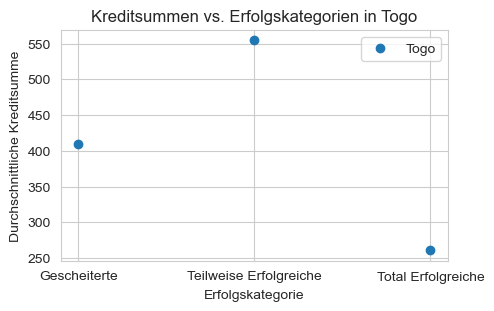

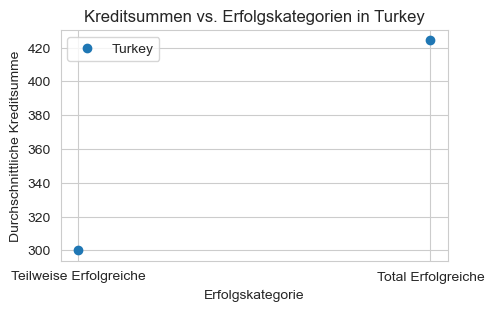

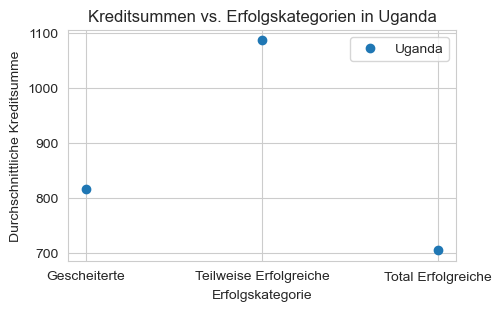

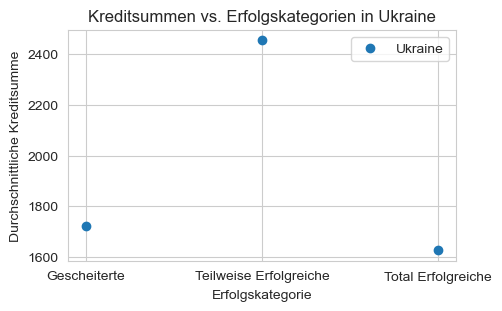

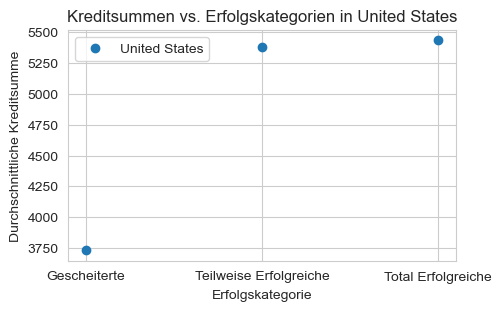

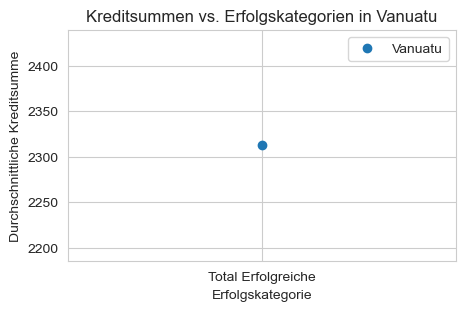

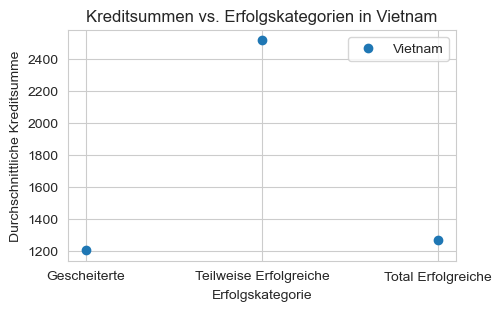

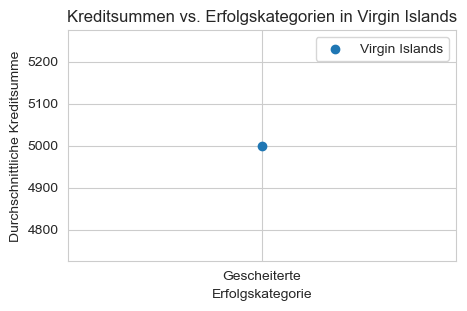

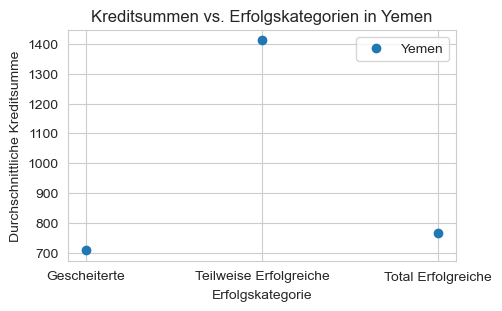

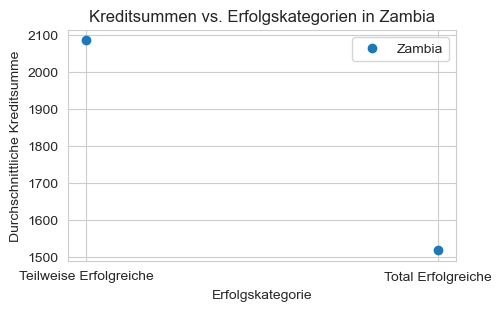

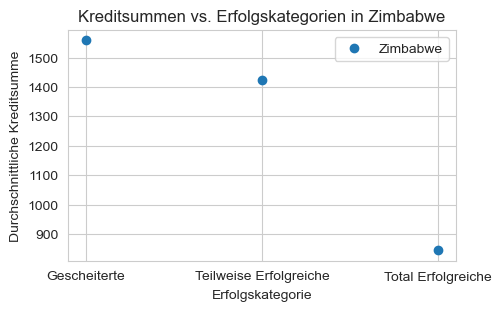

In [153]:
df_agg = df_gesamt.groupby(['country', 'Erfolgskategorie'])[
    'loan_amount'].mean().reset_index()

# Schleife durch die Länder (countries)
for country in (df_agg['country'].unique()):

    # Filtere die Daten für das aktuelle Land (country)
    data_country = df_agg[df_agg['country'] == country]

    # Erstelle einen Scatterplot für das aktuelle Land
    plt.figure(figsize=(5, 3))
    plt.scatter(data_country['Erfolgskategorie'],
                data_country['loan_amount'], label=country)
    plt.title(f'Kreditsummen vs. Erfolgskategorien in {country}')
    plt.xlabel('Erfolgskategorie')
    plt.ylabel('Durchschnittliche Kreditsumme')
    plt.legend()
    
#Plots anzeigen
plt.show()

**11.3 tbd: Aktivitäten/Sektoren mit durchschnittlich höchsten und niedrigsten Krediten, plus Länder**

**11.4 tbd: Use nach Ländern + Kreditsumme/Anzahl/Länder**

**11.5 tbd: Länder: Vergleich Armutsländer und Kreditländer**

**11.6 tbd: Währung: Welche ist noch stark vertreten außer USD? Nach Anzahl Kredite, Kreditsumme**

**11.7 tbd: Kreditlaufzeit (term_in_months) Vergleich Länder und Kredithöhe, Durchscnitt oder Summe**

**11.8 tbd: Menge der Lender bezogen auf Kreditsumme, Durchschnittskredit, Länder**

**11.9 tbd: Geschlechter mit durchschnittlich höchstem und niedrigstem Kredit und Länder**

**11.10 tbd: Anzahl borrower mit durchschnittlich höchstem und niedrigstem Kredit und Länder**

**11.11 tbd: Rückzahlung (repayment_interval) nach Kredithöhe, Interval, Land, Geschlecht(?)**

# Erstellung des Dashboards

Basierend auf den vorangegangenen Daten soll ein Dashboard erstellt werden.

Das Dashboard soll:

                - mindestens 1 HTML component enthalten
                - 1 Dash Core Component mit dem Daten ausgewählt werden können
                - 1 Grafik, die sich in Abhängigkeit von der Datenauswahl ändert
                

Verwende folgenden Code zum Ausführen der App:

my_app.run_server(mode='inline')

## Importe für Dashboard

In [154]:
# benötigte Bibliotheken importieren

# für die Daten

from dash.dependencies import Input, Output
import pandas as pd

# für die Visualisierung

import plotly.express as px

# für die Dash-App
import dash
from dash import dcc
from dash import html

app = dash.Dash(__name__)

## erster Schritt: Daten laden

In [155]:
df_gesamt[['country','funded_amount','loan_amount','Erfolg','Erfolgskategorie']].dtypes

country             object
funded_amount        int32
loan_amount          int32
Erfolg              object
Erfolgskategorie    object
dtype: object

## zweiter Schritt: Datenbereinigung: schon passiert

## dritter Schritt: App 1 erstellen

In [156]:
# 1. App erstellen - Name der App vergeben
my_kiva_app1 = dash.Dash(__name__)

# 2. Layout festlegen
my_kiva_app1.layout = html.Div(children=[
    # Überschrift
    html.H1(children="Erfolg der Projekte - Piechart Vergleich",
            style={
                "textAlign": "center",
                "font-family": "Verdana",  # Schriftart
                "font-size": "24px"  # Schriftgröße
            }
            ),

    # Dropdown für die Länderauswahl
    dcc.Dropdown(id="country_dropdown",
                 options=[{"label": country, "value": country}
                          for country in sorted(df_gesamt["country"].unique())],
                 value="",
                 style={"width": 230,
                        "font-family": "Verdana",
                        "font-size": "16px"}
                 ),

    # Radio-Buttons für die Metrikenauswahl
    dcc.RadioItems(id="metric_radio",
                   options=[
                       {"label": "Kreditsumme", "value": "loan_amount"},
                       {"label": "Kreditanzahl", "value": "loan_count"},
                       {"label": "Durchschnittlicher Kredit",
                           "value": "average_loan"}
                   ],
                   value="loan_amount",  # Standardauswahl
                   labelStyle={"display": "block",
                               "font-family": "Verdana", "font-size": "16px"}
                   ),


    # Piechart
    dcc.Graph(id="pie_chart", figure={}),

])

# 3. Callbacks erstellen


@my_kiva_app1.callback(
    Output("pie_chart", "figure"),
    Input("country_dropdown", "value"),
    Input("metric_radio", "value")
)
def update_pie_chart(selected_country, selected_metric):
    # Daten filtern
    df_filtered = df_gesamt[df_gesamt["country"] == selected_country]

    # Je nach ausgewählter Metrik aggregieren
    if selected_metric == "loan_amount":
        chart_data = df_filtered.groupby("Erfolgskategorie")[
            "loan_amount"].sum().reset_index()
    elif selected_metric == "loan_count":
        # Für "loan_count" verwenden wir die Anzahl der Zeilen pro Erfolgskategorie
        chart_data = df_filtered.groupby(
            "Erfolgskategorie").size().reset_index(name="loan_count")
    elif selected_metric == "average_loan":
        # Für "average_loan" berechnen wir den Durchschnitt pro Erfolgskategorie
        chart_data = df_filtered.groupby("Erfolgskategorie")[
            "loan_amount"].mean().reset_index(name="average_loan")

    # Piechart erstellen
    pie_chart = px.pie(
        chart_data,
        values=selected_metric,
        names="Erfolgskategorie"
    )

    # Textlabels mit absoluten Zahlen hinzufügen
    pie_chart.update_traces(textposition='inside',
                            textinfo='percent+label+value')

    return pie_chart


# 4. App starten
if __name__ == '__main__':
    my_kiva_app1.run_server(mode='inline')

## vierter Schritt: App 2 erstellen

In [157]:
# 1. App erstellen - Name der App vergeben
my_kiva_app2 = dash.Dash(__name__)

# 2. Layout festlegen
my_kiva_app2.layout = html.Div(children=[
    # Überschrift
    html.H1(children="Erfolg der Projekte - Barplot Vergleich",
            style={
                "textAlign": "center",
                "font-family": "Verdana",  # Schriftart
                "font-size": "24px"  # Schriftgröße
            }
            ),

    # Dropdown für den ersten Plot
    dcc.Dropdown(id="graph_drop1",
                 options=df_gesamt.loc[:, "Erfolgskategorie"].unique(),
                 value="",
                 style={"width": 230,
                        "font-family": "Verdana",  # Schriftart 
                        "font-size": "16px"  # Schriftgröße
                        }
                 ),

    # Erster Graph
    dcc.Graph(id="graph1",
              figure={}
              ),

    # Dropdown für den zweiten Plot
    dcc.Dropdown(id="graph_drop2",
                 options=df_gesamt.loc[:, "Erfolgskategorie"].unique(),
                 value="",
                 style={"width": 230,
                        "font-family": "Verdana",  # Schriftart
                        "font-size": "16px"  # Schriftgröße
                        }
                 ),

    # Zweiter Graph
    dcc.Graph(id="graph2",
              figure={}
              ),
])

# 3. Callbacks erstellen


@my_kiva_app2.callback(
    Output("graph1", "figure"),
    Input("graph_drop1", "value")
)
def update_plot1(selected_Erfolgskategorie):
    # Daten selektieren
    df_select = df_gesamt.loc[df_gesamt["Erfolgskategorie"]
                              == selected_Erfolgskategorie]

    # Daten gruppieren und aggregieren
    grouped_data = df_select.groupby(
        "country")["loan_amount"].sum().reset_index()

    # Plot erstellen (Barplot)
    my_barplot1 = px.bar(data_frame=grouped_data,
                         x="country",
                         y="loan_amount",
                         labels={"country": "Land",
                                 "loan_amount": "Summe Kreditbetrag"}
                         )
    # Layout des Plots anpassen, einschließlich der Schriftart
    my_barplot1.update_layout(
        title="Summe Kreditbetrag je Land",
        font=dict
        (
            family="Verdana",  # Schriftart
            size=12  # Schriftgröße
        )
    )

    return my_barplot1


@my_kiva_app2.callback(
    Output("graph2", "figure"),
    Input("graph_drop2", "value")
)
def update_plot2(selected_Erfolgskategorie):
    # Daten selektieren
    df_select = df_gesamt.loc[df_gesamt["Erfolgskategorie"]
                              == selected_Erfolgskategorie]

    # Daten gruppieren und aggregieren
    grouped_data = df_select.groupby(
        "country")["funded_amount"].sum().reset_index()

    # Plot erstellen (Barplot)
    my_barplot2 = px.bar(data_frame=grouped_data,
                         x="country",
                         y="funded_amount",
                         labels={"country": "Land",
                                 "funded_amount": "Summe geförderter Betrag"}
                         )
    # Layout des Plots anpassen, einschließlich der Schriftart
    my_barplot2.update_layout(
        title="Summe geförderter Betrag je Land",
        font=dict
        (
            family="Verdana",  # Schriftart
            size=12  # Schriftgröße
        )
    )

    return my_barplot2


# 4. App starten
if __name__ == '__main__':
    my_kiva_app2.run_server(mode='inline')

[2023-10-06 09:25:54,685] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\alfa\anaconda3\lib\site-packages\dash\dash.py", line 1242, in dispatch
    cb = self.callback_map[output]
KeyError: 'pie_chart.figure'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\alfa\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\alfa\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\alfa\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\alfa\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\alfa\anaconda3\lib\site-pac